In [1]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import geopandas as gpd

In [109]:
import networkx as nx

In [275]:
map_df = gpd.read_file('LAD_APR_2019_UK_BUC.shp')
keep = ["E"]
map_df = map_df[map_df['LAD19CD'].str.contains('|'.join(keep))]

In [277]:
map_df['Centroid'] = map_df['geometry'].centroid

In [327]:
pops = pd.read_csv('Populations4.csv')

In [328]:
pops

Code               Name                 Geography1    All ages
0    K02000001     UNITED KINGDOM                    Country  66796807.0
1    K03000001      GREAT BRITAIN                    Country  64903140.0
2    K04000001  ENGLAND AND WALES                    Country  59439840.0
3    E92000001            ENGLAND                    Country  56286961.0
4    E12000001         NORTH EAST                     Region   2669941.0
..         ...                ...                        ...         ...
357  E07000189     South Somerset  Non-metropolitan District    168345.0
358        NaN     Aylesbury Vale                        NaN    199448.0
359        NaN            Wycombe                        NaN    140000.0
360        NaN        South Bucks                        NaN     70043.0
361        NaN           Chiltern                        NaN     95927.0

[362 rows x 4 columns]

In [119]:
cities = ['Birmingham', 'Manchester', 'Liverpool', 'Leeds', 'Sheffield', 'Bristol, City of', 'Leicester', 'Stoke-on-Trent', 'Coventry', 'Newcastle upon Tyne', 'Nottingham', 'Wirral', 'Bradford', 'Plymouth', 'Brighton and Hove', 'Exeter', 'Norwich', 'Southampton', 'Oxford', 'Gloucester' ]

In [6]:
allwaves = pd.read_csv('all_waves.csv')

In [118]:
allwaves.loc[allwaves['LTLA 1'] == 'Exeter']

LTLA 1                 LTLA 2  Maximum Correlation  Lag in Days  \
45046   Exeter            North Devon             0.454448         -2.0   
45047   Exeter   Folkestone and Hythe             0.555028         10.0   
45048   Exeter                Burnley             0.403442         -2.0   
45049   Exeter  Hinckley and Bosworth             0.478502          0.0   
45050   Exeter              Harrogate             0.496771         14.0   
...        ...                    ...                  ...          ...   
143413  Exeter             Colchester             0.810374          0.0   
143414  Exeter  Basingstoke and Deane             0.897306          0.0   
143415  Exeter        Tunbridge Wells             0.841943          0.0   
143416  Exeter             Rushcliffe             0.787708          0.0   
143417  Exeter             Hillingdon             0.771418          0.0   

        Urban/Rural  Distance > 150km?  Distance between centroids Wave  
45046   Urban-Rural              False                   47.681441  1st  
45047   Urban-Rural               True                  319.258195  1st  
45048   Urban-Rural               True                  351.225061  1st  
45049   Urban-Rural               True                  256.699649  1st  
45050   Urban-Rural               True                  394.242487  1st  
...             ...                ...                         ...  ...  
143413  Urban-Urban               True                  330.617533  3rd  
143414  Urban-Rural               True                  173.419982  3rd  
143415  Urban-Rural               True                  280.647737  3rd  
143416  Urban-Rural               True                  296.281005  3rd  
143417  Urban-Urban               True                  233.160928  3rd  

[270 rows x 8 columns]

In [704]:
cities1 = [(allwaves.loc[allwaves['LTLA 1'] == cities[i]]) for i in range(len(cities))]

In [705]:
cities_df1 = pd.concat(cities1)

In [706]:
cities2 = [cities_df1.loc[cities_df1['LTLA 2'] == cities[i]] for i in range(len(cities))]

In [707]:
cities_df2 = pd.concat(cities2)

In [708]:
cities_df2

LTLA 1      LTLA 2  Maximum Correlation  Lag in Days  \
45678          Manchester  Birmingham             0.811053         -6.0   
94819          Manchester  Birmingham             0.583018         91.0   
143960         Manchester  Birmingham             0.925475          0.0   
33505           Liverpool  Birmingham             0.859562          0.0   
82646           Liverpool  Birmingham             0.757496          0.0   
...                   ...         ...                  ...          ...   
83117   Brighton and Hove  Gloucester             0.887813          0.0   
132258  Brighton and Hove  Gloucester             0.880154          0.0   
34999              Oxford  Gloucester             0.599802          1.0   
84140              Oxford  Gloucester             0.895989          0.0   
133281             Oxford  Gloucester             0.889441          0.0   

        Urban/Rural  Distance > 150km?  Distance between centroids Wave  
45678   Urban-Urban              False                  109.916445  1st  
94819   Urban-Urban              False                  109.916445  2nd  
143960  Urban-Urban              False                  109.916445  3rd  
33505   Urban-Urban              False                  123.579075  1st  
82646   Urban-Urban              False                  123.579075  2nd  
...             ...                ...                         ...  ...  
83117   Urban-Urban               True                  184.419592  2nd  
132258  Urban-Urban               True                  184.419592  3rd  
34999   Urban-Rural              False                   69.733532  1st  
84140   Urban-Rural              False                   69.733532  2nd  
133281  Urban-Rural              False                   69.733532  3rd  

[570 rows x 8 columns]

In [21]:
cities_df2.nlargest(10,'Maximum Correlation')

LTLA 1      LTLA 2  Maximum Correlation  Lag in Days  Urban/Rural  \
123927   Coventry  Birmingham             0.985832          0.0  Urban-Urban   
138962      Leeds   Sheffield             0.985261          0.0  Urban-Rural   
138978      Leeds  Birmingham             0.983564          0.0  Urban-Urban   
142007  Leicester  Birmingham             0.980751          0.0  Urban-Urban   
123856   Coventry       Leeds             0.980207          0.0  Urban-Urban   
108185     Wirral   Liverpool             0.980157          0.0  Urban-Rural   
144588  Sheffield  Birmingham             0.978291          0.0  Urban-Rural   
123911   Coventry   Sheffield             0.977738          0.0  Urban-Rural   
141991  Leicester   Sheffield             0.974173          0.0  Urban-Rural   
74786    Coventry  Birmingham             0.974027          0.0  Urban-Urban   

        Distance > 150km?  Distance between centroids Wave  
123927              False                   25.406457  3rd  
138962              False                   46.917816  3rd  
138978               True                  150.726568  3rd  
142007              False                   53.194806  3rd  
123856               True                  156.666622  3rd  
108185              False                   11.212828  3rd  
144588              False                  104.161511  3rd  
123911              False                  109.865389  3rd  
141991              False                   89.811698  3rd  
74786               False                   25.406457  2nd

# 1st Wave (Positive Case Values)

In [709]:
cities1 = cities_df2.loc[cities_df2['Wave'] == '1st']

In [710]:
cities1

LTLA 1      LTLA 2  Maximum Correlation  Lag in Days  \
45678         Manchester  Birmingham             0.811053         -6.0   
33505          Liverpool  Birmingham             0.859562          0.0   
40696              Leeds  Birmingham             0.732307         -6.0   
46306          Sheffield  Birmingham             0.836543          0.0   
40825   Bristol, City of  Birmingham             0.776451         -6.0   
...                  ...         ...                  ...          ...   
9967              Wirral  Gloucester             0.660644         -3.0   
2667            Bradford  Gloucester             0.348565        -18.0   
21061           Plymouth  Gloucester             0.732957         -4.0   
33976  Brighton and Hove  Gloucester             0.664956          2.0   
34999             Oxford  Gloucester             0.599802          1.0   

       Urban/Rural  Distance > 150km?  Distance between centroids Wave  
45678  Urban-Urban              False                  109.916445  1st  
33505  Urban-Urban              False                  123.579075  1st  
40696  Urban-Urban               True                  150.726568  1st  
46306  Urban-Rural              False                  104.161511  1st  
40825  Urban-Urban              False                  124.150535  1st  
...            ...                ...                         ...  ...  
9967   Urban-Rural               True                  177.425975  1st  
2667   Urban-Rural               True                  223.585080  1st  
21061  Urban-Urban               True                  208.596059  1st  
33976  Urban-Urban               True                  184.419592  1st  
34999  Urban-Rural              False                   69.733532  1st  

[190 rows x 8 columns]

In [127]:
def lag_direction(df1, df2):
    

    for i in range(len(df1)):
    
        if int(df1['Lag in Days'].iloc[i]) < 0:
    
     
            df1['LTLA 1'].iloc[i] = df2['LTLA 2'].iloc[i]
            df1['LTLA 2'].iloc[i] = df2['LTLA 1'].iloc[i]
    
    return df1
        

In [128]:
cities1rep = cities1.drop(columns=['Urban/Rural'])

In [129]:
cities1_new = lag_direction(cities1, cities1rep)

/var/folders/5m/nyccnvvs4197vfzljd054r300000gn/T/ipykernel_1653/1245444803.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['LTLA 1'].iloc[i] = df2['LTLA 2'].iloc[i]
/var/folders/5m/nyccnvvs4197vfzljd054r300000gn/T/ipykernel_1653/1245444803.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['LTLA 2'].iloc[i] = df2['LTLA 1'].iloc[i]


In [130]:
cities1_new['Absolute Lag'] = abs(cities1_new['Lag in Days'])

/var/folders/5m/nyccnvvs4197vfzljd054r300000gn/T/ipykernel_1653/2253036273.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cities1_new['Absolute Lag'] = abs(cities1_new['Lag in Days'])


In [522]:
cities1_new.nlargest(2,'Maximum Correlation')

LTLA 1      LTLA 2  Maximum Correlation  Lag in Days
34  Newcastle upon Tyne   Liverpool             0.896466          1.0
8   Newcastle upon Tyne  Birmingham             0.860675          1.0

In [132]:
cities1_newdup = cities1_new.rename(columns={'LTLA 1':'LTLA 2', 'LTLA 2':'LTLA 1'})

In [133]:
cities1_heat = pd.concat([cities1_new, cities1_newdup])

In [134]:
heatmap1 = cities1_heat.pivot(index = 'LTLA 1', columns = 'LTLA 2', values = 'Maximum Correlation')

In [135]:
heatmap1 = heatmap1.fillna(1)

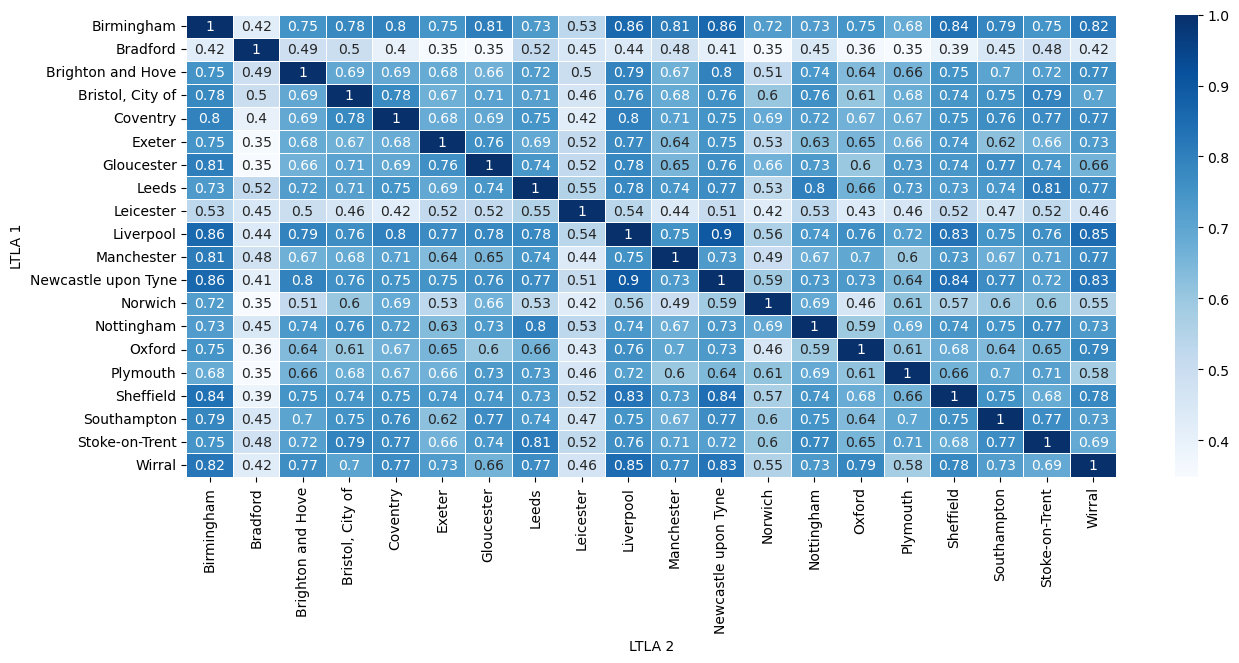

In [136]:
f, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(heatmap1, annot=True, cmap = 'Blues',linewidths=.5, ax=ax)
plt.show()

In [137]:
heatmap1['Mean Correlation'] = heatmap1.mean(axis=1)

In [549]:
heatmap1_pops = heatmap1.merge(pops, how='left', left_on = 'LTLA 1', right_on = 'Name')

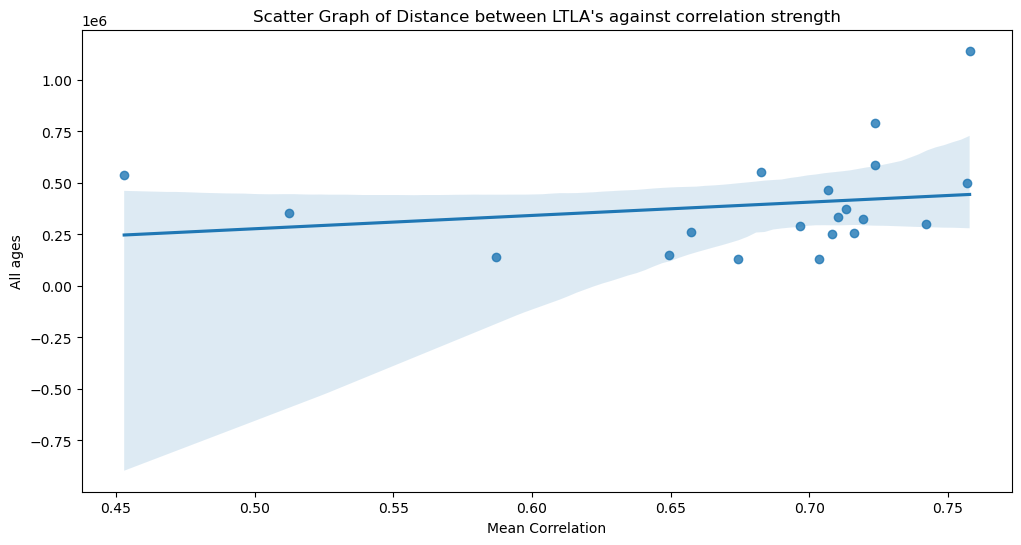

In [550]:
plt.figure(figsize=(12,6))

sns.regplot(data = heatmap1_pops, x = "Mean Correlation", y = "All ages")
plt.title("Scatter Graph of Distance between LTLA's against correlation strength")

plt.show()

In [551]:
from scipy.stats import pearsonr
data1 = heatmap1_pops['Mean Correlation']
data2 = heatmap1_pops['All ages']

corr, _ = pearsonr(data1, data2)
print('Correlation between city population and correlation strength: %.3f' % corr)

Correlation between city population and correlation strength: 0.204


In [138]:
cities1_newduplag = cities1_new.rename(columns={'LTLA 1':'LTLA 2', 'LTLA 2':'LTLA 1'})

In [139]:
cities1_newduplag['Absolute Lag'] = -(cities1_newduplag['Absolute Lag'])

In [140]:
cities1_heatlag = pd.concat([cities1_new, cities1_newduplag])

In [141]:
heatmap1_lag = cities1_heatlag.pivot(index = 'LTLA 1', columns = 'LTLA 2', values = 'Absolute Lag')

In [142]:
heatmap1_lag = heatmap1_lag.fillna(0)

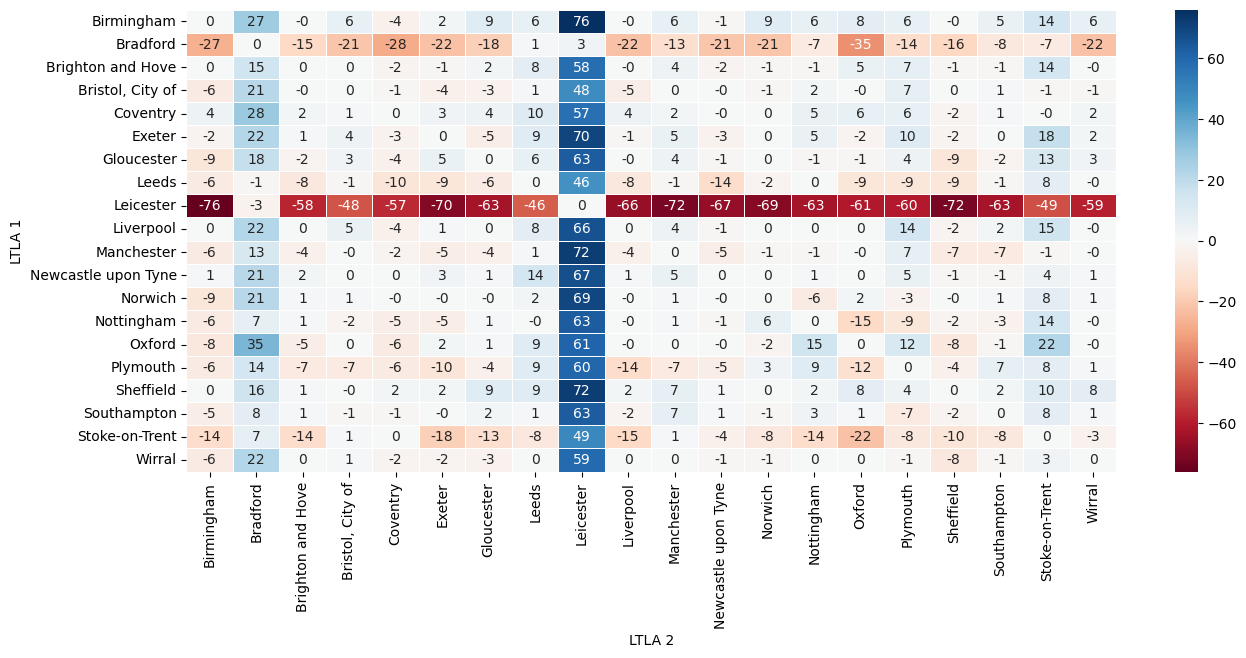

In [143]:
f, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(heatmap1_lag, annot=True, cmap = 'RdBu',linewidths=.5, ax=ax)
plt.show()

For heatmap above, horizontally represents when city is lead and vertical when city is lag. I.e Leicester strongly lags behind every city.

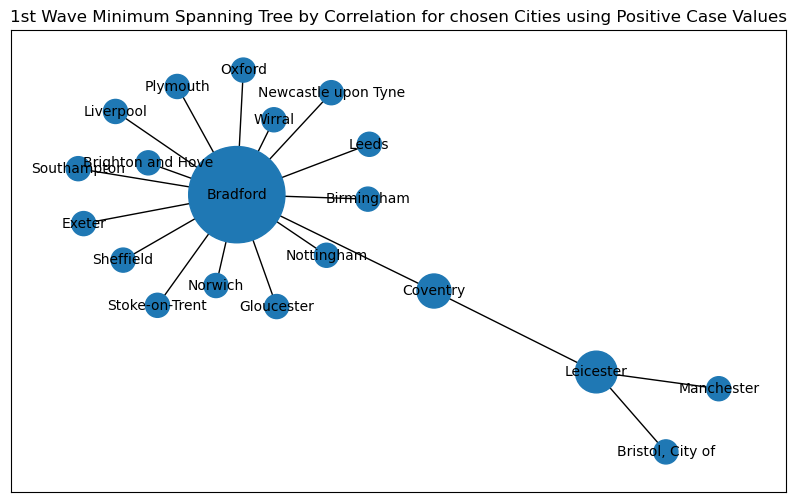

In [152]:
G = nx.from_pandas_edgelist(cities1_new,'LTLA 1','LTLA 2', edge_attr='Maximum Correlation')
T = nx.minimum_spanning_tree(G, weight = 'Maximum Correlation')
#distances = [i['Distance between centroids'] for i in dict(G.edges).values()]
labels = [i for i in dict(T.nodes).keys()]
labels = {i:i for i in dict(T.nodes).keys()}


d = T.degree()
degree_values = [v for k, v in d]
deg_vals = [x * 300 for x in degree_values]

fig, ax = plt.subplots(figsize=(10,6))
pos = nx.spring_layout(T)
nx.draw_networkx_nodes(T, pos, ax = ax, node_size = deg_vals, label=True)
nx.draw_networkx_edges(T, pos, ax=ax)
nx.draw_networkx_labels(T, pos, labels, font_size = 10, ax=ax)

plt.title('1st Wave Minimum Spanning Tree by Correlation for chosen Cities using Positive Case Values')
plt.show()

In [534]:
cities1_new.nlargest(5,'Maximum Correlation')

LTLA 1               LTLA 2  Maximum Correlation  Lag in Days
34  Newcastle upon Tyne            Liverpool             0.896466          1.0
8   Newcastle upon Tyne           Birmingham             0.860675          1.0
1             Liverpool           Birmingham             0.859562          0.0
35               Wirral            Liverpool             0.848561          0.0
54            Sheffield  Newcastle upon Tyne             0.844484         -1.0

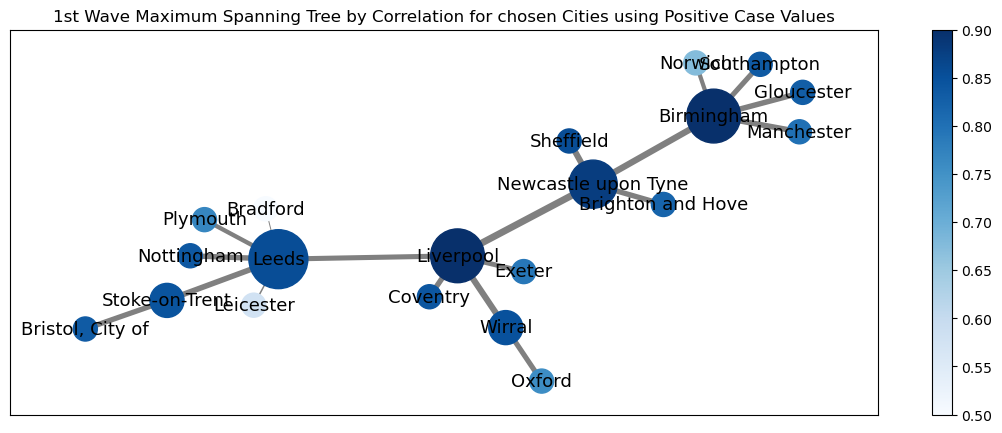

In [539]:
G = nx.from_pandas_edgelist(cities1_new,'LTLA 1','LTLA 2', edge_attr='Maximum Correlation')
T = nx.maximum_spanning_tree(G, weight = 'Maximum Correlation')
corrs = [i['Maximum Correlation'] for i in dict(T.edges).values()]
labels = [i for i in dict(T.nodes).keys()]
labels = {i:i for i in dict(T.nodes).keys()}


d = T.degree()
degree_values = [v for k, v in d]
deg_vals = [x * 300 for x in degree_values]

def normalize(values, bounds):
    return [bounds['desired']['lower'] + (x - bounds['actual']['lower']) * (bounds['desired']['upper'] - bounds['desired']['lower']) / (bounds['actual']['upper'] - bounds['actual']['lower']) for x in values]
corrs_new = normalize(corrs,{'actual':{'lower':0.5,'upper':0.9},'desired':{'lower':0.5,'upper':5}})
fig, ax = plt.subplots(1, figsize=(14,5))
vmin, vmax = 0.5, 0.9
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

#fig, ax = plt.subplots(1, figsize=(12,8))
pos = nx.spring_layout(T)
nx.draw_networkx_nodes(T, pos, ax = ax, node_size = deg_vals, node_color = test2['Mean Correlation'],cmap = 'Blues',label=True)
nx.draw_networkx_edges(T, pos, width = corrs_new, edge_color='grey', ax=ax)
nx.draw_networkx_labels(T, pos, labels, font_size = 13, ax=ax)

plt.title('1st Wave Maximum Spanning Tree by Correlation for chosen Cities using Positive Case Values')
plt.show()

In [527]:
test = pd.DataFrame(list(T.nodes))

In [530]:
test = test.rename(columns={test.columns[0]:'LTLA'})

In [531]:
test2 = test.merge(heatmap1, how='left', left_on='LTLA', right_on='LTLA 1')

In [532]:
test2

LTLA  Birmingham  Bradford  Brighton and Hove  \
0            Birmingham    1.000000  0.422035           0.748324   
1            Manchester    0.811053  0.477902           0.667811   
2             Liverpool    0.859562  0.439293           0.793611   
3                 Leeds    0.732307  0.516677           0.724338   
4             Sheffield    0.836543  0.388265           0.750401   
5      Bristol, City of    0.776451  0.497414           0.693647   
6             Leicester    0.529316  0.451068           0.497397   
7        Stoke-on-Trent    0.745582  0.481225           0.718608   
8              Coventry    0.796137  0.397797           0.689987   
9   Newcastle upon Tyne    0.860675  0.410060           0.795601   
10               Wirral    0.819553  0.424726           0.765281   
11             Bradford    0.422035  1.000000           0.488928   
12             Plymouth    0.682661  0.350453           0.657041   
13    Brighton and Hove    0.748324  0.488928           1.000000   
14               Exeter    0.746259  0.353811           0.682489   
15              Norwich    0.724567  0.350631           0.514457   
16          Southampton    0.785738  0.451358           0.703194   
17               Oxford    0.745822  0.363171           0.640361   
18           Gloucester    0.806549  0.348565           0.664956   
19           Nottingham    0.727319  0.446480           0.736619   

    Bristol, City of  Coventry    Exeter  Gloucester     Leeds  Leicester  \
0           0.776451  0.796137  0.746259    0.806549  0.732307   0.529316   
1           0.684356  0.708707  0.638492    0.652446  0.742354   0.438635   
2           0.763435  0.800789  0.768886    0.782829  0.780067   0.535058   
3           0.713563  0.745905  0.689820    0.742369  1.000000   0.552999   
4           0.743033  0.749924  0.735657    0.742933  0.729321   0.519146   
5           1.000000  0.775651  0.667330    0.708239  0.713563   0.462236   
6           0.462236  0.421762  0.517975    0.518520  0.552999   1.000000   
7           0.792927  0.770248  0.662161    0.735952  0.813748   0.523070   
8           0.775651  1.000000  0.680880    0.693082  0.745905   0.421762   
9           0.757403  0.748851  0.748876    0.761674  0.766507   0.509501   
10          0.703105  0.769132  0.730234    0.660644  0.767288   0.463807   
11          0.497414  0.397797  0.353811    0.348565  0.516677   0.451068   
12          0.676621  0.674588  0.664284    0.732957  0.734659   0.455819   
13          0.693647  0.689987  0.682489    0.664956  0.724338   0.497397   
14          0.667330  0.680880  1.000000    0.759630  0.689820   0.517975   
15          0.601802  0.686013  0.531219    0.661935  0.528194   0.422876   
16          0.752947  0.763898  0.623288    0.768408  0.735584   0.467624   
17          0.605287  0.666477  0.653174    0.599802  0.659315   0.433533   
18          0.708239  0.693082  0.759630    1.000000  0.742369   0.518520   
19          0.759266  0.724304  0.634752    0.730416  0.800819   0.529558   

    ...  Newcastle upon Tyne   Norwich  Nottingham    Oxford  Plymouth  \
0   ...             0.860675  0.724567    0.727319  0.745822  0.682661   
1   ...             0.732706  0.494743    0.673432  0.696840  0.600086   
2   ...             0.896466  0.562079    0.737613  0.762690  0.715612   
3   ...             0.766507  0.528194    0.800819  0.659315  0.734659   
4   ...             0.844484  0.565506    0.744840  0.681450  0.659799   
5   ...             0.757403  0.601802    0.759266  0.605287  0.676621   
6   ...             0.509501  0.422876    0.529558  0.433533  0.455819   
7   ...             0.719927  0.604340    0.774881  0.654741  0.713576   
8   ...             0.748851  0.686013    0.724304  0.666477  0.674588   
9   ...             1.000000  0.585715    0.734960  0.733435  0.642521   
10  ...             0.827380  0.553768    0.734643  0.785754  0.577941   
11  ...             0.410060  0.350631    0.446480  0.363171  0.350453   
12  ...   

In [215]:
cities1_filtered = cities1_new.loc[cities1_new['Maximum Correlation'] > 0.75]
cities1_filtered2 = cities1_new.loc[cities1_new['Maximum Correlation'] > 0.80]

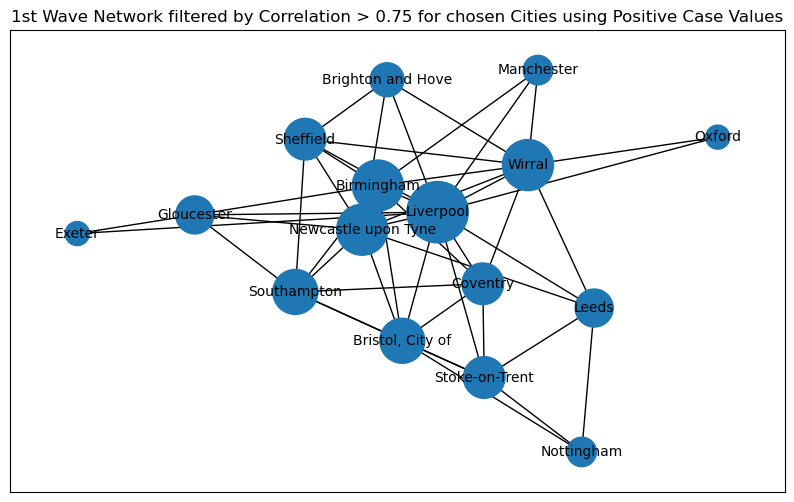

In [525]:
G = nx.from_pandas_edgelist(cities1_filtered,'LTLA 1','LTLA 2', edge_attr='Maximum Correlation')
#T = nx.minimum_spanning_tree(G, weight = 'Maximum Correlation')
#distances = [i['Distance between centroids'] for i in dict(G.edges).values()]
labels = [i for i in dict(G.nodes).keys()]
labels = {i:i for i in dict(G.nodes).keys()}


d = G.degree()
degree_values = [v for k, v in d]
deg_vals = [x * 150 for x in degree_values]

fig, ax = plt.subplots(figsize=(10,6))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, ax = ax, node_size = deg_vals, label=True)
nx.draw_networkx_edges(G, pos, ax=ax)
nx.draw_networkx_labels(G, pos, labels, font_size = 10, ax=ax)

plt.title('1st Wave Network filtered by Correlation > 0.75 for chosen Cities using Positive Case Values')
plt.show()

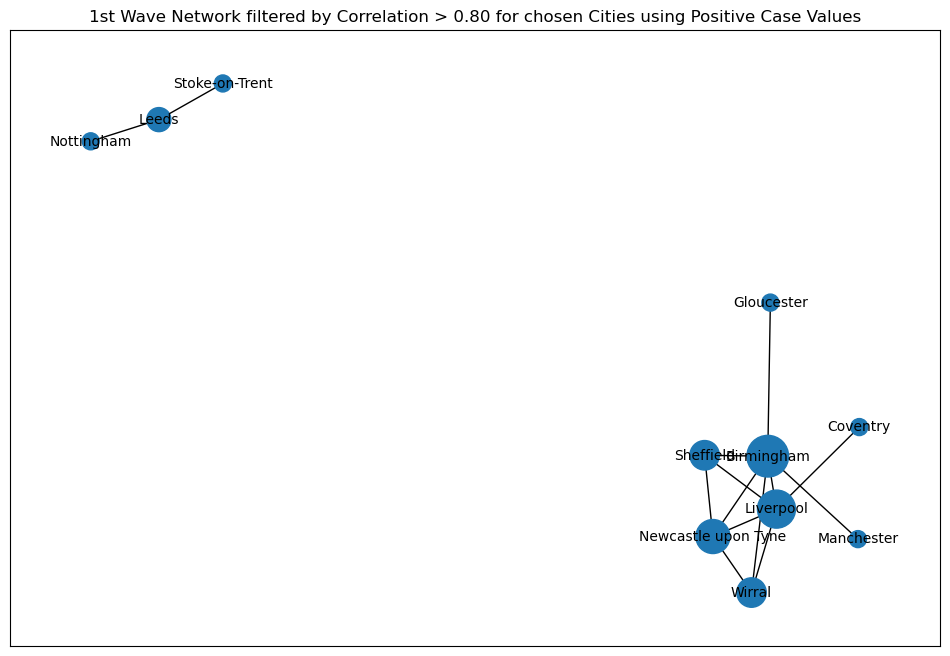

In [526]:
G = nx.from_pandas_edgelist(cities1_filtered2,'LTLA 1','LTLA 2', edge_attr='Maximum Correlation')
#T = nx.minimum_spanning_tree(G, weight = 'Maximum Correlation')
#distances = [i['Distance between centroids'] for i in dict(G.edges).values()]
labels = [i for i in dict(G.nodes).keys()]
labels = {i:i for i in dict(G.nodes).keys()}


d = G.degree()
degree_values = [v for k, v in d]
deg_vals = [x * 150 for x in degree_values]

fig, ax = plt.subplots(figsize=(12,8))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, ax = ax, node_size = deg_vals, label=True)
nx.draw_networkx_edges(G, pos, ax=ax)
nx.draw_networkx_labels(G, pos, labels, font_size = 10, ax=ax)

plt.title('1st Wave Network filtered by Correlation > 0.80 for chosen Cities using Positive Case Values')
plt.show()

In [154]:
cities1_new.describe()

Maximum Correlation  Lag in Days  Distance between centroids  \
count           190.000000   190.000000                  190.000000   
mean              0.662902    -1.868421                  196.197389   
std               0.125436    20.863085                  107.797932   
min               0.348565   -76.000000                   11.212828   
25%               0.595025    -7.000000                  105.440816   
50%               0.696434    -1.000000                  184.596006   
75%               0.750281     2.000000                  272.417952   
max               0.896466    67.000000                  539.659494   

       Absolute Lag  
count    190.000000  
mean      10.815789  
std       17.921426  
min        0.000000  
25%        1.000000  
50%        4.000000  
75%        9.000000  
max       76.000000

In [168]:
cities1_filtered2 = cities1_new.loc[cities1_new['Absolute Lag'] > 0]

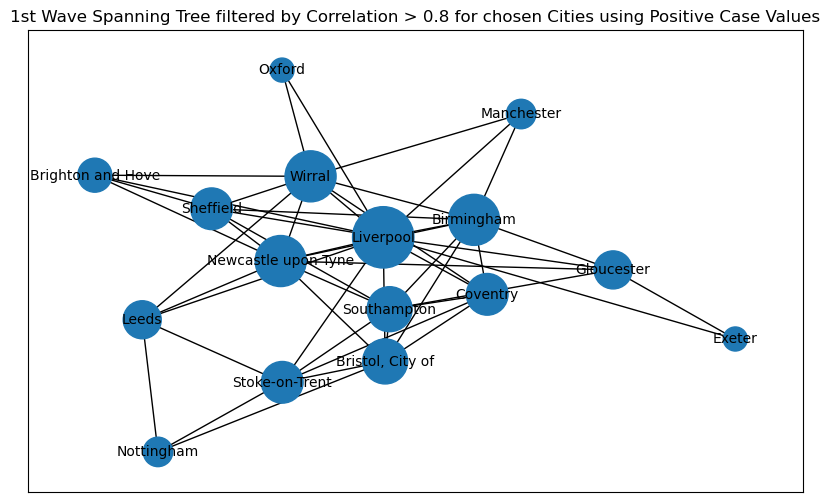

In [169]:
G = nx.from_pandas_edgelist(cities1_filtered,'LTLA 1','LTLA 2', edge_attr='Maximum Correlation')
#T = nx.minimum_spanning_tree(G, weight = 'Maximum Correlation')
#distances = [i['Distance between centroids'] for i in dict(G.edges).values()]
labels = [i for i in dict(G.nodes).keys()]
labels = {i:i for i in dict(G.nodes).keys()}


d = G.degree()
degree_values = [v for k, v in d]
deg_vals = [x * 150 for x in degree_values]

fig, ax = plt.subplots(figsize=(12,8))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, ax = ax, node_size = deg_vals, label=True)
nx.draw_networkx_edges(G, pos, ax=ax)
nx.draw_networkx_labels(G, pos, labels, font_size = 10, ax=ax)

plt.title('1st Wave Network filtered by Correlation > 0.8 and non-zero lag for chosen Cities using Positive Case Values')
plt.show()

# 2nd Wave (Positive Cases)


In [715]:
cities2 = cities_df2.loc[cities_df2['Wave'] == '2nd']

In [171]:
cities2rep = cities2.drop(columns=['Urban/Rural'])

In [172]:
cities2_new = lag_direction(cities2, cities2rep)

/var/folders/5m/nyccnvvs4197vfzljd054r300000gn/T/ipykernel_1653/1245444803.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['LTLA 1'].iloc[i] = df2['LTLA 2'].iloc[i]
/var/folders/5m/nyccnvvs4197vfzljd054r300000gn/T/ipykernel_1653/1245444803.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['LTLA 2'].iloc[i] = df2['LTLA 1'].iloc[i]


In [173]:
cities2_new['Absolute Lag'] = abs(cities2_new['Lag in Days'])

/var/folders/5m/nyccnvvs4197vfzljd054r300000gn/T/ipykernel_1653/1560745258.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cities2_new['Absolute Lag'] = abs(cities2_new['Lag in Days'])


In [174]:
cities2_newdup = cities2_new.rename(columns={'LTLA 1':'LTLA 2', 'LTLA 2':'LTLA 1'})

In [175]:
cities2_heat = pd.concat([cities2_new, cities2_newdup])

In [176]:
heatmap2 = cities2_heat.pivot(index = 'LTLA 1', columns = 'LTLA 2', values = 'Maximum Correlation')
heatmap2 = heatmap2.fillna(1)

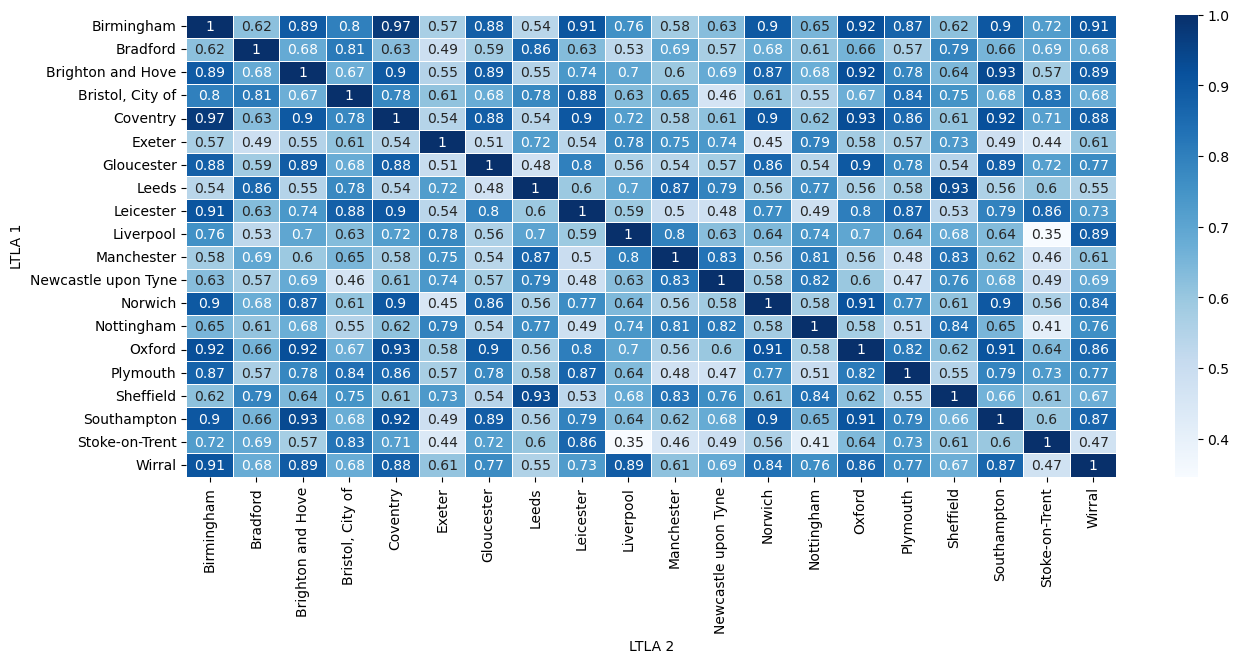

In [177]:
f, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(heatmap2, annot=True, cmap = 'Blues',linewidths=.5, ax=ax)
plt.show()

In [178]:
heatmap2['Mean Correlation'] = heatmap2.mean(axis=1)

In [625]:
cities2_new.nlargest(5,'Maximum Correlation')

LTLA 1       LTLA 2  Maximum Correlation  Lag in Days
7             Coventry   Birmingham             0.974027          0.0
49               Leeds    Sheffield             0.934484          0.0
167  Brighton and Hove  Southampton             0.934154          0.0
173           Coventry       Oxford             0.927459          0.0
16              Oxford   Birmingham             0.922835          0.0

In [179]:
cities2_newduplag = cities2_new.rename(columns={'LTLA 1':'LTLA 2', 'LTLA 2':'LTLA 1'})
cities2_newduplag['Absolute Lag'] = -(cities2_newduplag['Absolute Lag'])
cities2_heatlag = pd.concat([cities2_new, cities2_newduplag])

In [180]:
heatmap2_lag = cities2_heatlag.pivot(index = 'LTLA 1', columns = 'LTLA 2', values = 'Absolute Lag')
heatmap2_lag = heatmap2_lag.fillna(0)

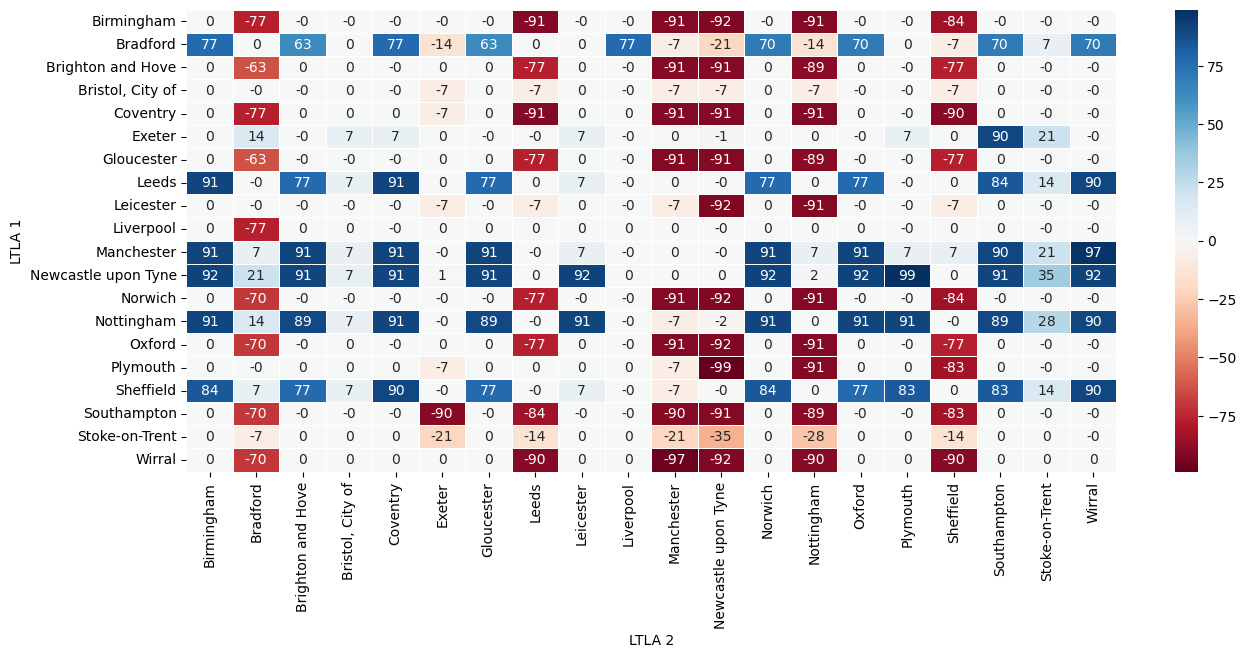

In [181]:
f, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(heatmap2_lag, annot=True, cmap = 'RdBu',linewidths=.5, ax=ax)
plt.show()

In [446]:
cities2

LTLA 1      LTLA 2  Maximum Correlation  Lag in Days  \
94819         Manchester  Birmingham             0.583018         91.0   
82646          Liverpool  Birmingham             0.757496          0.0   
89837              Leeds  Birmingham             0.537249         91.0   
95447          Sheffield  Birmingham             0.617595         84.0   
89966   Bristol, City of  Birmingham             0.800677          0.0   
...                  ...         ...                  ...          ...   
59108             Wirral  Gloucester             0.769987          0.0   
51808           Bradford  Gloucester             0.585785         63.0   
70202           Plymouth  Gloucester             0.777846          0.0   
83117  Brighton and Hove  Gloucester             0.887813          0.0   
84140             Oxford  Gloucester             0.895989          0.0   

       Urban/Rural  Distance > 150km?  Distance between centroids Wave  \
94819  Urban-Urban              False                  109.916445  2nd   
82646  Urban-Urban              False                  123.579075  2nd   
89837  Urban-Urban               True                  150.726568  2nd   
95447  Urban-Rural              False                  104.161511  2nd   
89966  Urban-Urban              False                  124.150535  2nd   
...            ...                ...                         ...  ...   
59108  Urban-Rural               True                  177.425975  2nd   
51808  Urban-Rural               True                  223.585080  2nd   
70202  Urban-Urban               True                  208.596059  2nd   
83117  Urban-Urban               True                  184.419592  2nd   
84140  Urban-Rural              False                   69.733532  2nd   

       Absolute Lag  
94819          91.0  
82646           0.0  
89837          91.0  
95447          84.0  
89966           0.0  
...             ...  
59108           0.0  
51808          63.0  
70202           0.0  
83117           0.0  
84140           0.0  

[190 rows x 9 columns]

In [447]:
cities3

LTLA 1      LTLA 2  Maximum Correlation  Lag in Days  \
143960         Manchester  Birmingham             0.925475          0.0   
131787          Liverpool  Birmingham             0.936041          0.0   
138978              Leeds  Birmingham             0.983564          0.0   
144588          Sheffield  Birmingham             0.978291          0.0   
139107   Bristol, City of  Birmingham             0.872751          0.0   
...                   ...         ...                  ...          ...   
108249             Wirral  Gloucester             0.787018          0.0   
100949           Bradford  Gloucester             0.788517          0.0   
119343           Plymouth  Gloucester             0.908549          0.0   
132258  Brighton and Hove  Gloucester             0.880154          0.0   
133281             Oxford  Gloucester             0.889441          0.0   

        Urban/Rural  Distance > 150km?  Distance between centroids Wave  \
143960  Urban-Urban              False                  109.916445  3rd   
131787  Urban-Urban              False                  123.579075  3rd   
138978  Urban-Urban               True                  150.726568  3rd   
144588  Urban-Rural              False                  104.161511  3rd   
139107  Urban-Urban              False                  124.150535  3rd   
...             ...                ...                         ...  ...   
108249  Urban-Rural               True                  177.425975  3rd   
100949  Urban-Rural               True                  223.585080  3rd   
119343  Urban-Urban               True                  208.596059  3rd   
132258  Urban-Urban               True                  184.419592  3rd   
133281  Urban-Rural              False                   69.733532  3rd   

        Absolute Lag  
143960           0.0  
131787           0.0  
138978           0.0  
144588           0.0  
139107           0.0  
...              ...  
108249           0.0  
100949           0.0  
119343           0.0  
132258           0.0  
133281           0.0  

[190 rows x 9 columns]

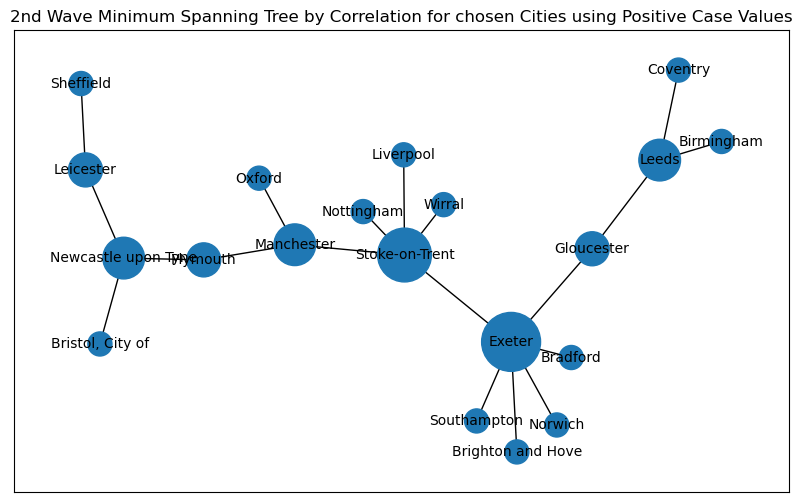

In [182]:
G = nx.from_pandas_edgelist(cities2_new,'LTLA 1','LTLA 2', edge_attr='Maximum Correlation')
T = nx.minimum_spanning_tree(G, weight = 'Maximum Correlation')
#distances = [i['Distance between centroids'] for i in dict(G.edges).values()]
labels = [i for i in dict(T.nodes).keys()]
labels = {i:i for i in dict(T.nodes).keys()}


d = T.degree()
degree_values = [v for k, v in d]
deg_vals = [x * 300 for x in degree_values]

fig, ax = plt.subplots(figsize=(10,6))
pos = nx.spring_layout(T)
nx.draw_networkx_nodes(T, pos, ax = ax, node_size = deg_vals, label=True)
nx.draw_networkx_edges(T, pos, ax=ax)
nx.draw_networkx_labels(T, pos, labels, font_size = 10, ax=ax)

plt.title('2nd Wave Minimum Spanning Tree by Correlation for chosen Cities using Positive Case Values')
plt.show()

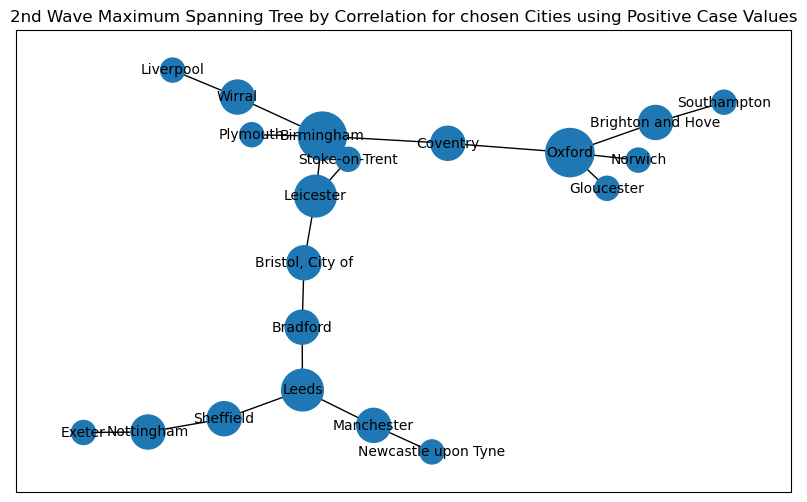

In [183]:
G = nx.from_pandas_edgelist(cities2_new,'LTLA 1','LTLA 2', edge_attr='Maximum Correlation')
T = nx.maximum_spanning_tree(G, weight = 'Maximum Correlation')
#distances = [i['Distance between centroids'] for i in dict(G.edges).values()]
labels = [i for i in dict(T.nodes).keys()]
labels = {i:i for i in dict(T.nodes).keys()}


d = T.degree()
degree_values = [v for k, v in d]
deg_vals = [x * 300 for x in degree_values]

fig, ax = plt.subplots(figsize=(10,6))
pos = nx.spring_layout(T)
nx.draw_networkx_nodes(T, pos, ax = ax, node_size = deg_vals, label=True)
nx.draw_networkx_edges(T, pos, ax=ax)
nx.draw_networkx_labels(T, pos, labels, font_size = 10, ax=ax)

plt.title('2nd Wave Maximum Spanning Tree by Correlation for chosen Cities using Positive Case Values')
plt.show()

In [206]:
cities2_filtered = cities2_new.loc[cities2_new['Maximum Correlation'] > 0.65]
cities2_filtered2 = cities2_new.loc[cities2_new['Maximum Correlation'] > 0.75]
cities2_filtered3 = cities2_new.loc[cities2_new['Maximum Correlation'] > 0.82]



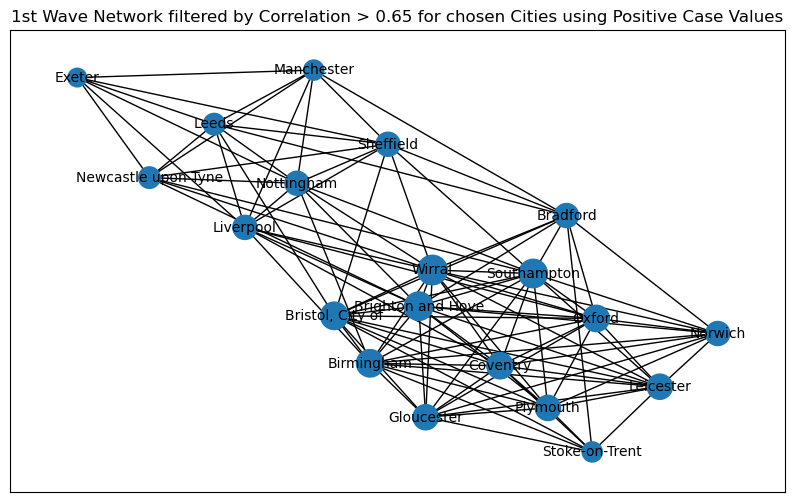

In [209]:
G = nx.from_pandas_edgelist(cities2_filtered,'LTLA 1','LTLA 2', edge_attr='Maximum Correlation')
#T = nx.minimum_spanning_tree(G, weight = 'Maximum Correlation')
#distances = [i['Distance between centroids'] for i in dict(G.edges).values()]
labels = [i for i in dict(G.nodes).keys()]
labels = {i:i for i in dict(G.nodes).keys()}


d = G.degree()
degree_values = [v for k, v in d]
deg_vals = [x * 30 for x in degree_values]

fig, ax = plt.subplots(figsize=(10,6))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, ax = ax, node_size = deg_vals, label=True)
nx.draw_networkx_edges(G, pos, ax=ax)
nx.draw_networkx_labels(G, pos, labels, font_size = 10, ax=ax)

plt.title('2nd Wave Network filtered by Correlation > 0.65 for chosen Cities using Positive Case Values')
plt.show()

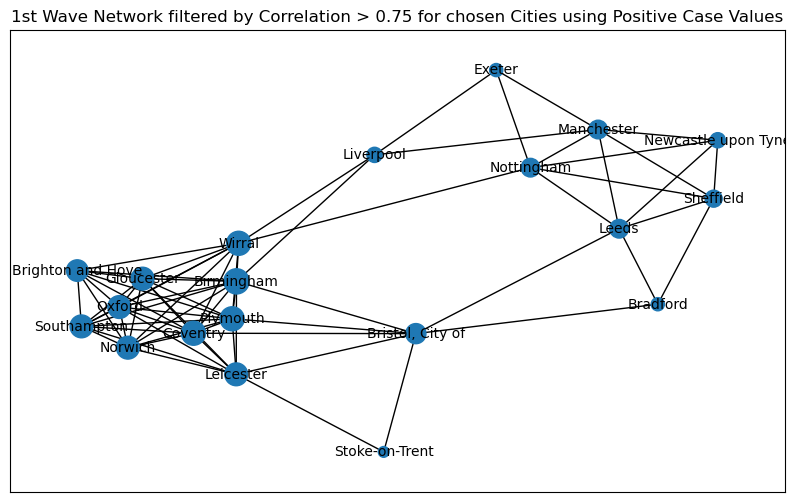

In [199]:
G = nx.from_pandas_edgelist(cities2_filtered2,'LTLA 1','LTLA 2', edge_attr='Maximum Correlation')
#T = nx.minimum_spanning_tree(G, weight = 'Maximum Correlation')
#distances = [i['Distance between centroids'] for i in dict(G.edges).values()]
labels = [i for i in dict(G.nodes).keys()]
labels = {i:i for i in dict(G.nodes).keys()}


d = G.degree()
degree_values = [v for k, v in d]
deg_vals = [x * 30 for x in degree_values]

fig, ax = plt.subplots(figsize=(10,6))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, ax = ax, node_size = deg_vals, label=True)
nx.draw_networkx_edges(G, pos, ax=ax)
nx.draw_networkx_labels(G, pos, labels, font_size = 10, ax=ax)

plt.title('2nd Wave Network filtered by Correlation > 0.75 for chosen Cities using Positive Case Values')
plt.show()

In [619]:
cities2_filtered3.nlargest(2,'Maximum Correlation')

LTLA 1      LTLA 2  Maximum Correlation  Lag in Days  Urban/Rural  \
74786  Coventry  Birmingham             0.974027          0.0  Urban-Urban   
89821     Leeds   Sheffield             0.934484          0.0  Urban-Rural   

       Distance > 150km?  Distance between centroids Wave  Absolute Lag  
74786              False                   25.406457  2nd           0.0  
89821              False                   46.917816  2nd           0.0

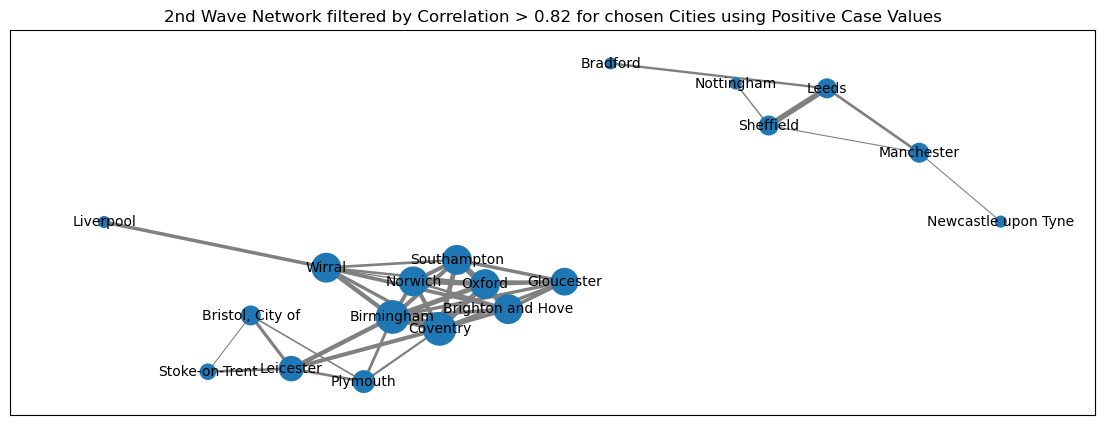

In [621]:
G = nx.from_pandas_edgelist(cities2_filtered3,'LTLA 1','LTLA 2', edge_attr='Maximum Correlation')
#T = nx.minimum_spanning_tree(G, weight = 'Maximum Correlation')
corrs = [i['Maximum Correlation'] for i in dict(G.edges).values()]
labels = [i for i in dict(G.nodes).keys()]
labels = {i:i for i in dict(G.nodes).keys()}

def normalize(values, bounds):
    return [bounds['desired']['lower'] + (x - bounds['actual']['lower']) * (bounds['desired']['upper'] - bounds['desired']['lower']) / (bounds['actual']['upper'] - bounds['actual']['lower']) for x in values]
corrs_new = normalize(corrs,{'actual':{'lower':0.82,'upper':0.97},'desired':{'lower':0.5,'upper':5}})

d = G.degree()
degree_values = [v for k, v in d]
deg_vals = [x * 60 for x in degree_values]

fig, ax = plt.subplots(figsize=(14,5))
pos = nx.spring_layout(G, k=0.75)
nx.draw_networkx_nodes(G, pos, ax = ax, node_size = deg_vals, label=True)
nx.draw_networkx_edges(G, pos, edge_color = 'grey',width = corrs_new, ax=ax)
nx.draw_networkx_labels(G, pos, labels, font_size = 10, ax=ax)

plt.title('2nd Wave Network filtered by Correlation > 0.82 for chosen Cities using Positive Case Values')
plt.show()

# 3rd Wave (Positive Case Values)

In [716]:
cities3 = cities_df2.loc[cities_df2['Wave'] == '3rd']

In [220]:
cities3rep = cities3.drop(columns=['Urban/Rural'])

In [221]:
cities3_new = lag_direction(cities3, cities3rep)

/var/folders/5m/nyccnvvs4197vfzljd054r300000gn/T/ipykernel_1653/1245444803.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['LTLA 1'].iloc[i] = df2['LTLA 2'].iloc[i]
/var/folders/5m/nyccnvvs4197vfzljd054r300000gn/T/ipykernel_1653/1245444803.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['LTLA 2'].iloc[i] = df2['LTLA 1'].iloc[i]


In [222]:
cities3_new['Absolute Lag'] = abs(cities3_new['Lag in Days'])

/var/folders/5m/nyccnvvs4197vfzljd054r300000gn/T/ipykernel_1653/451819398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cities3_new['Absolute Lag'] = abs(cities3_new['Lag in Days'])


In [223]:
cities3_newdup = cities3_new.rename(columns={'LTLA 1':'LTLA 2', 'LTLA 2':'LTLA 1'})

In [224]:
cities3_heat = pd.concat([cities3_new, cities3_newdup])

In [225]:
heatmap3 = cities3_heat.pivot(index = 'LTLA 1', columns = 'LTLA 2', values = 'Maximum Correlation')
heatmap3 = heatmap3.fillna(1)

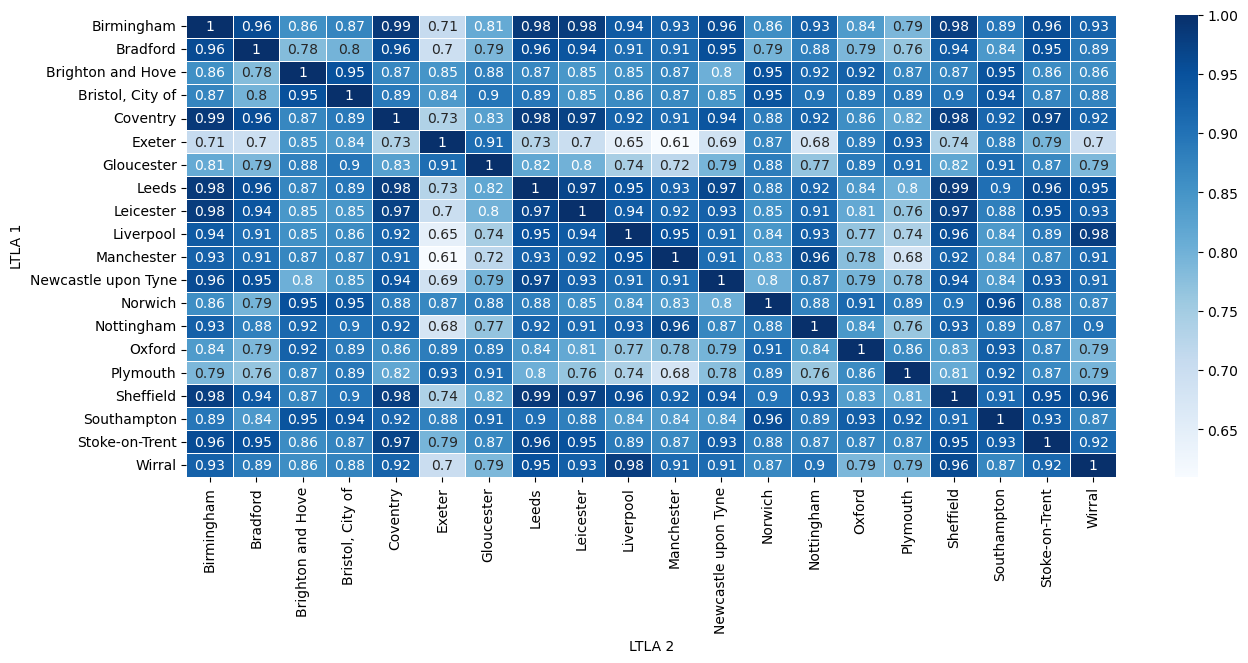

In [226]:
f, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(heatmap3, annot=True, cmap = 'Blues',linewidths=.5, ax=ax)
plt.show()

In [229]:
heatmap3['Mean Correlation'] = heatmap3.mean(axis=1)

In [639]:
heatmap3.nsmallest(5,'Mean Correlation')

LTLA 2      Birmingham  Bradford  Brighton and Hove  Bristol, City of  \
LTLA 1                                                                  
Exeter        0.708596  0.695418           0.847867          0.839251   
Plymouth      0.788440  0.764302           0.869934          0.893128   
Gloucester    0.812298  0.788517           0.880154          0.896021   
Oxford        0.837946  0.789129           0.924752          0.890229   
Manchester    0.925475  0.907196           0.869689          0.866288   

LTLA 2      Coventry    Exeter  Gloucester     Leeds  Leicester  Liverpool  \
LTLA 1                                                                       
Exeter      0.734580  1.000000    0.907599  0.727921   0.699083   0.646279   
Plymouth    0.816260  0.925216    0.908549  0.802934   0.764388   0.739367   
Gloucester  0.828805  0.907599    1.000000  0.817946   0.800092   0.744791   
Oxford      0.859608  0.885687    0.889441  0.841155   0.814786   0.765595   
Manchester  0.909958  0.610003    0.718532  0.925782   0.915160   0.952386   

LTLA 2      ...  Newcastle upon Tyne   Norwich  Nottingham    Oxford  \
LTLA 1      ...                                                        
Exeter      ...             0.687362  0.867998    0.677073  0.885687   
Plymouth    ...             0.775392  0.886075    0.761376  0.863821   
Gloucester  ...             0.793905  0.884643    0.765607  0.889441   
Oxford      ...             0.794521  0.914381    0.844429  1.000000   
Manchester  ...             0.907357  0.832627    0.964554  0.777454   

LTLA 2      Plymouth  Sheffield  Southampton  Stoke-on-Trent    Wirral  \
LTLA 1                                                                   
Exeter      0.925216   0.737046     0.876723        0.793956  0.701354   
Plymouth    1.000000   0.811122     0.919325        0.865658  0.793178   
Gloucester  0.908549   0.817284     0.910667        0.866794  0.787018   
Oxford      0.863821   0.832867     0.930399        0.871177  0.789452   
Manchester  0.679494   0.923011     0.836164        0.867295  0.912651   

LTLA 2      Mean Correlation  
LTLA 1                        
Exeter              0.778451  
Plymouth            0.831398  
Gloucester          0.840933  
Oxford              0.855841  
Manchester          0.865054  

[5 rows x 21 columns]

In [230]:
cities3_newduplag = cities3_new.rename(columns={'LTLA 1':'LTLA 2', 'LTLA 2':'LTLA 1'})
cities3_newduplag['Absolute Lag'] = -(cities3_newduplag['Absolute Lag'])
cities3_heatlag = pd.concat([cities3_new, cities3_newduplag])

In [231]:
heatmap3_lag = cities3_heatlag.pivot(index = 'LTLA 1', columns = 'LTLA 2', values = 'Absolute Lag')
heatmap3_lag = heatmap3_lag.fillna(0)

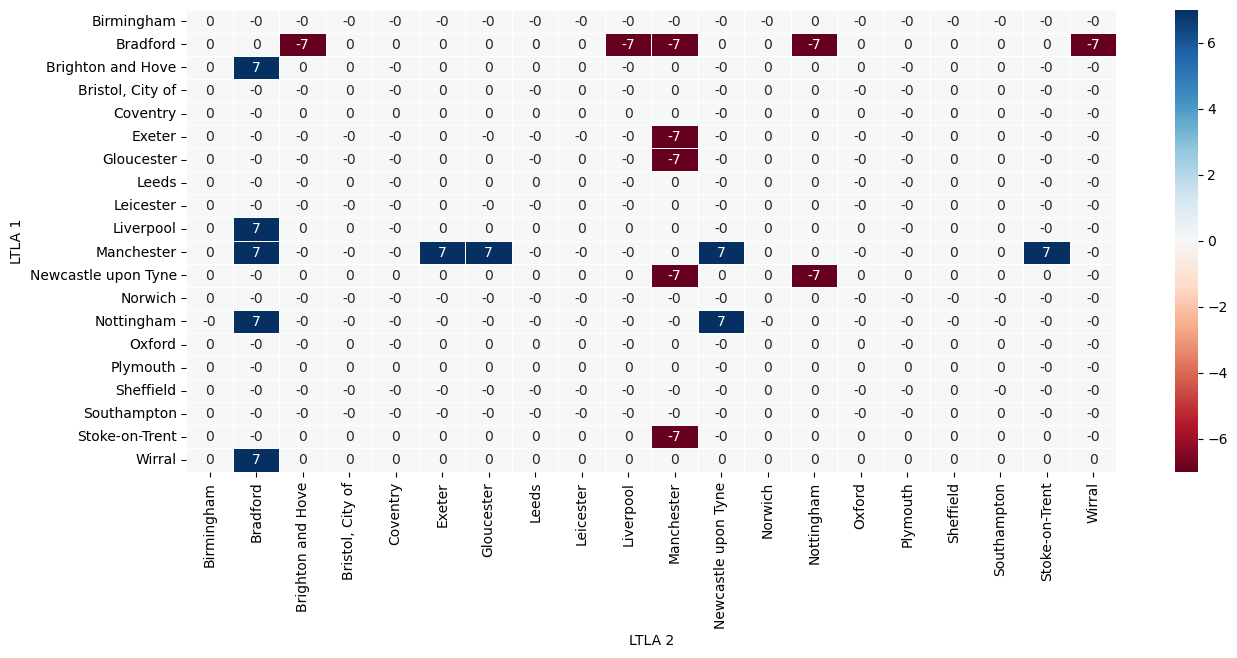

In [232]:
f, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(heatmap3_lag, annot=True, cmap = 'RdBu',linewidths=.5, ax=ax)
plt.show()

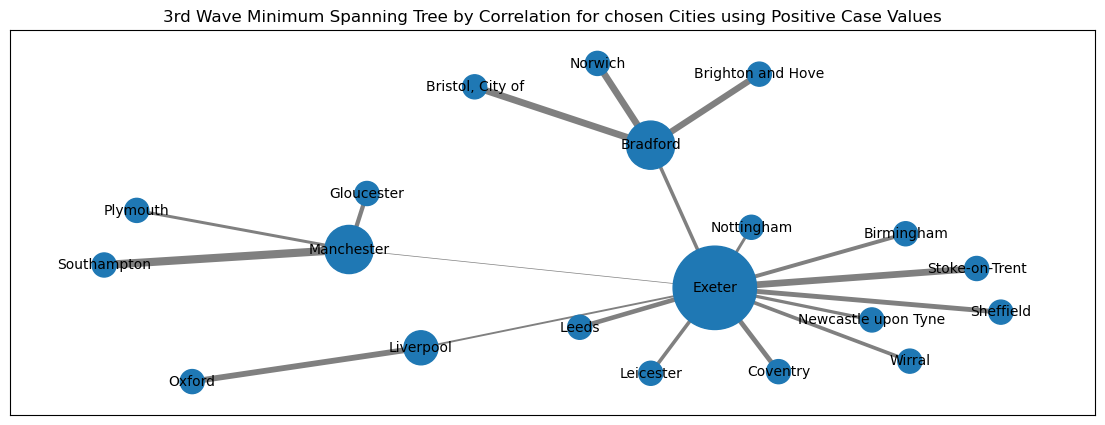

In [645]:
G = nx.from_pandas_edgelist(cities3_new,'LTLA 1','LTLA 2', edge_attr='Maximum Correlation')
T = nx.minimum_spanning_tree(G, weight = 'Maximum Correlation')
corrs = [i['Maximum Correlation'] for i in dict(T.edges).values()]
labels = [i for i in dict(T.nodes).keys()]
labels = {i:i for i in dict(T.nodes).keys()}

def normalize(values, bounds):
    return [bounds['desired']['lower'] + (x - bounds['actual']['lower']) * (bounds['desired']['upper'] - bounds['desired']['lower']) / (bounds['actual']['upper'] - bounds['actual']['lower']) for x in values]
corrs_new = normalize(corrs,{'actual':{'lower':0.61,'upper':0.8},'desired':{'lower':0.5,'upper':5}})

d = T.degree()
degree_values = [v for k, v in d]
deg_vals = [x * 300 for x in degree_values]

fig, ax = plt.subplots(figsize=(14,5))
pos = nx.spring_layout(T)
nx.draw_networkx_nodes(T, pos, ax = ax, node_size = deg_vals, label=True)
nx.draw_networkx_edges(T, pos, width = corrs_new, edge_color = 'grey', ax=ax)
nx.draw_networkx_labels(T, pos, labels, font_size = 10, ax=ax)

plt.title('3rd Wave Minimum Spanning Tree by Correlation for chosen Cities using Positive Case Values')
plt.show()

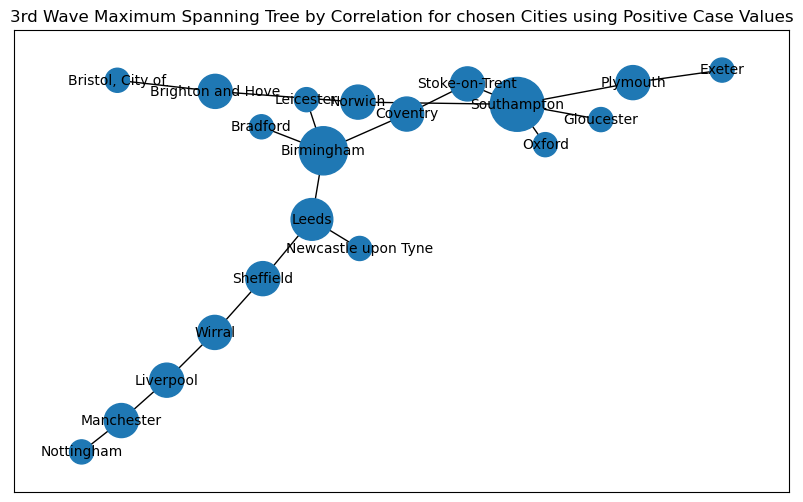

In [234]:
G = nx.from_pandas_edgelist(cities3_new,'LTLA 1','LTLA 2', edge_attr='Maximum Correlation')
T = nx.maximum_spanning_tree(G, weight = 'Maximum Correlation')
#distances = [i['Distance between centroids'] for i in dict(G.edges).values()]
labels = [i for i in dict(T.nodes).keys()]
labels = {i:i for i in dict(T.nodes).keys()}


d = T.degree()
degree_values = [v for k, v in d]
deg_vals = [x * 300 for x in degree_values]

fig, ax = plt.subplots(figsize=(10,6))
pos = nx.spring_layout(T)
nx.draw_networkx_nodes(T, pos, ax = ax, node_size = deg_vals, label=True)
nx.draw_networkx_edges(T, pos, ax=ax)
nx.draw_networkx_labels(T, pos, labels, font_size = 10, ax=ax)

plt.title('3rd Wave Maximum Spanning Tree by Correlation for chosen Cities using Positive Case Values')
plt.show()

In [244]:
cities3_filtered = cities3_new.loc[cities3_new['Maximum Correlation'] > 0.90]
cities3_filtered2 = cities3_new.loc[cities3_new['Maximum Correlation'] > 0.95]
cities3_filtered3 = cities3_new.loc[cities3_new['Maximum Correlation'] > 0.98]


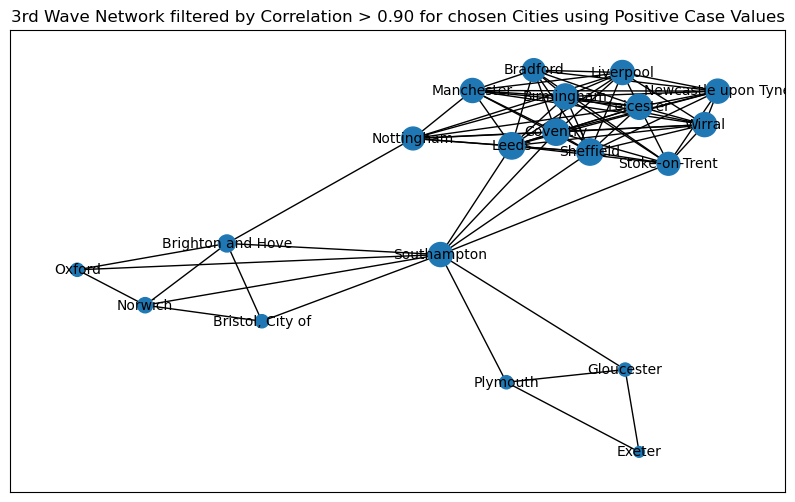

In [241]:
G = nx.from_pandas_edgelist(cities3_filtered,'LTLA 1','LTLA 2', edge_attr='Maximum Correlation')
#T = nx.minimum_spanning_tree(G, weight = 'Maximum Correlation')
#distances = [i['Distance between centroids'] for i in dict(G.edges).values()]
labels = [i for i in dict(G.nodes).keys()]
labels = {i:i for i in dict(G.nodes).keys()}


d = G.degree()
degree_values = [v for k, v in d]
deg_vals = [x * 30 for x in degree_values]

fig, ax = plt.subplots(figsize=(10,6))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, ax = ax, node_size = deg_vals, label=True)
nx.draw_networkx_edges(G, pos, ax=ax)
nx.draw_networkx_labels(G, pos, labels, font_size = 10, ax=ax)

plt.title('3rd Wave Network filtered by Correlation > 0.90 for chosen Cities using Positive Case Values')
plt.show()

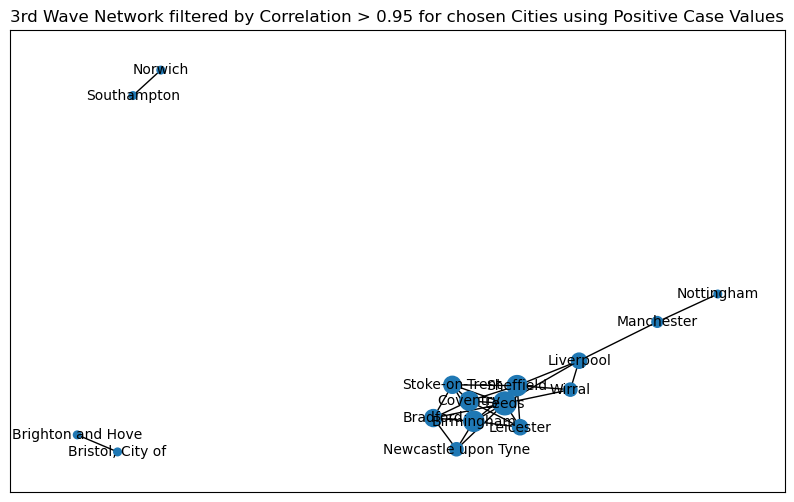

In [242]:
G = nx.from_pandas_edgelist(cities3_filtered2,'LTLA 1','LTLA 2', edge_attr='Maximum Correlation')
#T = nx.minimum_spanning_tree(G, weight = 'Maximum Correlation')
#distances = [i['Distance between centroids'] for i in dict(G.edges).values()]
labels = [i for i in dict(G.nodes).keys()]
labels = {i:i for i in dict(G.nodes).keys()}


d = G.degree()
degree_values = [v for k, v in d]
deg_vals = [x * 30 for x in degree_values]

fig, ax = plt.subplots(figsize=(10,6))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, ax = ax, node_size = deg_vals, label=True)
nx.draw_networkx_edges(G, pos, ax=ax)
nx.draw_networkx_labels(G, pos, labels, font_size = 10, ax=ax)

plt.title('3rd Wave Network filtered by Correlation > 0.95 for chosen Cities using Positive Case Values')
plt.show()

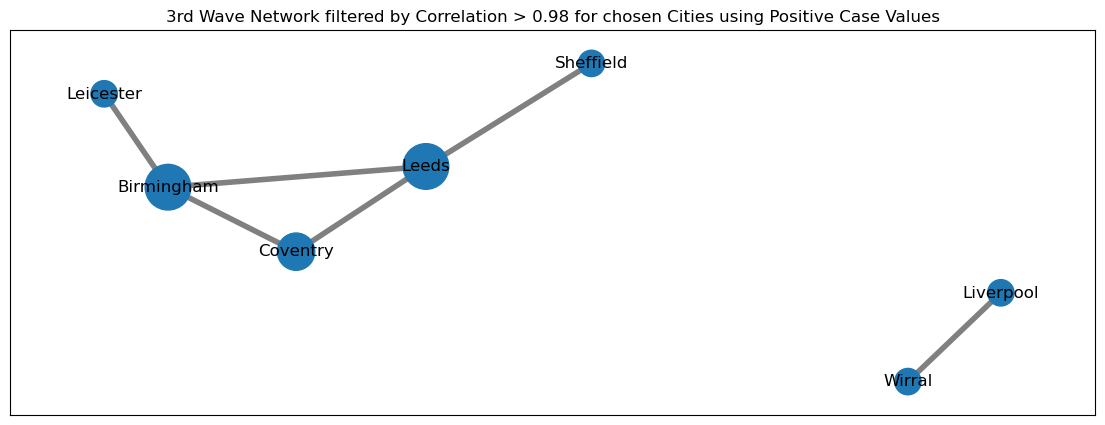

In [650]:
G = nx.from_pandas_edgelist(cities3_filtered3,'LTLA 1','LTLA 2', edge_attr='Maximum Correlation')
#T = nx.minimum_spanning_tree(G, weight = 'Maximum Correlation')
#distances = [i['Distance between centroids'] for i in dict(G.edges).values()]
labels = [i for i in dict(G.nodes).keys()]
labels = {i:i for i in dict(G.nodes).keys()}


d = G.degree()
degree_values = [v for k, v in d]
deg_vals = [x * 360 for x in degree_values]

fig, ax = plt.subplots(figsize=(14,5))
pos = nx.spring_layout(G, k=1)
nx.draw_networkx_nodes(G, pos, ax = ax, node_size = deg_vals, label=True)
nx.draw_networkx_edges(G, pos, edge_color='grey', width=4,ax=ax)
nx.draw_networkx_labels(G, pos, labels, font_size = 12, ax=ax)

plt.title('3rd Wave Network filtered by Correlation > 0.98 for chosen Cities using Positive Case Values')
plt.show()

In [651]:
cities3_filtered3

LTLA 1      LTLA 2  Maximum Correlation  Lag in Days  Urban/Rural  \
138978      Leeds  Birmingham             0.983564          0.0  Urban-Urban   
142007  Leicester  Birmingham             0.980751          0.0  Urban-Urban   
123927   Coventry  Birmingham             0.985832          0.0  Urban-Urban   
108185     Wirral   Liverpool             0.980157          0.0  Urban-Rural   
123856   Coventry       Leeds             0.980207          0.0  Urban-Urban   
138962      Leeds   Sheffield             0.985261          0.0  Urban-Rural   

        Distance > 150km?  Distance between centroids Wave  Absolute Lag  
138978               True                  150.726568  3rd           0.0  
142007              False                   53.194806  3rd           0.0  
123927              False                   25.406457  3rd           0.0  
108185              False                   11.212828  3rd           0.0  
123856               True                  156.666622  3rd           0.0  
138962              False                   46.917816  3rd           0.0

# Overall Analysis (Positive Case Values)

In [251]:
means1 = heatmap1['Mean Correlation']
means2 = heatmap2['Mean Correlation']
means3 = heatmap3['Mean Correlation']

In [255]:
overall_means = pd.DataFrame(means1)

In [256]:
overall_means = overall_means.reset_index()


LTLA 1  Mean Correlation
0            Birmingham          0.757823
1              Bradford          0.452993
2     Brighton and Hove          0.696653
3      Bristol, City of          0.706736
4              Coventry          0.713207
5                Exeter          0.674461
6            Gloucester          0.703595
7                 Leeds          0.723792
8             Leicester          0.512495
9             Liverpool          0.757048
10           Manchester          0.682720
11  Newcastle upon Tyne          0.742208
12              Norwich          0.587151
13           Nottingham          0.710359
14               Oxford          0.649285
15             Plymouth          0.657290
16            Sheffield          0.723540
17          Southampton          0.708288
18       Stoke-on-Trent          0.716008
19               Wirral          0.719497

In [257]:
overall_means = overall_means.rename(columns={'LTLA 1':'LTLA', 'Mean Correlation':'1st Wave Correlation Mean'})

In [258]:
overall_means['2nd Wave Correlation Mean'] = list(means2)
overall_means['3rd Wave Correlation Mean'] = list(means3)

In [260]:
overall_means['Overall Correlation Mean'] = overall_means.mean(axis=1)

/var/folders/5m/nyccnvvs4197vfzljd054r300000gn/T/ipykernel_1653/1624341590.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  overall_means['Overall Correlation Mean'] = overall_means.mean(axis=1)


In [261]:
overall_means

LTLA  1st Wave Correlation Mean  2nd Wave Correlation Mean  \
0            Birmingham                   0.757823                   0.782291   
1              Bradford                   0.452993                   0.672010   
2     Brighton and Hove                   0.696653                   0.756725   
3      Bristol, City of                   0.706736                   0.718242   
4              Coventry                   0.713207                   0.774340   
5                Exeter                   0.674461                   0.623266   
6            Gloucester                   0.703595                   0.718166   
7                 Leeds                   0.723792                   0.677171   
8             Leicester                   0.512495                   0.720180   
9             Liverpool                   0.757048                   0.683266   
10           Manchester                   0.682720                   0.665319   
11  Newcastle upon Tyne                   0.742208                   0.654995   
12              Norwich                   0.587151                   0.727433   
13           Nottingham                   0.710359                   0.668468   
14               Oxford                   0.649285                   0.757154   
15             Plymouth                   0.657290                   0.710769   
16            Sheffield                   0.723540                   0.699198   
17          Southampton                   0.708288                   0.756452   
18       Stoke-on-Trent                   0.716008                   0.623685   
19               Wirral                   0.719497                   0.756493   

    3rd Wave Correlation Mean  Overall Correlation Mean  
0                    0.907517                  0.815877  
1                    0.874730                  0.666578  
2                    0.881327                  0.778235  
3                    0.888982                  0.771320  
4                    0.913533                  0.800360  
5                    0.778451                  0.692059  
6                    0.840933                  0.754232  
7                    0.914513                  0.771825  
8                    0.895898                  0.709524  
9                    0.878627                  0.772980  
10                   0.865054                  0.737698  
11                   0.878316                  0.758506  
12                   0.884400                  0.732994  
13                   0.883002                  0.753943  
14                   0.855841                  0.754093  
15                   0.831398                  0.733152  
16                   0.914795                  0.779178  
17                   0.902058                  0.788933  
18                   0.908639                  0.749444  
19                   0.887018                  0.787669

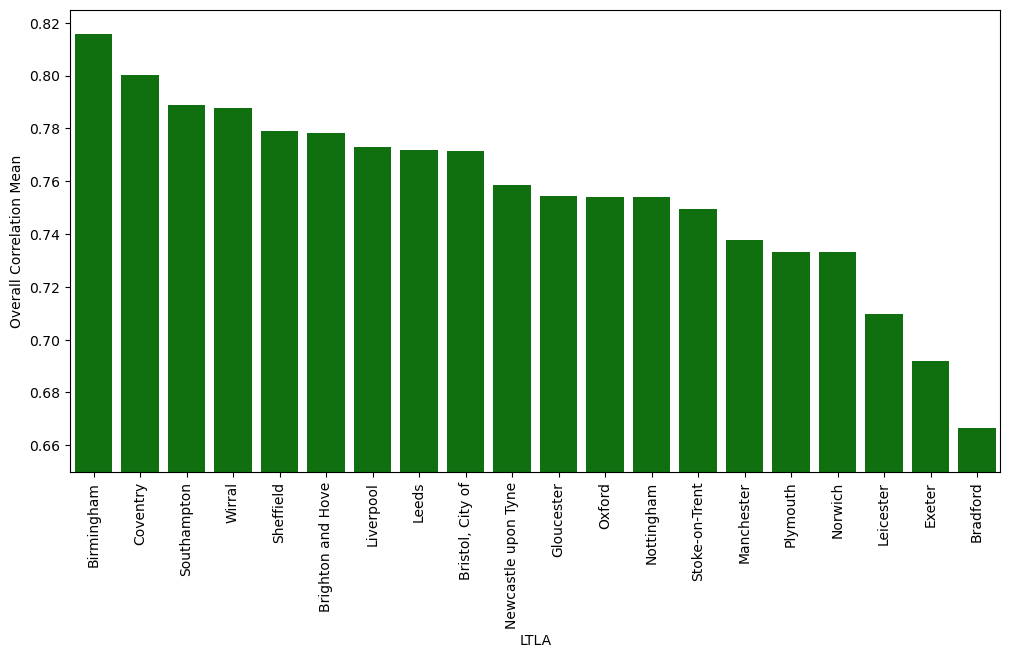

In [274]:
plt.figure(figsize=(12,6))
sns.barplot(x='LTLA', y="Overall Correlation Mean", color = 'green', data=overall_means, order=overall_means.sort_values('Overall Correlation Mean', ascending=False).LTLA)
plt.ylim(0.65, 0.825)
plt.xticks(rotation ='vertical')
plt.show()            

In [279]:
city_map_df = map_df.merge(overall_means, how='left', left_on = 'LAD19NM', right_on = 'LTLA')

In [281]:
city_map_df = city_map_df[city_map_df['LTLA'].notna()]

In [330]:
city_map_df = city_map_df.merge(pops, how='left', left_on='LAD19NM', right_on = 'Name')

In [319]:
corrs = city_map_df['Overall Correlation Mean']
def normalize(values, bounds):
    return [bounds['desired']['lower'] + (x - bounds['actual']['lower']) * (bounds['desired']['upper'] - bounds['desired']['lower']) / (bounds['actual']['upper'] - bounds['actual']['lower']) for x in values]
corrs_new = normalize(corrs,{'actual':{'lower':0.666,'upper':0.817},'desired':{'lower':2,'upper':15}})


In [320]:
def square(list):
    return [i ** 3 for i in list]
corrs_square = square(corrs_new)

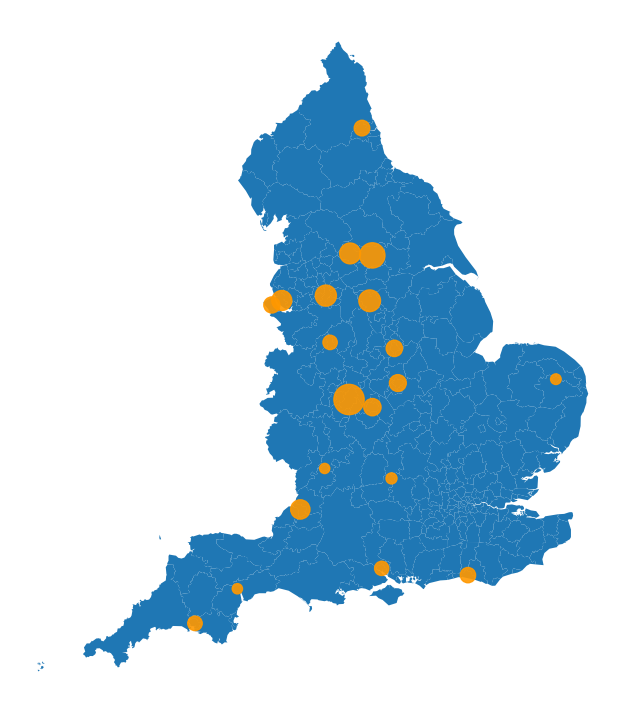

In [444]:

fig, ax = plt.subplots(figsize=(15,9))
map_df['geometry'].plot(ax=ax)
city_map_df['Centroid'].plot(ax=ax, color='#FF9800', marker='.', zorder=2, alpha=0.9, markersize=((city_map_df['All ages'])/600))
ax.set_axis_off()
plt.show()

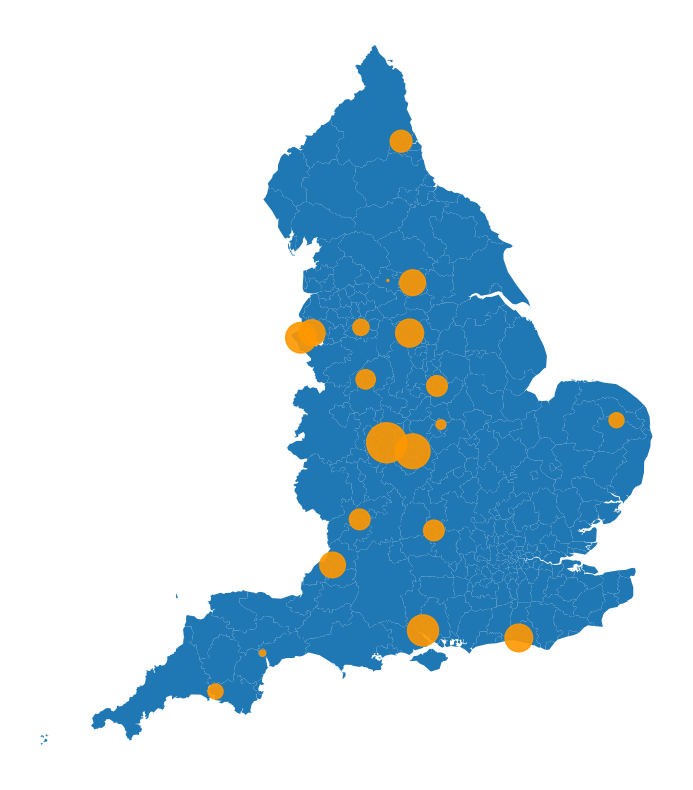

In [336]:
fig, ax = plt.subplots(figsize=(16,10))
map_df['geometry'].plot(ax=ax)
city_map_df['Centroid'].plot(ax=ax, color='#FF9800', marker='.', zorder=2, alpha=0.9, markersize=corrs_square)
ax.set_axis_off()
plt.show()

In [453]:
cities1.reset_index()

index             LTLA 1            LTLA 2  Maximum Correlation  \
0    45678         Birmingham        Manchester             0.811053   
1    33505          Liverpool        Birmingham             0.859562   
2    40696         Birmingham             Leeds             0.732307   
3    46306          Sheffield        Birmingham             0.836543   
4    40825         Birmingham  Bristol, City of             0.776451   
..     ...                ...               ...                  ...   
185   9967         Gloucester            Wirral             0.660644   
186   2667         Gloucester          Bradford             0.348565   
187  21061         Gloucester          Plymouth             0.732957   
188  33976  Brighton and Hove        Gloucester             0.664956   
189  34999             Oxford        Gloucester             0.599802   

     Lag in Days  Urban/Rural  Distance > 150km?  Distance between centroids  \
0           -6.0  Urban-Urban              False                  109.916445   
1            0.0  Urban-Urban              False                  123.579075   
2           -6.0  Urban-Urban               True                  150.726568   
3            0.0  Urban-Rural              False                  104.161511   
4           -6.0  Urban-Urban              False                  124.150535   
..           ...          ...                ...                         ...   
185         -3.0  Urban-Rural               True                  177.425975   
186        -18.0  Urban-Rural               True                  223.585080   
187         -4.0  Urban-Urban               True                  208.596059   
188          2.0  Urban-Urban               True                  184.419592   
189          1.0  Urban-Rural              False                   69.733532   

    Wave  Absolute Lag  
0    1st           6.0  
1    1st           0.0  
2    1st           6.0  
3    1st           0.0  
4    1st           6.0  
..   ...           ...  
185  1st           3.0  
186  1st          18.0  
187  1st           4.0  
188  1st           2.0  
189  1st           1.0  

[190 rows x 10 columns]

In [456]:
cities1_new = cities1.reset_index()
cities2_new = cities2.reset_index()
cities3_new = cities3.reset_index()


In [464]:
cities1_new = cities1_new.drop(columns=['index', 'Urban/Rural', 'Distance > 150km?', 'Distance between centroids', 'Wave', 'Absolute Lag'])
cities2_new = cities2_new.drop(columns=['index', 'Urban/Rural', 'Distance > 150km?', 'Distance between centroids', 'Wave', 'Absolute Lag'])
cities3_new = cities3_new.drop(columns=['index', 'Urban/Rural', 'Distance > 150km?', 'Distance between centroids', 'Wave', 'Absolute Lag'])

In [465]:
overall_cities = pd.merge(cities1_new, cities2_new, left_index=True, right_index=True)

In [467]:
overall_cities = pd.merge(overall_cities, cities3_new, left_index=True, right_index=True)

In [469]:
overall_cities = overall_cities.rename(columns={'Maximum Correlation_x':'1st Wave Correlation','Maximum Correlation_y':'2nd Wave Correlation','Maximum Correlation':'3rd Wave Correlation','Lag in Days_x':'1st Wave Lag','Lag in Days_y':'2nd Wave Lag','Lag in Days':'3rd Wave Lag'})

In [472]:
overall_cities = overall_cities.drop(columns = ['LTLA 1', 'LTLA 2', 'LTLA 1_y', 'LTLA 2_y'])

In [474]:
overall_cities_mean = overall_cities.drop(columns = ['1st Wave Lag', '2nd Wave Lag', '3rd Wave Lag'])
overall_cities_mean['Average overall correlation'] = overall_cities_mean.mean(axis=1)

/var/folders/5m/nyccnvvs4197vfzljd054r300000gn/T/ipykernel_1653/493287428.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  overall_cities_mean['Average overall correlation'] = overall_cities_mean.mean(axis=1)


In [476]:
overall_cities_meandup= overall_cities_mean.rename(columns={'LTLA 1_x':'LTLA 2_x', 'LTLA 2_x':'LTLA 1_x'})

In [478]:
overall_heatmap = pd.concat([overall_cities_mean, overall_cities_meandup])
overall_heatmap = overall_heatmap.pivot(index = 'LTLA 1_x', columns = 'LTLA 2_x', values = 'Average overall correlation')
overall_heatmap = overall_heatmap.fillna(1)

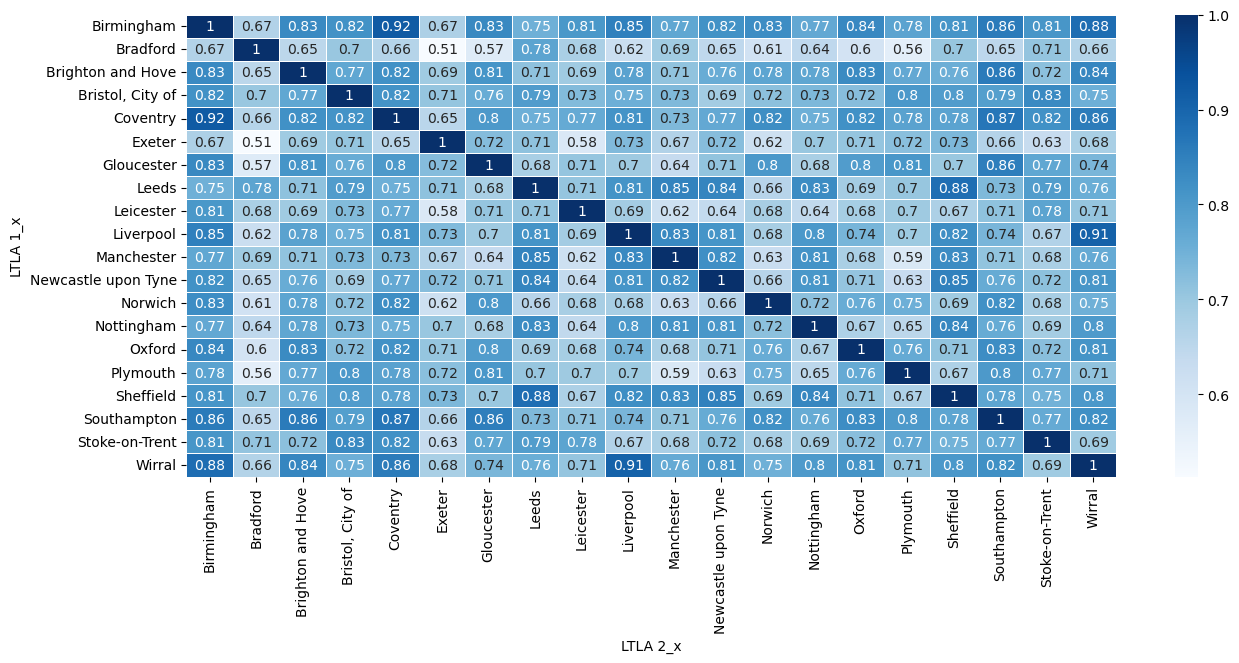

In [479]:
f, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(overall_heatmap, annot=True, cmap = 'Blues',linewidths=.5, ax=ax)
plt.show()

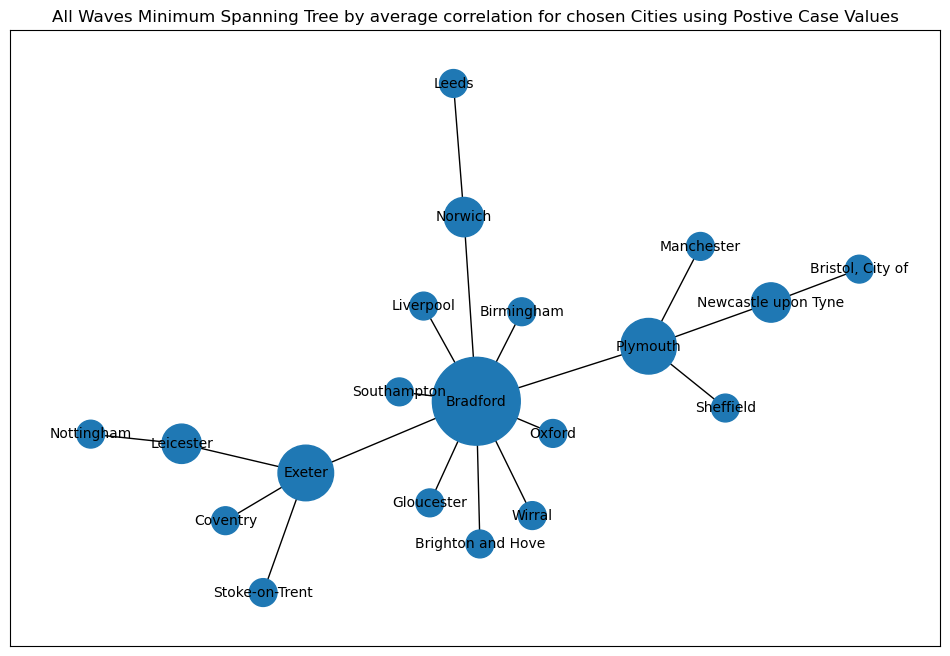

In [484]:
G = nx.from_pandas_edgelist(overall_cities_mean,'LTLA 1_x','LTLA 2_x', edge_attr='Average overall correlation')
T = nx.minimum_spanning_tree(G, weight = 'Average overall correlation')
#distances = [i['Distance between centroids'] for i in dict(G.edges).values()]
labels = [i for i in dict(T.nodes).keys()]
labels = {i:i for i in dict(T.nodes).keys()}


d = T.degree()
degree_values = [v for k, v in d]
deg_vals = [x * 400 for x in degree_values]

fig, ax = plt.subplots(figsize=(12,8))
pos = nx.spring_layout(T)
nx.draw_networkx_nodes(T, pos, ax = ax, node_size = deg_vals, label=True)
nx.draw_networkx_edges(T, pos, ax=ax)
nx.draw_networkx_labels(T, pos, labels, font_size = 10, ax=ax)

plt.title('All Waves Minimum Spanning Tree by average correlation for chosen Cities using Postive Case Values')
plt.show()

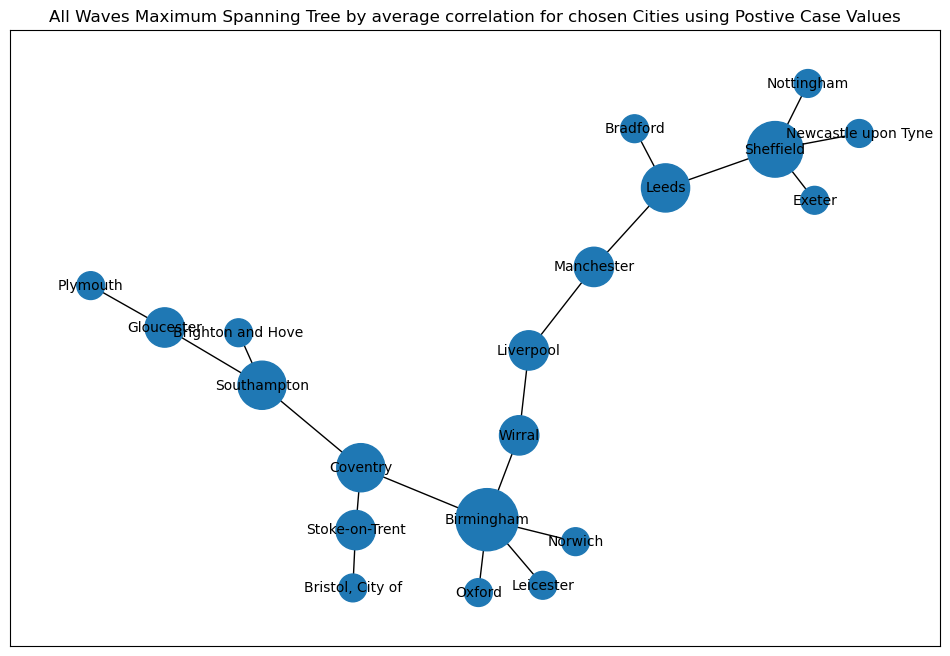

In [486]:
G = nx.from_pandas_edgelist(overall_cities_mean,'LTLA 1_x','LTLA 2_x', edge_attr='Average overall correlation')
T = nx.maximum_spanning_tree(G, weight = 'Average overall correlation')
#distances = [i['Distance between centroids'] for i in dict(G.edges).values()]
labels = [i for i in dict(T.nodes).keys()]
labels = {i:i for i in dict(T.nodes).keys()}


d = T.degree()
degree_values = [v for k, v in d]
deg_vals = [x * 400 for x in degree_values]

fig, ax = plt.subplots(figsize=(12,8))
pos = nx.spring_layout(T)
nx.draw_networkx_nodes(T, pos, ax = ax, node_size = deg_vals, label=True)
nx.draw_networkx_edges(T, pos, ax=ax)
nx.draw_networkx_labels(T, pos, labels, font_size = 10, ax=ax)

plt.title('All Waves Maximum Spanning Tree by average correlation for chosen Cities using Postive Case Values')
plt.show()

In [498]:
overall_filtered = overall_cities_mean.loc[overall_cities_mean['Average overall correlation'] > 0.75]
overall_filtered2 = overall_cities_mean.loc[overall_cities_mean['Average overall correlation'] > 0.80]
overall_filtered3 = overall_cities_mean.loc[overall_cities_mean['Average overall correlation'] > 0.85]

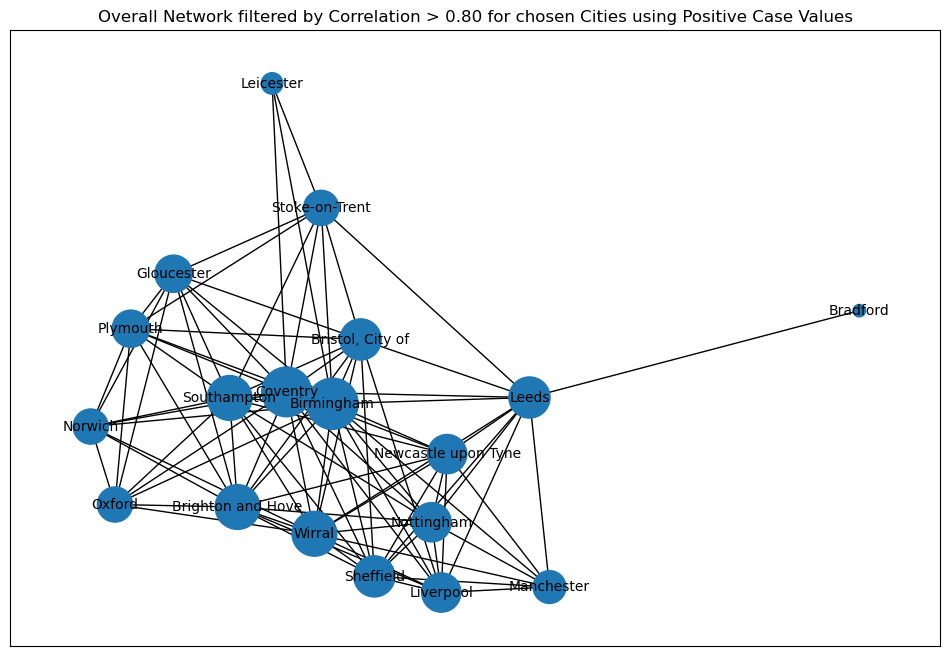

In [499]:
G = nx.from_pandas_edgelist(overall_filtered,'LTLA 1_x','LTLA 2_x', edge_attr='Average overall correlation')
#T = nx.minimum_spanning_tree(G, weight = 'Maximum Correlation')
#distances = [i['Distance between centroids'] for i in dict(G.edges).values()]
labels = [i for i in dict(G.nodes).keys()]
labels = {i:i for i in dict(G.nodes).keys()}


d = G.degree()
degree_values = [v for k, v in d]
deg_vals = [x * 80 for x in degree_values]

fig, ax = plt.subplots(figsize=(12,8))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, ax = ax, node_size = deg_vals, label=True)
nx.draw_networkx_edges(G, pos, ax=ax)
nx.draw_networkx_labels(G, pos, labels, font_size = 10, ax=ax)

plt.title('Overall Network filtered by Correlation > 0.75 for chosen Cities using Positive Case Values')
plt.show()

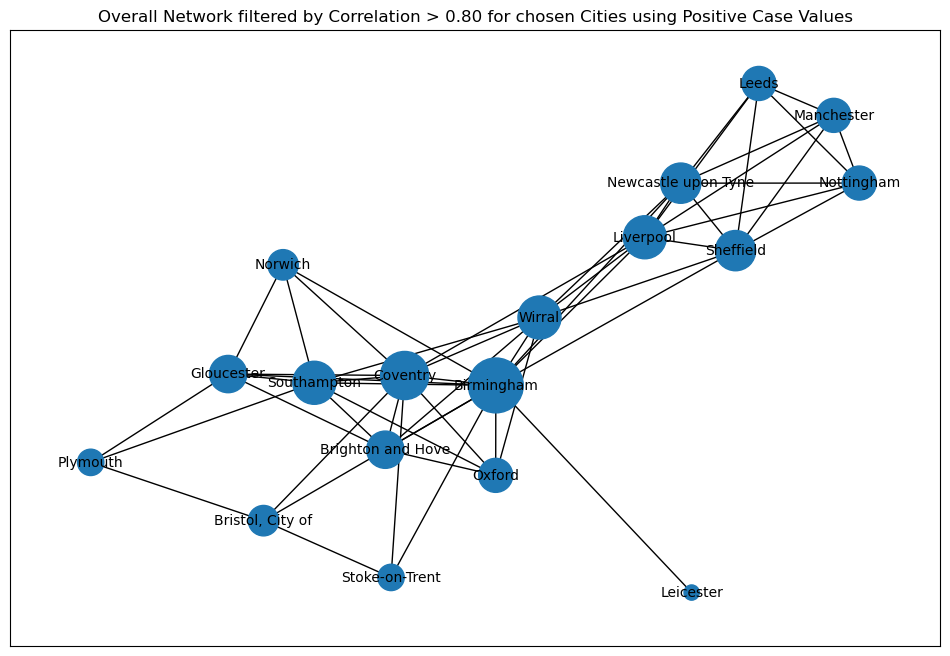

In [500]:
G = nx.from_pandas_edgelist(overall_filtered2,'LTLA 1_x','LTLA 2_x', edge_attr='Average overall correlation')
#T = nx.minimum_spanning_tree(G, weight = 'Maximum Correlation')
#distances = [i['Distance between centroids'] for i in dict(G.edges).values()]
labels = [i for i in dict(G.nodes).keys()]
labels = {i:i for i in dict(G.nodes).keys()}


d = G.degree()
degree_values = [v for k, v in d]
deg_vals = [x * 120 for x in degree_values]

fig, ax = plt.subplots(figsize=(12,8))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, ax = ax, node_size = deg_vals, label=True)
nx.draw_networkx_edges(G, pos, ax=ax)
nx.draw_networkx_labels(G, pos, labels, font_size = 10, ax=ax)

plt.title('Overall Network filtered by Correlation > 0.80 for chosen Cities using Positive Case Values')
plt.show()

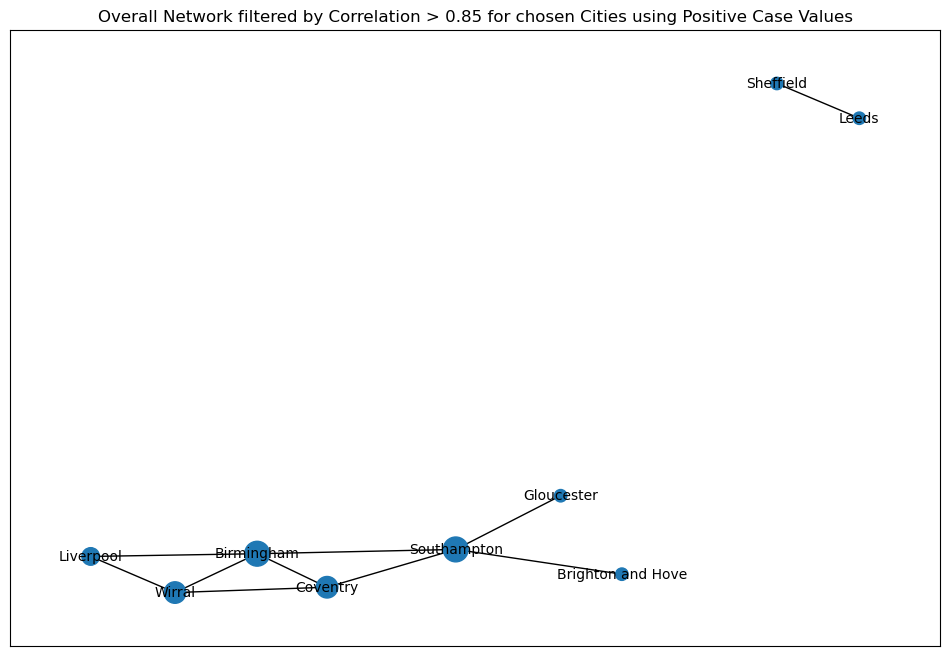

In [501]:
G = nx.from_pandas_edgelist(overall_filtered3,'LTLA 1_x','LTLA 2_x', edge_attr='Average overall correlation')
#T = nx.minimum_spanning_tree(G, weight = 'M3aximum Correlation')
#distances = [i['Distance between centroids'] for i in dict(G.edges).values()]
labels = [i for i in dict(G.nodes).keys()]
labels = {i:i for i in dict(G.nodes).keys()}


d = G.degree()
degree_values = [v for k, v in d]
deg_vals = [x * 80 for x in degree_values]

fig, ax = plt.subplots(figsize=(12,8))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, ax = ax, node_size = deg_vals, label=True)
nx.draw_networkx_edges(G, pos, ax=ax)
nx.draw_networkx_labels(G, pos, labels, font_size = 10, ax=ax)

plt.title('Overall Network filtered by Correlation > 0.85 for chosen Cities using Positive Case Values')
plt.show()

# 1st Wave (R Values)

In [717]:
firstwave_r = pd.read_csv('First_Wave_R.csv')

In [718]:
cities1r = [(firstwave_r.loc[firstwave_r['LTLA 1'] == cities[i]]) for i in range(len(cities))]
cities1r_df = pd.concat(cities1r)
cities_1r = [(cities1r_df.loc[firstwave_r['LTLA 2'] == cities[i]]) for i in range(len(cities))]
cities_1rdf = pd.concat(cities_1r)

In [719]:
cities_1rdf

LTLA 1      LTLA 2  Maximum Correlation  Lag in Days
45992         Manchester  Birmingham             0.894698         -7.0
33642          Liverpool  Birmingham             0.770494         -7.0
40880              Leeds  Birmingham             0.539886         -3.0
46620          Sheffield  Birmingham             0.804659          0.0
41010   Bristol, City of  Birmingham             0.663494         -7.0
...                  ...         ...                  ...          ...
10000             Wirral  Gloucester             0.286112         -2.0
2675            Bradford  Gloucester             0.497904          1.0
21137           Plymouth  Gloucester             0.591738          0.0
34115  Brighton and Hove  Gloucester             0.328612          0.0
35144             Oxford  Gloucester             0.359164          0.0

[190 rows x 4 columns]

In [346]:
cities_1rdf_rep = cities_1rdf.drop(columns = ['Lag in Days'])

In [347]:
cities1r_new = lag_direction(cities_1rdf, cities_1rdf_rep)

/var/folders/5m/nyccnvvs4197vfzljd054r300000gn/T/ipykernel_1653/1245444803.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['LTLA 1'].iloc[i] = df2['LTLA 2'].iloc[i]
/var/folders/5m/nyccnvvs4197vfzljd054r300000gn/T/ipykernel_1653/1245444803.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['LTLA 2'].iloc[i] = df2['LTLA 1'].iloc[i]


In [348]:
cities1r_new['Absolute Lag'] = abs(cities1r_new['Lag in Days'])

In [349]:
cities1r_newdup = cities1r_new.rename(columns={'LTLA 1':'LTLA 2', 'LTLA 2':'LTLA 1'})

In [350]:
cities1r_heat = pd.concat([cities1r_new, cities1r_newdup])
heatmap1r = cities1r_heat.pivot(index = 'LTLA 1', columns = 'LTLA 2', values = 'Maximum Correlation')
heatmap1r = heatmap1r.fillna(1)

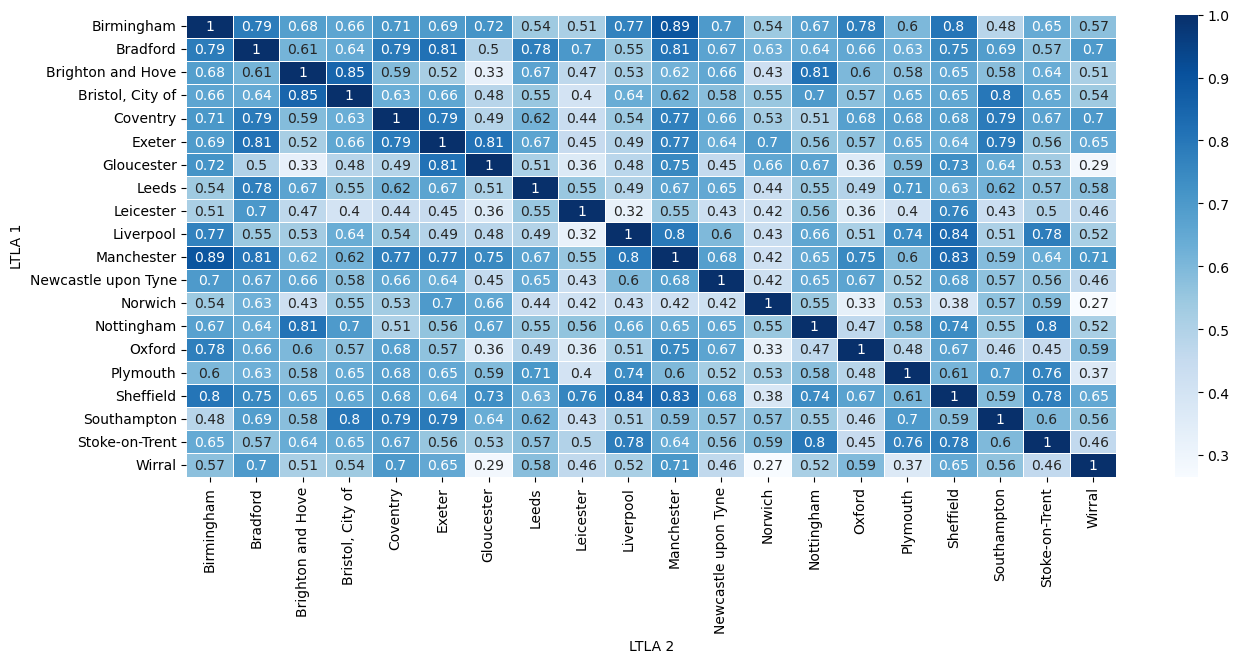

In [351]:
f, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(heatmap1r, annot=True, cmap = 'Blues',linewidths=.5, ax=ax)
plt.show()

In [352]:
heatmap1r['Mean Correlation'] = heatmap1r.mean(axis=1)

In [555]:
cities1r_new.nlargest(5,'Maximum Correlation')

LTLA 1             LTLA 2  Maximum Correlation  Lag in Days  \
45992        Birmingham         Manchester             0.894698         -7.0   
34099  Bristol, City of  Brighton and Hove             0.848357         -1.0   
33626         Sheffield          Liverpool             0.837713         -4.0   
45976         Sheffield         Manchester             0.834237         -6.0   
2699           Bradford             Exeter             0.814149          9.0   

       Absolute Lag  
45992           7.0  
34099           1.0  
33626           4.0  
45976           6.0  
2699            9.0

In [544]:
heatmap1r_pops = heatmap1r.merge(pops, how='left', left_on = 'LTLA 1', right_on = 'Name')

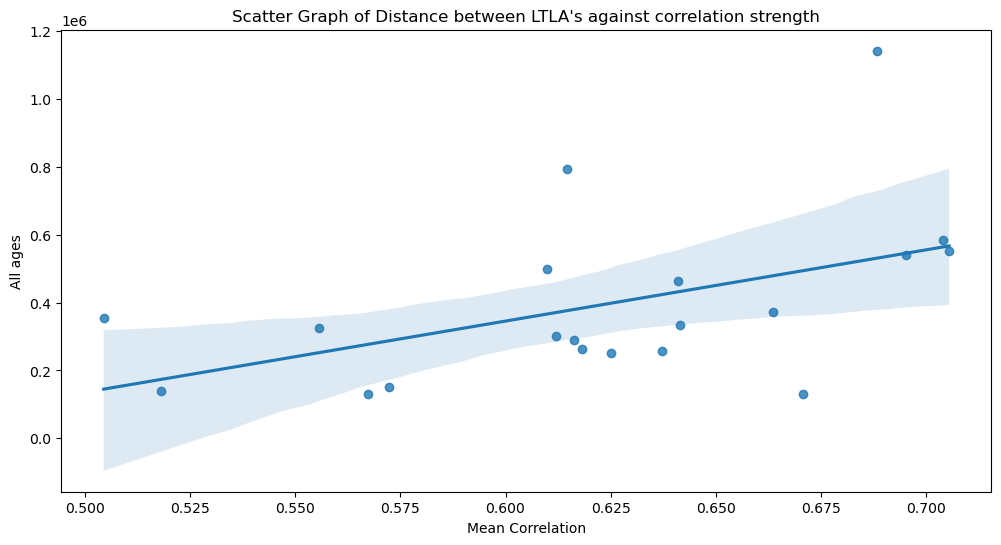

In [545]:
plt.figure(figsize=(12,6))

sns.regplot(data = heatmap1r_pops, x = "Mean Correlation", y = "All ages")
plt.title("Scatter Graph of Distance between LTLA's against correlation strength")

plt.show()

In [548]:
from scipy.stats import pearsonr
data1 = heatmap1r_pops['Mean Correlation']
data2 = heatmap1r_pops['All ages']

corr, _ = pearsonr(data1, data2)
print('Correlation between city population and correlation strength: %.3f' % corr)

Correlation between city population and correlation strength: 0.489


In [353]:
cities1r_newduplag = cities1r_new.rename(columns={'LTLA 1':'LTLA 2', 'LTLA 2':'LTLA 1'})
cities1r_newduplag['Absolute Lag'] = -(cities1r_newduplag['Absolute Lag'])
cities1r_heatlag = pd.concat([cities1r_new, cities1r_newduplag])

In [354]:
heatmap1r_lag = cities1r_heatlag.pivot(index = 'LTLA 1', columns = 'LTLA 2', values = 'Absolute Lag')
heatmap1r_lag = heatmap1r_lag.fillna(0)

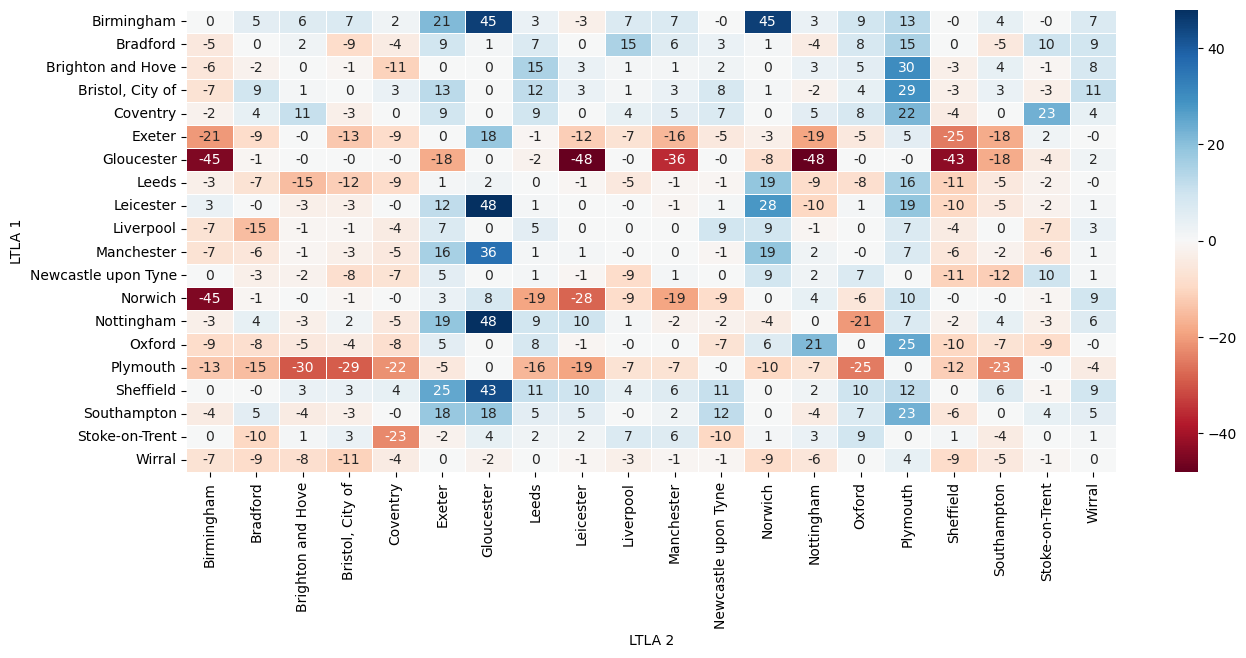

In [355]:
f, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(heatmap1r_lag, annot=True, cmap = 'RdBu',linewidths=.5, ax=ax)
plt.show()

In [556]:
heatmap1r_lag['Mean Lag'] = heatmap1r_lag.mean(axis=1)

In [560]:
heatmap1r_lag.nsmallest(5, 'Mean Lag')

LTLA 2      Birmingham  Bradford  Brighton and Hove  Bristol, City of  \
LTLA 1                                                                  
Gloucester       -45.0      -1.0               -0.0              -0.0   
Plymouth         -13.0     -15.0              -30.0             -29.0   
Exeter           -21.0      -9.0               -0.0             -13.0   
Norwich          -45.0      -1.0               -0.0              -1.0   
Wirral            -7.0      -9.0               -8.0             -11.0   

LTLA 2      Coventry  Exeter  Gloucester  Leeds  Leicester  Liverpool  ...  \
LTLA 1                                                                 ...   
Gloucester      -0.0   -18.0         0.0   -2.0      -48.0       -0.0  ...   
Plymouth       -22.0    -5.0         0.0  -16.0      -19.0       -7.0  ...   
Exeter          -9.0     0.0        18.0   -1.0      -12.0       -7.0  ...   
Norwich         -0.0     3.0         8.0  -19.0      -28.0       -9.0  ...   
Wirral          -4.0     0.0        -2.0    0.0       -1.0       -3.0  ...   

LTLA 2      Newcastle upon Tyne  Norwich  Nottingham  Oxford  Plymouth  \
LTLA 1                                                                   
Gloucester                 -0.0     -8.0       -48.0    -0.0      -0.0   
Plymouth                   -0.0    -10.0        -7.0   -25.0       0.0   
Exeter                     -5.0     -3.0       -19.0    -5.0       5.0   
Norwich                    -9.0      0.0         4.0    -6.0      10.0   
Wirral                     -1.0     -9.0        -6.0     0.0       4.0   

LTLA 2      Sheffield  Southampton  Stoke-on-Trent  Wirral  Mean Lag  
LTLA 1                                                                
Gloucester      -43.0        -18.0            -4.0     2.0    -13.45  
Plymouth        -12.0        -23.0            -0.0    -4.0    -12.20  
Exeter          -25.0        -18.0             2.0    -0.0     -6.90  
Norwich          -0.0         -0.0            -1.0     9.0     -5.20  
Wirral           -9.0         -5.0            -1.0     0.0     -3.65  

[5 rows x 21 columns]

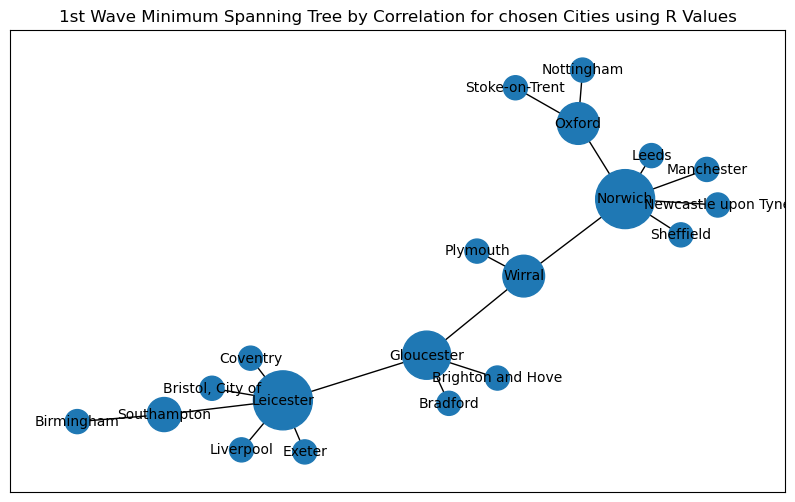

In [356]:
G = nx.from_pandas_edgelist(cities1r_new,'LTLA 1','LTLA 2', edge_attr='Maximum Correlation')
T = nx.minimum_spanning_tree(G, weight = 'Maximum Correlation')
#distances = [i['Distance between centroids'] for i in dict(G.edges).values()]
labels = [i for i in dict(T.nodes).keys()]
labels = {i:i for i in dict(T.nodes).keys()}


d = T.degree()
degree_values = [v for k, v in d]
deg_vals = [x * 300 for x in degree_values]

fig, ax = plt.subplots(figsize=(10,6))
pos = nx.spring_layout(T)
nx.draw_networkx_nodes(T, pos, ax = ax, node_size = deg_vals, label=True)
nx.draw_networkx_edges(T, pos, ax=ax)
nx.draw_networkx_labels(T, pos, labels, font_size = 10, ax=ax)

plt.title('1st Wave Minimum Spanning Tree by Correlation for chosen Cities using R Values')
plt.show()

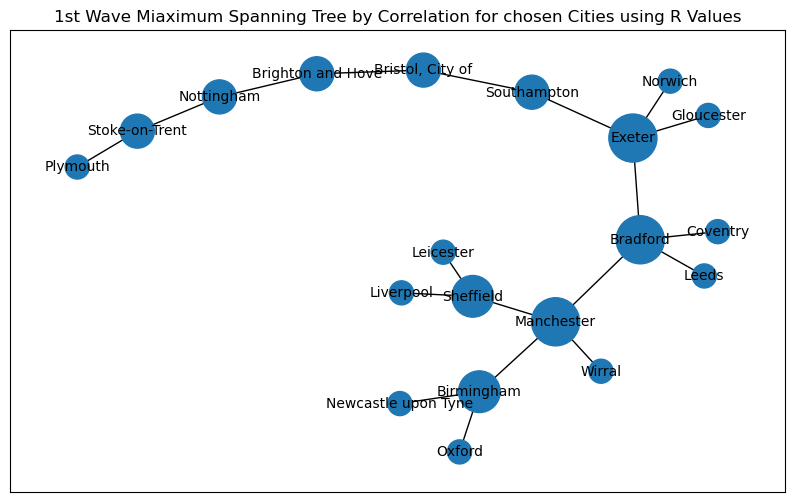

In [357]:
G = nx.from_pandas_edgelist(cities1r_new,'LTLA 1','LTLA 2', edge_attr='Maximum Correlation')
T = nx.maximum_spanning_tree(G, weight = 'Maximum Correlation')
#distances = [i['Distance between centroids'] for i in dict(G.edges).values()]
labels = [i for i in dict(T.nodes).keys()]
labels = {i:i for i in dict(T.nodes).keys()}


d = T.degree()
degree_values = [v for k, v in d]
deg_vals = [x * 300 for x in degree_values]

fig, ax = plt.subplots(figsize=(10,6))
pos = nx.spring_layout(T)
nx.draw_networkx_nodes(T, pos, ax = ax, node_size = deg_vals, label=True)
nx.draw_networkx_edges(T, pos, ax=ax)
nx.draw_networkx_labels(T, pos, labels, font_size = 10, ax=ax)

plt.title('1st Wave Maximum Spanning Tree by Correlation for chosen Cities using R Values')
plt.show()

In [370]:
cities1r_filtered = cities1r_new.loc[cities1r_new['Maximum Correlation'] > 0.70]
cities1r_filtered2 = cities1r_new.loc[cities1r_new['Maximum Correlation'] > 0.75]
cities1r_filtered3 = cities1r_new.loc[cities1r_new['Maximum Correlation'] > 0.80]

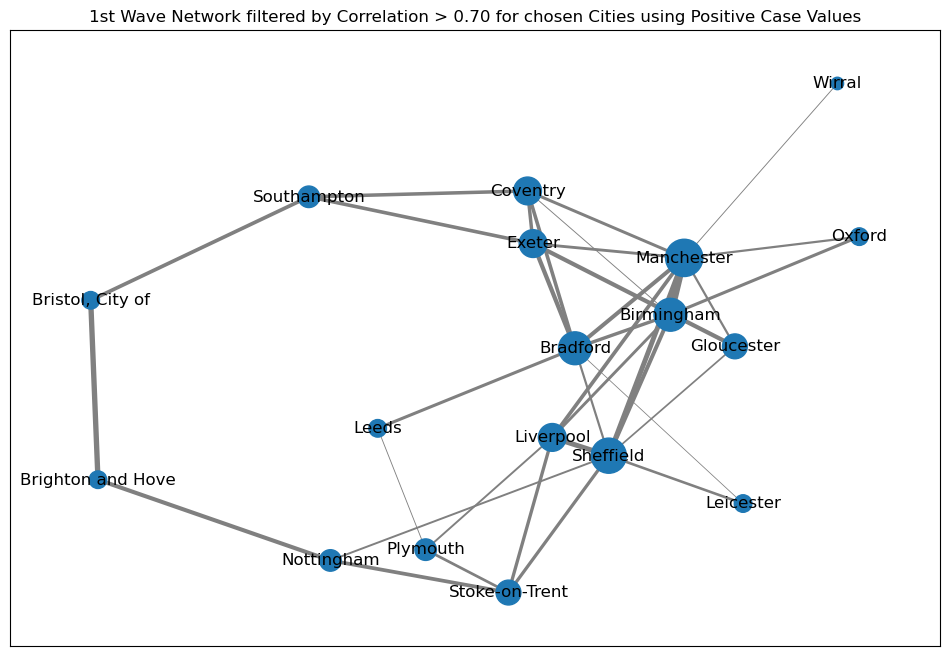

In [565]:
G = nx.from_pandas_edgelist(cities1r_filtered,'LTLA 1','LTLA 2', edge_attr='Maximum Correlation')
#T = nx.minimum_spanning_tree(G, weight = 'Maximum Correlation')
corrs = [i['Maximum Correlation'] for i in dict(G.edges).values()]
labels = [i for i in dict(G.nodes).keys()]
labels = {i:i for i in dict(G.nodes).keys()}

def normalize(values, bounds):
    return [bounds['desired']['lower'] + (x - bounds['actual']['lower']) * (bounds['desired']['upper'] - bounds['desired']['lower']) / (bounds['actual']['upper'] - bounds['actual']['lower']) for x in values]
corrs_new = normalize(corrs,{'actual':{'lower':0.7,'upper':0.9},'desired':{'lower':0.5,'upper':5}})

d = G.degree()
degree_values = [v for k, v in d]
deg_vals = [x * 80 for x in degree_values]

fig, ax = plt.subplots(figsize=(12,8))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, ax = ax, node_size = deg_vals, label=True)
nx.draw_networkx_edges(G, pos, edge_color = 'grey', width = corrs_new, ax=ax)
nx.draw_networkx_labels(G, pos, labels, font_size = 12, ax=ax)

plt.title('1st Wave Network filtered by Correlation > 0.70 for chosen Cities using Positive Case Values')
plt.show()

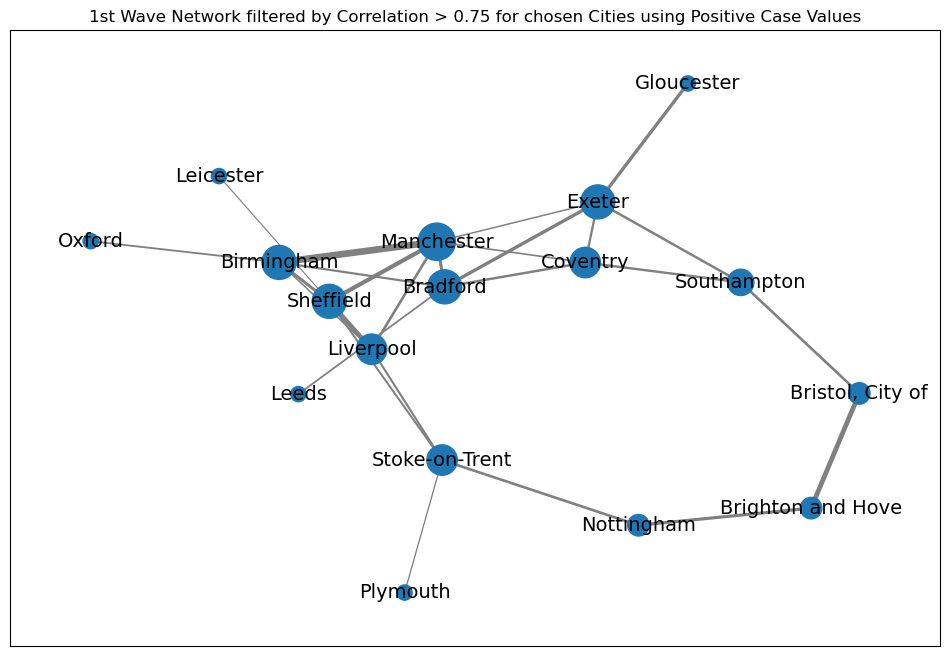

In [568]:
G = nx.from_pandas_edgelist(cities1r_filtered2,'LTLA 1','LTLA 2', edge_attr='Maximum Correlation')
#T = nx.minimum_spanning_tree(G, weight = 'Maximum Correlation')
corrs = [i['Maximum Correlation'] for i in dict(G.edges).values()]
labels = [i for i in dict(G.nodes).keys()]
labels = {i:i for i in dict(G.nodes).keys()}

def normalize(values, bounds):
    return [bounds['desired']['lower'] + (x - bounds['actual']['lower']) * (bounds['desired']['upper'] - bounds['desired']['lower']) / (bounds['actual']['upper'] - bounds['actual']['lower']) for x in values]
corrs_new = normalize(corrs,{'actual':{'lower':0.75,'upper':0.9},'desired':{'lower':0.5,'upper':5}})

d = G.degree()
degree_values = [v for k, v in d]
deg_vals = [x * 120 for x in degree_values]

fig, ax = plt.subplots(figsize=(12,8))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, ax = ax, node_size = deg_vals, label=True)
nx.draw_networkx_edges(G, pos, width = corrs_new, edge_color='grey', ax=ax)
nx.draw_networkx_labels(G, pos, labels, font_size = 14, ax=ax)

plt.title('1st Wave Network filtered by Correlation > 0.75 for chosen Cities using Positive Case Values')
plt.show()

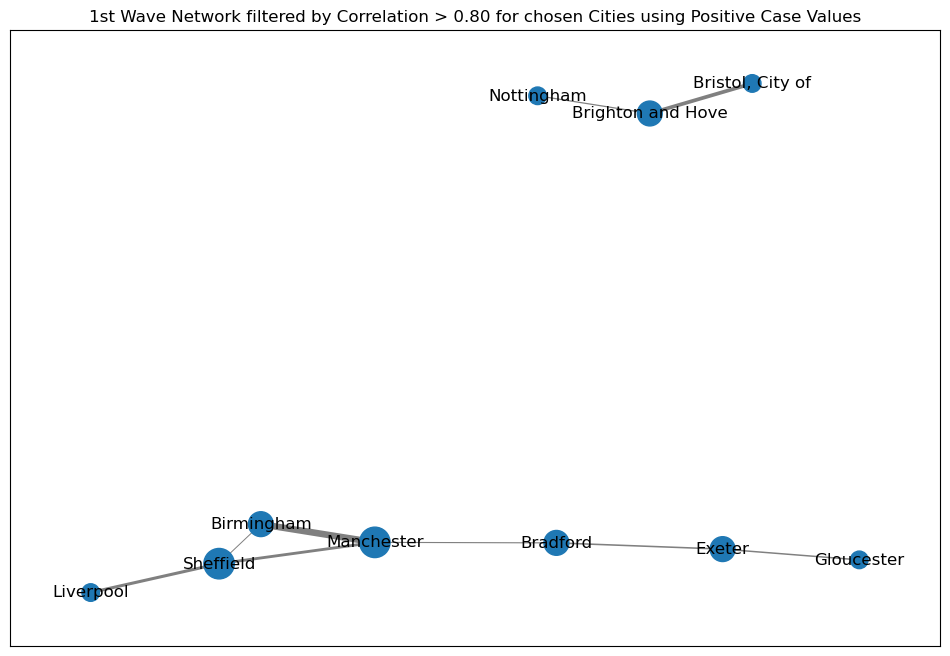

In [570]:
G = nx.from_pandas_edgelist(cities1r_filtered3,'LTLA 1','LTLA 2', edge_attr='Maximum Correlation')
#T = nx.minimum_spanning_tree(G, weight = 'Maximum Correlation')
corrs = [i['Maximum Correlation'] for i in dict(G.edges).values()]
labels = [i for i in dict(G.nodes).keys()]
labels = {i:i for i in dict(G.nodes).keys()}

def normalize(values, bounds):
    return [bounds['desired']['lower'] + (x - bounds['actual']['lower']) * (bounds['desired']['upper'] - bounds['desired']['lower']) / (bounds['actual']['upper'] - bounds['actual']['lower']) for x in values]
corrs_new = normalize(corrs,{'actual':{'lower':0.8,'upper':0.9},'desired':{'lower':0.5,'upper':5}})

d = G.degree()
degree_values = [v for k, v in d]
deg_vals = [x * 160 for x in degree_values]

fig, ax = plt.subplots(figsize=(12,8))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, ax = ax, node_size = deg_vals, label=True)
nx.draw_networkx_edges(G, pos, width = corrs_new, edge_color='grey',ax=ax)
nx.draw_networkx_labels(G, pos, labels, font_size = 12, ax=ax)

plt.title('1st Wave Network filtered by Correlation > 0.80 for chosen Cities using Positive Case Values')
plt.show()

In [575]:
cities1r_filtered_lag = cities1r_filtered.loc[cities1r_filtered['Lag in Days'] != 0]
cities1r_filtered2_lag = cities1r_filtered2.loc[cities1r_filtered2['Lag in Days'] != 0]
cities1r_filtered3_lag = cities1r_filtered3.loc[cities1r_filtered3['Lag in Days'] != 0]

In [614]:
cities1r_filtered3_lag.nlargest(2,'Absolute Lag')

LTLA 1      LTLA 2  Maximum Correlation  Lag in Days  Absolute Lag
42923    Exeter  Gloucester             0.812881        -18.0          18.0
2699   Bradford      Exeter             0.814149          9.0           9.0

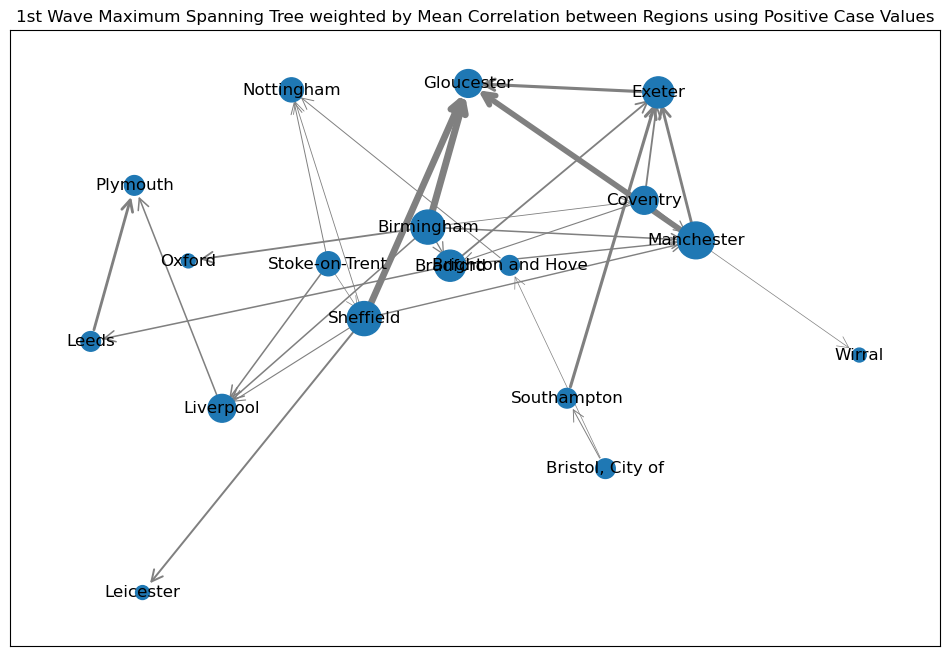

In [611]:
G = nx.from_pandas_edgelist(cities1r_filtered_lag,source = 'LTLA 1',target = 'LTLA 2', edge_attr=True, create_using= nx.DiGraph())

lag = [i['Absolute Lag'] for i in dict(G.edges).values()]
labels = [i for i in dict(G.nodes).keys()]
labels = {i:i for i in dict(G.nodes).keys()}

#weight = nx.get_edge_attributes(G,'Maximum Correlation')

def normalize(values, bounds):
    return [bounds['desired']['lower'] + (x - bounds['actual']['lower']) * (bounds['desired']['upper'] - bounds['desired']['lower']) / (bounds['actual']['upper'] - bounds['actual']['lower']) for x in values]
lag_new = normalize(lag,{'actual':{'lower':1,'upper':45.0},'desired':{'lower':0.5,'upper':5}})


d = G.degree()
degree_values = [v for k, v in d]
deg_vals = [x * 100 for x in degree_values]

fig, ax = plt.subplots(figsize=(12,8))
pos = nx.spring_layout(G, k=0.75)
#pos = dict(zip(G.nodes,city_gdf_r['Centroid']))
nx.draw_networkx_nodes(G, pos, ax = ax, node_size = deg_vals, label=True)
nx.draw_networkx_edges(G, pos, arrowstyle="->",arrowsize = 20, edge_color = 'grey',width = lag_new, ax=ax)
nx.draw_networkx_labels(G, pos, labels, font_size = 12, ax=ax)
#nx.draw_networkx_edge_labels(G,pos,edge_labels = weight)


plt.title('1st Wave Maximum Spanning Tree weighted by Mean Correlation between Regions using Positive Case Values')
plt.show()

In [593]:
pos

{'Birmingham': <POINT (408623.533 287884.188)>,
 'Manchester': <POINT (384708.149 395167.361)>,
 'Liverpool': <POINT (339186.556 390110.868)>,
 'Coventry': <POINT (432779.934 280012.952)>,
 'Bradford': <POINT (409716.484 438734.134)>,
 'Oxford': <POINT (452469.744 206448.09)>,
 'Gloucester': <POINT (383492.77 216692.235)>,
 'Wirral': <POINT (328953.181 385527.687)>,
 'Exeter': <POINT (293342.463 92496.411)>,
 'Stoke-on-Trent': <POINT (389069.683 346848.876)>,
 'Plymouth': <POINT (249560.458 56772.093)>,
 'Leeds': <POINT (432674.359 436679.538)>,
 'Sheffield': <POINT (429938.098 389841.58)>,
 'Leicester': <POINT (459032.528 304873.025)>,
 'Bristol, City of': <POINT (358324.004 174379.506)>,
 'Brighton and Hove': <POINT (531414.819 106557.529)>,
 'Nottingham': <POINT (455402.355 340696.402)>,
 'Southampton': <POINT (442373.831 113537.895)>}

In [583]:
city_df_r = pd.DataFrame(list(G.nodes))

In [585]:
city_df_r = city_df_r.rename(columns={city_df_r.columns[0]:'LTLA'})

In [587]:
city_df_r = city_df_r.merge(city_map_df, how='left', left_on='LTLA', right_on='LAD19NM')

In [594]:
city_gdf_r = gpd.GeoDataFrame(city_df_r)

In [595]:
city_gdf_r['Centroid']

0     POINT (408623.533 287884.188)
1     POINT (384708.149 395167.361)
2     POINT (339186.556 390110.868)
3     POINT (432779.934 280012.952)
4     POINT (409716.484 438734.134)
5     POINT (452469.744 206448.090)
6     POINT (383492.770 216692.235)
7     POINT (328953.181 385527.687)
8      POINT (293342.463 92496.411)
9     POINT (389069.683 346848.876)
10     POINT (249560.458 56772.093)
11    POINT (432674.359 436679.538)
12    POINT (429938.098 389841.580)
13    POINT (459032.528 304873.025)
14    POINT (358324.004 174379.506)
15    POINT (531414.819 106557.529)
16    POINT (455402.355 340696.402)
17    POINT (442373.831 113537.895)
Name: Centroid, dtype: geometry

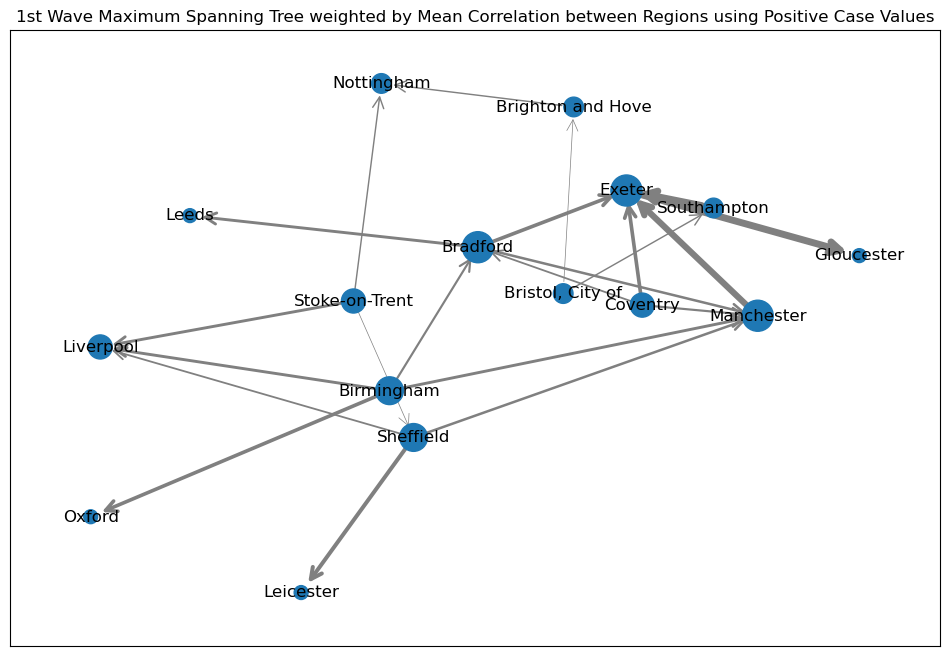

In [613]:
G = nx.from_pandas_edgelist(cities1r_filtered2_lag,source = 'LTLA 1',target = 'LTLA 2', edge_attr=True, create_using= nx.DiGraph())

lag = [i['Absolute Lag'] for i in dict(G.edges).values()]
labels = [i for i in dict(G.nodes).keys()]
labels = {i:i for i in dict(G.nodes).keys()}

#weight = nx.get_edge_attributes(G,'Maximum Correlation')

def normalize(values, bounds):
    return [bounds['desired']['lower'] + (x - bounds['actual']['lower']) * (bounds['desired']['upper'] - bounds['desired']['lower']) / (bounds['actual']['upper'] - bounds['actual']['lower']) for x in values]
lag_new = normalize(lag,{'actual':{'lower':1,'upper':18.0},'desired':{'lower':0.5,'upper':5}})


d = G.degree()
degree_values = [v for k, v in d]
deg_vals = [x * 100 for x in degree_values]

fig, ax = plt.subplots(figsize=(12,8))
pos = nx.spring_layout(G, k=0.75)
#pos = dict(zip(G.nodes,city_gdf_r['Centroid']))
nx.draw_networkx_nodes(G, pos, ax = ax, node_size = deg_vals, label=True)
nx.draw_networkx_edges(G, pos, arrowstyle="->",arrowsize = 20, edge_color = 'grey',width = lag_new, ax=ax)
nx.draw_networkx_labels(G, pos, labels, font_size = 12, ax=ax)
#nx.draw_networkx_edge_labels(G,pos,edge_labels = weight)


plt.title('1st Wave Maximum Spanning Tree weighted by Mean Correlation between Regions using Positive Case Values')
plt.show()

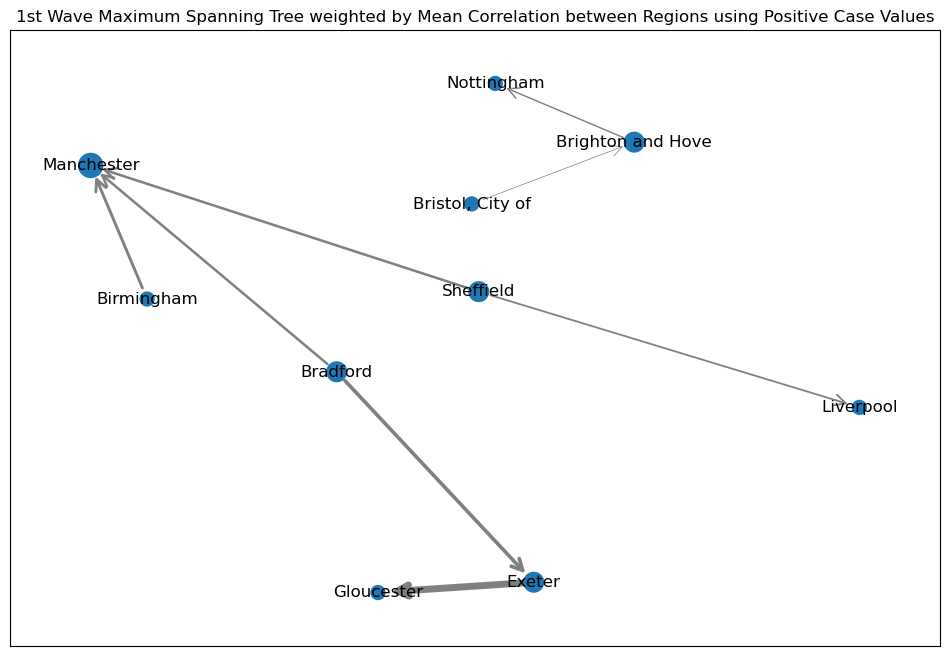

In [615]:
G = nx.from_pandas_edgelist(cities1r_filtered3_lag,source = 'LTLA 1',target = 'LTLA 2', edge_attr=True, create_using= nx.DiGraph())

lag = [i['Absolute Lag'] for i in dict(G.edges).values()]
labels = [i for i in dict(G.nodes).keys()]
labels = {i:i for i in dict(G.nodes).keys()}

#weight = nx.get_edge_attributes(G,'Maximum Correlation')

def normalize(values, bounds):
    return [bounds['desired']['lower'] + (x - bounds['actual']['lower']) * (bounds['desired']['upper'] - bounds['desired']['lower']) / (bounds['actual']['upper'] - bounds['actual']['lower']) for x in values]
lag_new = normalize(lag,{'actual':{'lower':1,'upper':18.0},'desired':{'lower':0.5,'upper':5}})


d = G.degree()
degree_values = [v for k, v in d]
deg_vals = [x * 100 for x in degree_values]

fig, ax = plt.subplots(figsize=(12,8))
pos = nx.spring_layout(G, k=0.75)
#pos = dict(zip(G.nodes,city_gdf_r['Centroid']))
nx.draw_networkx_nodes(G, pos, ax = ax, node_size = deg_vals, label=True)
nx.draw_networkx_edges(G, pos, arrowstyle="->",arrowsize = 20, edge_color = 'grey',width = lag_new, ax=ax)
nx.draw_networkx_labels(G, pos, labels, font_size = 12, ax=ax)
#nx.draw_networkx_edge_labels(G,pos,edge_labels = weight)


plt.title('1st Wave Maximum Spanning Tree weighted by Mean Correlation between Regions using Positive Case Values')
plt.show()

# 2nd Wave (R Values)

In [720]:
secondwave_r = pd.read_csv('Second_Wave_R.csv')

In [721]:
cities2r = [(secondwave_r.loc[secondwave_r['LTLA 1'] == cities[i]]) for i in range(len(cities))]
cities2r_df = pd.concat(cities2r)
cities_2r = [(cities2r_df.loc[secondwave_r['LTLA 2'] == cities[i]]) for i in range(len(cities))]
cities_2rdf = pd.concat(cities_2r)

In [377]:
cities_2rdf_rep = cities_2rdf.drop(columns = ['Lag in Days'])

In [378]:
cities2r_new = lag_direction(cities_2rdf, cities_2rdf_rep)

/var/folders/5m/nyccnvvs4197vfzljd054r300000gn/T/ipykernel_1653/1245444803.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['LTLA 1'].iloc[i] = df2['LTLA 2'].iloc[i]
/var/folders/5m/nyccnvvs4197vfzljd054r300000gn/T/ipykernel_1653/1245444803.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['LTLA 2'].iloc[i] = df2['LTLA 1'].iloc[i]


In [379]:
cities2r_new['Absolute Lag'] = abs(cities2r_new['Lag in Days'])

In [380]:
cities2r_newdup = cities2r_new.rename(columns={'LTLA 1':'LTLA 2', 'LTLA 2':'LTLA 1'})

In [381]:
cities2r_heat = pd.concat([cities2r_new, cities2r_newdup])
heatmap2r = cities2r_heat.pivot(index = 'LTLA 1', columns = 'LTLA 2', values = 'Maximum Correlation')
heatmap2r = heatmap2r.fillna(1)

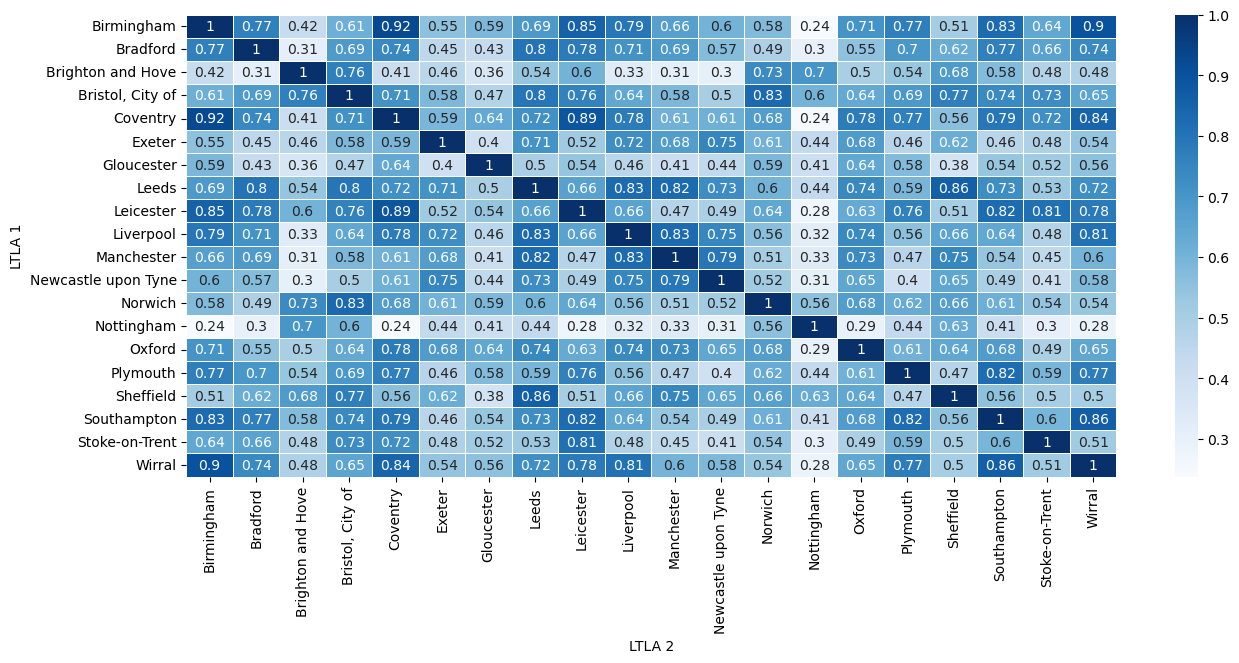

In [382]:
f, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(heatmap2r, annot=True, cmap = 'Blues',linewidths=.5, ax=ax)
plt.show()

In [383]:
heatmap2r['Mean Correlation'] = heatmap2r.mean(axis=1)

In [628]:
cities2r_new.nlargest(5,'Maximum Correlation')

LTLA 1      LTLA 2  Maximum Correlation  Lag in Days  Absolute Lag
25742     Coventry  Birmingham             0.922752          0.0           0.0
10055       Wirral  Birmingham             0.900224          1.0           1.0
25696     Coventry   Leicester             0.887305          0.0           0.0
10032  Southampton      Wirral             0.862367         -2.0           2.0
40864        Leeds   Sheffield             0.857780          1.0           1.0

In [384]:
cities2r_newduplag = cities2r_new.rename(columns={'LTLA 1':'LTLA 2', 'LTLA 2':'LTLA 1'})
cities2r_newduplag['Absolute Lag'] = -(cities2r_newduplag['Absolute Lag'])
cities2r_heatlag = pd.concat([cities2r_new, cities2r_newduplag])

In [385]:
heatmap2r_lag = cities2r_heatlag.pivot(index = 'LTLA 1', columns = 'LTLA 2', values = 'Absolute Lag')
heatmap2r_lag = heatmap2r_lag.fillna(0)

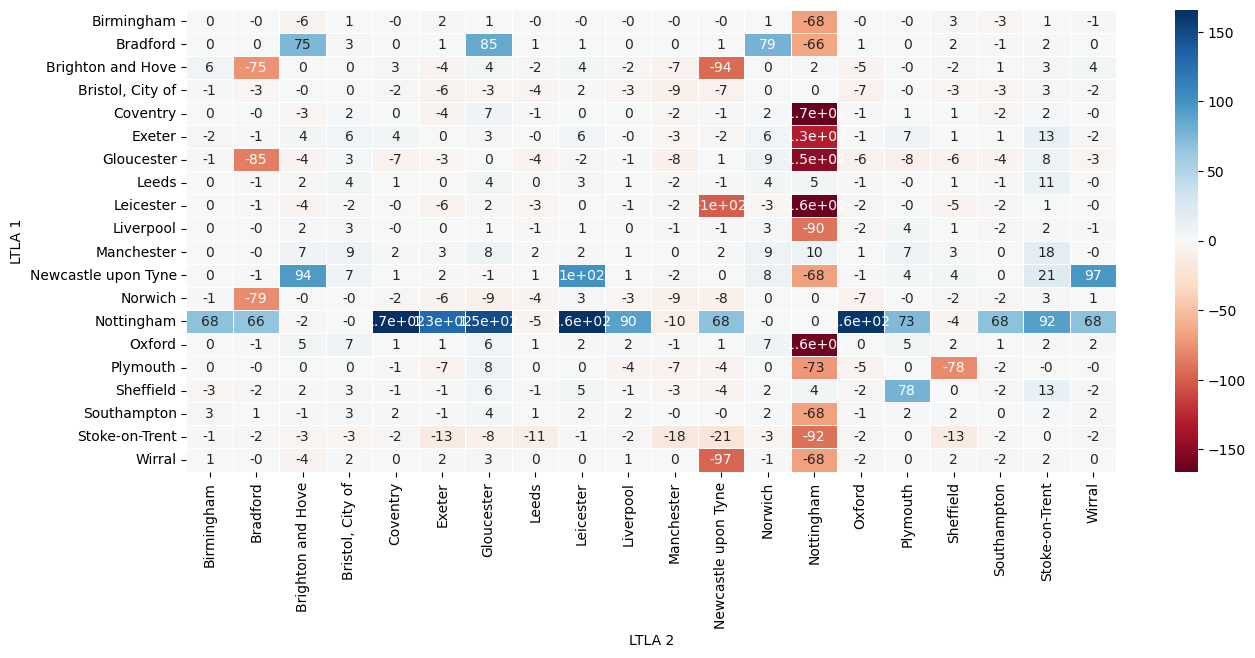

In [386]:
f, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(heatmap2r_lag, annot=True, cmap = 'RdBu',linewidths=.5, ax=ax)
plt.show()

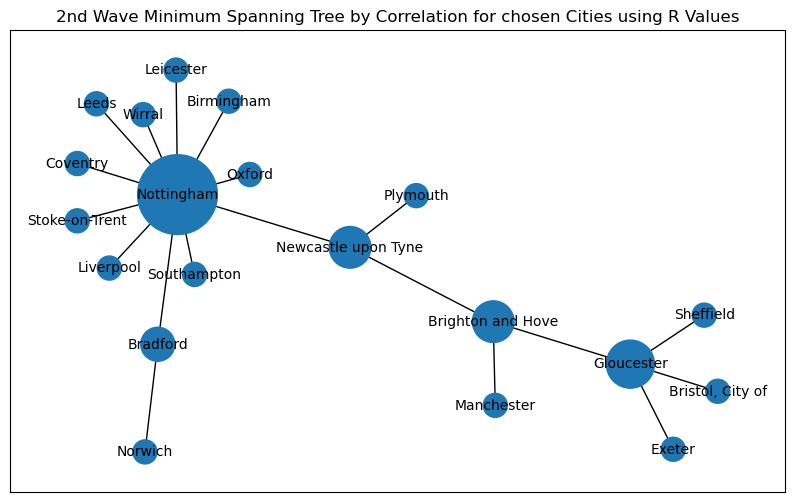

In [389]:
G = nx.from_pandas_edgelist(cities2r_new,'LTLA 1','LTLA 2', edge_attr='Maximum Correlation')
T = nx.minimum_spanning_tree(G, weight = 'Maximum Correlation')
#distances = [i['Distance between centroids'] for i in dict(G.edges).values()]
labels = [i for i in dict(T.nodes).keys()]
labels = {i:i for i in dict(T.nodes).keys()}


d = T.degree()
degree_values = [v for k, v in d]
deg_vals = [x * 300 for x in degree_values]

fig, ax = plt.subplots(figsize=(10,6))
pos = nx.spring_layout(T)
nx.draw_networkx_nodes(T, pos, ax = ax, node_size = deg_vals, label=True)
nx.draw_networkx_edges(T, pos, ax=ax)
nx.draw_networkx_labels(T, pos, labels, font_size = 10, ax=ax)

plt.title('2nd Wave Minimum Spanning Tree by Correlation for chosen Cities using R Values')
plt.show()

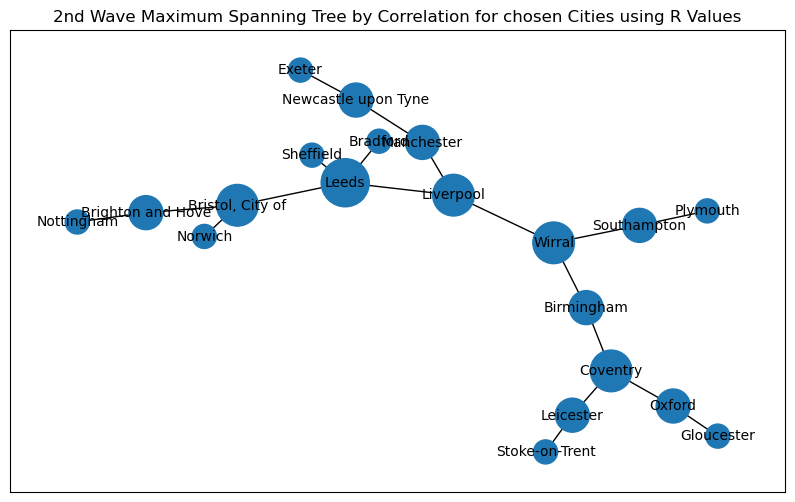

In [390]:
G = nx.from_pandas_edgelist(cities2r_new,'LTLA 1','LTLA 2', edge_attr='Maximum Correlation')
T = nx.maximum_spanning_tree(G, weight = 'Maximum Correlation')
#distances = [i['Distance between centroids'] for i in dict(G.edges).values()]
labels = [i for i in dict(T.nodes).keys()]
labels = {i:i for i in dict(T.nodes).keys()}


d = T.degree()
degree_values = [v for k, v in d]
deg_vals = [x * 300 for x in degree_values]

fig, ax = plt.subplots(figsize=(10,6))
pos = nx.spring_layout(T)
nx.draw_networkx_nodes(T, pos, ax = ax, node_size = deg_vals, label=True)
nx.draw_networkx_edges(T, pos, ax=ax)
nx.draw_networkx_labels(T, pos, labels, font_size = 10, ax=ax)

plt.title('2nd Wave Maximum Spanning Tree by Correlation for chosen Cities using R Values')
plt.show()

In [397]:
cities2r_filtered = cities2r_new.loc[cities2r_new['Maximum Correlation'] > 0.70]
cities2r_filtered2 = cities2r_new.loc[cities2r_new['Maximum Correlation'] > 0.75]
cities2r_filtered3 = cities2r_new.loc[cities2r_new['Maximum Correlation'] > 0.80]

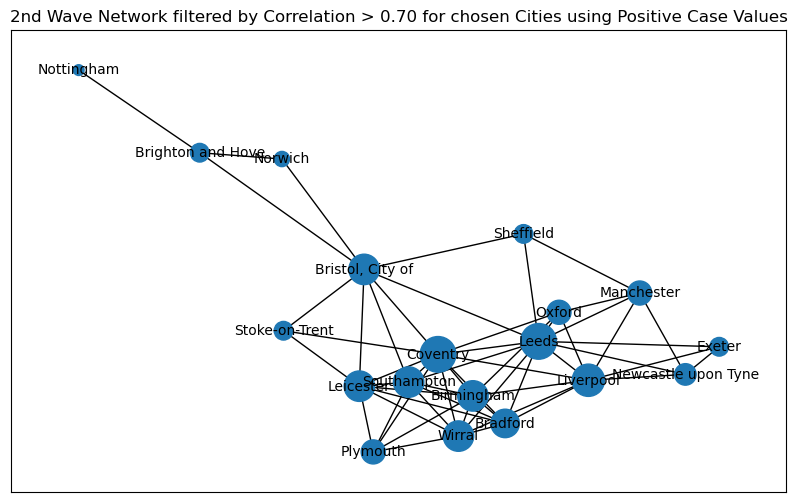

In [399]:
G = nx.from_pandas_edgelist(cities2r_filtered,'LTLA 1','LTLA 2', edge_attr='Maximum Correlation')
#T = nx.minimum_spanning_tree(G, weight = 'Maximum Correlation')
#distances = [i['Distance between centroids'] for i in dict(G.edges).values()]
labels = [i for i in dict(G.nodes).keys()]
labels = {i:i for i in dict(G.nodes).keys()}


d = G.degree()
degree_values = [v for k, v in d]
deg_vals = [x * 60 for x in degree_values]

fig, ax = plt.subplots(figsize=(10,6))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, ax = ax, node_size = deg_vals, label=True)
nx.draw_networkx_edges(G, pos, ax=ax)
nx.draw_networkx_labels(G, pos, labels, font_size = 10, ax=ax)

plt.title('2nd Wave Network filtered by Correlation > 0.70 for chosen Cities using Positive Case Values')
plt.show()

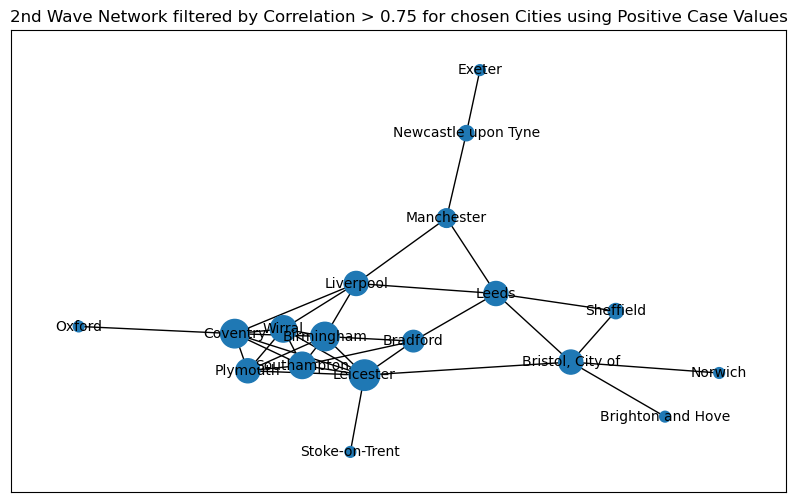

In [400]:
G = nx.from_pandas_edgelist(cities2r_filtered2,'LTLA 1','LTLA 2', edge_attr='Maximum Correlation')
#T = nx.minimum_spanning_tree(G, weight = 'Maximum Correlation')
#distances = [i['Distance between centroids'] for i in dict(G.edges).values()]
labels = [i for i in dict(G.nodes).keys()]
labels = {i:i for i in dict(G.nodes).keys()}


d = G.degree()
degree_values = [v for k, v in d]
deg_vals = [x * 60 for x in degree_values]

fig, ax = plt.subplots(figsize=(10,6))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, ax = ax, node_size = deg_vals, label=True)
nx.draw_networkx_edges(G, pos, ax=ax)
nx.draw_networkx_labels(G, pos, labels, font_size = 10, ax=ax)

plt.title('2nd Wave Network filtered by Correlation > 0.75 for chosen Cities using Positive Case Values')
plt.show()

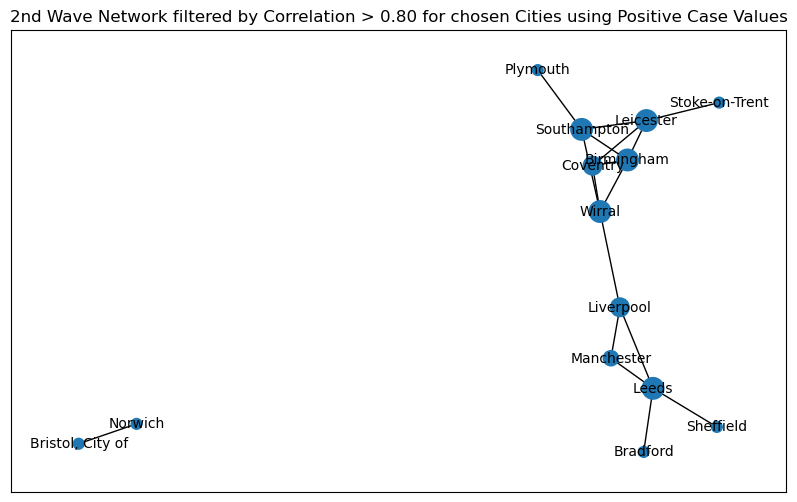

In [401]:
G = nx.from_pandas_edgelist(cities2r_filtered3,'LTLA 1','LTLA 2', edge_attr='Maximum Correlation')
#T = nx.minimum_spanning_tree(G, weight = 'Maximum Correlation')
#distances = [i['Distance between centroids'] for i in dict(G.edges).values()]
labels = [i for i in dict(G.nodes).keys()]
labels = {i:i for i in dict(G.nodes).keys()}


d = G.degree()
degree_values = [v for k, v in d]
deg_vals = [x * 60 for x in degree_values]

fig, ax = plt.subplots(figsize=(10,6))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, ax = ax, node_size = deg_vals, label=True)
nx.draw_networkx_edges(G, pos, ax=ax)
nx.draw_networkx_labels(G, pos, labels, font_size = 10, ax=ax)

plt.title('2nd Wave Network filtered by Correlation > 0.80 for chosen Cities using Positive Case Values')
plt.show()

In [629]:
cities2r_filtered_lag = cities2r_filtered.loc[cities2r_filtered['Lag in Days'] != 0]
cities2r_filtered2_lag = cities2r_filtered2.loc[cities2r_filtered2['Lag in Days'] != 0]
cities2r_filtered3_lag = cities2r_filtered3.loc[cities2r_filtered3['Lag in Days'] != 0]

In [632]:
cities2r_filtered_lag.nlargest(3,'Lag in Days')

LTLA 1            LTLA 2  Maximum Correlation  Lag in Days  \
40809        Leeds  Bristol, City of             0.796638          4.0   
46074  Southampton        Birmingham             0.828517          3.0   
45976   Manchester         Sheffield             0.748669          3.0   

       Absolute Lag  
40809           4.0  
46074           3.0  
45976           3.0

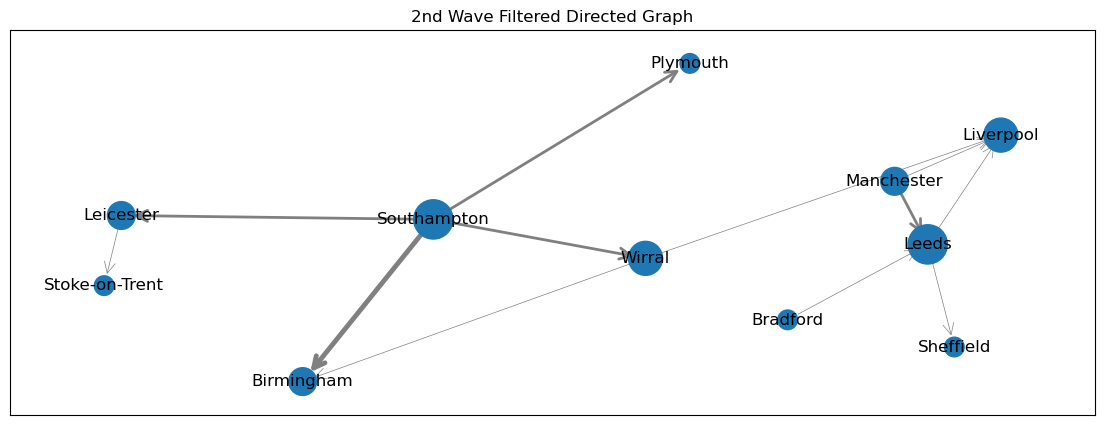

In [637]:
G = nx.from_pandas_edgelist(cities2r_filtered3_lag,source = 'LTLA 1',target = 'LTLA 2', edge_attr=True, create_using= nx.DiGraph())

lag = [i['Absolute Lag'] for i in dict(G.edges).values()]
labels = [i for i in dict(G.nodes).keys()]
labels = {i:i for i in dict(G.nodes).keys()}

#weight = nx.get_edge_attributes(G,'Maximum Correlation')

def normalize(values, bounds):
    return [bounds['desired']['lower'] + (x - bounds['actual']['lower']) * (bounds['desired']['upper'] - bounds['desired']['lower']) / (bounds['actual']['upper'] - bounds['actual']['lower']) for x in values]
lag_new = normalize(lag,{'actual':{'lower':1,'upper':4.0},'desired':{'lower':0.5,'upper':5}})


d = G.degree()
degree_values = [v for k, v in d]
deg_vals = [x * 200 for x in degree_values]

fig, ax = plt.subplots(figsize=(14,5))
pos = nx.spring_layout(G, k=0.75)
#pos = dict(zip(G.nodes,city_gdf_r['Centroid']))
nx.draw_networkx_nodes(G, pos, ax = ax, node_size = deg_vals, label=True)
nx.draw_networkx_edges(G, pos, arrowstyle="->",arrowsize = 20, edge_color = 'grey',width = lag_new, ax=ax)
nx.draw_networkx_labels(G, pos, labels, font_size = 12, ax=ax)
#nx.draw_networkx_edge_labels(G,pos,edge_labels = weight)


plt.title('2nd Wave Filtered Directed Graph')
plt.show()

# 3rd Wave (R Values)

In [722]:
thirdwave_r = pd.read_csv('Third_Wave_R.csv')

In [723]:
cities3r = [(thirdwave_r.loc[thirdwave_r['LTLA 1'] == cities[i]]) for i in range(len(cities))]
cities3r_df = pd.concat(cities3r)
cities_3r = [(cities3r_df.loc[thirdwave_r['LTLA 2'] == cities[i]]) for i in range(len(cities))]
cities_3rdf = pd.concat(cities_3r)

In [404]:
cities_3rdf_rep = cities_3rdf.drop(columns = ['Lag in Days'])

In [405]:
cities3r_new = lag_direction(cities_3rdf, cities_3rdf_rep)

/var/folders/5m/nyccnvvs4197vfzljd054r300000gn/T/ipykernel_1653/1245444803.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['LTLA 1'].iloc[i] = df2['LTLA 2'].iloc[i]
/var/folders/5m/nyccnvvs4197vfzljd054r300000gn/T/ipykernel_1653/1245444803.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['LTLA 2'].iloc[i] = df2['LTLA 1'].iloc[i]


In [406]:
cities3r_new['Absolute Lag'] = abs(cities3r_new['Lag in Days'])
cities3r_newdup = cities3r_new.rename(columns={'LTLA 1':'LTLA 2', 'LTLA 2':'LTLA 1'})

In [407]:
cities3r_heat = pd.concat([cities3r_new, cities3r_newdup])
heatmap3r = cities3r_heat.pivot(index = 'LTLA 1', columns = 'LTLA 2', values = 'Maximum Correlation')
heatmap3r = heatmap3r.fillna(1)

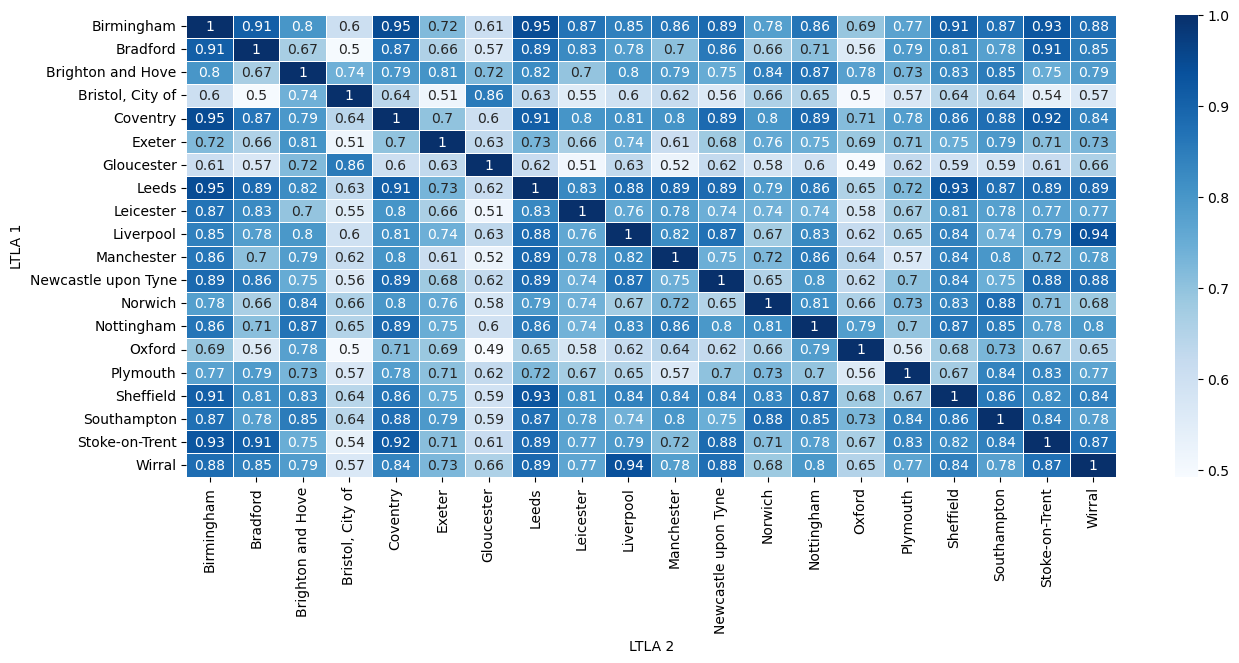

In [408]:
f, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(heatmap3r, annot=True, cmap = 'Blues',linewidths=.5, ax=ax)
plt.show()

In [409]:
heatmap3r['Mean Correlation'] = heatmap3r.mean(axis=1)

In [655]:
cities3r_new.nlargest(3, 'Maximum Correlation')

LTLA 1      LTLA 2  Maximum Correlation  Lag in Days  Absolute Lag
25742  Coventry  Birmingham             0.946638          0.0           0.0
40880     Leeds  Birmingham             0.946387          1.0           1.0
9936     Wirral   Liverpool             0.936957          0.0           0.0

In [410]:
cities3r_newduplag = cities3r_new.rename(columns={'LTLA 1':'LTLA 2', 'LTLA 2':'LTLA 1'})
cities3r_newduplag['Absolute Lag'] = -(cities3r_newduplag['Absolute Lag'])
cities3r_heatlag = pd.concat([cities3r_new, cities3r_newduplag])

In [411]:
heatmap3r_lag = cities3r_heatlag.pivot(index = 'LTLA 1', columns = 'LTLA 2', values = 'Absolute Lag')
heatmap3r_lag = heatmap3r_lag.fillna(0)

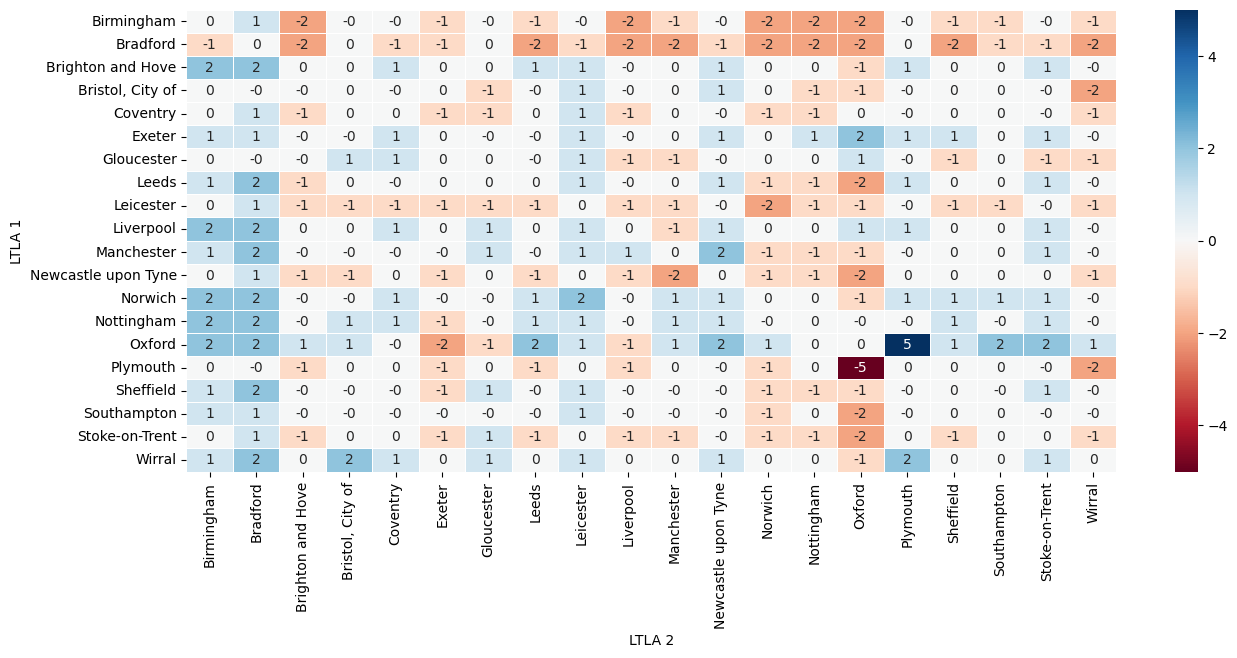

In [412]:
f, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(heatmap3r_lag, annot=True, cmap = 'RdBu',linewidths=.5, ax=ax)
plt.show()

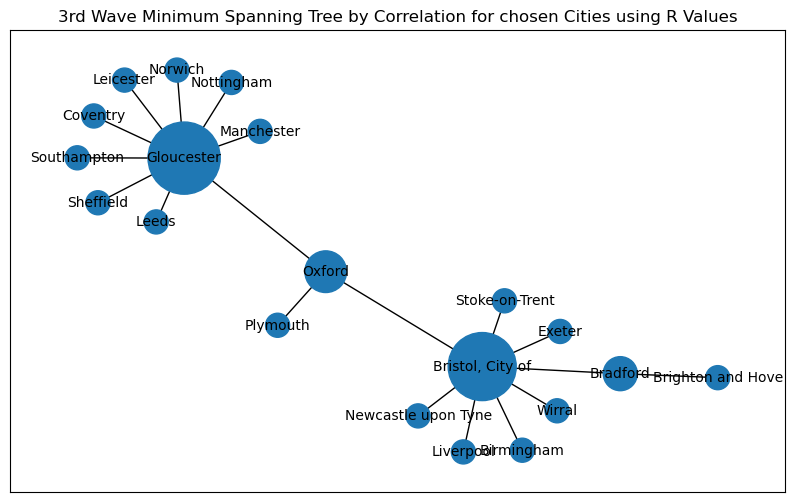

In [413]:
G = nx.from_pandas_edgelist(cities3r_new,'LTLA 1','LTLA 2', edge_attr='Maximum Correlation')
T = nx.minimum_spanning_tree(G, weight = 'Maximum Correlation')
#distances = [i['Distance between centroids'] for i in dict(G.edges).values()]
labels = [i for i in dict(T.nodes).keys()]
labels = {i:i for i in dict(T.nodes).keys()}


d = T.degree()
degree_values = [v for k, v in d]
deg_vals = [x * 300 for x in degree_values]

fig, ax = plt.subplots(figsize=(10,6))
pos = nx.spring_layout(T)
nx.draw_networkx_nodes(T, pos, ax = ax, node_size = deg_vals, label=True)
nx.draw_networkx_edges(T, pos, ax=ax)
nx.draw_networkx_labels(T, pos, labels, font_size = 10, ax=ax)

plt.title('3rd Wave Minimum Spanning Tree by Correlation for chosen Cities using R Values')
plt.show()

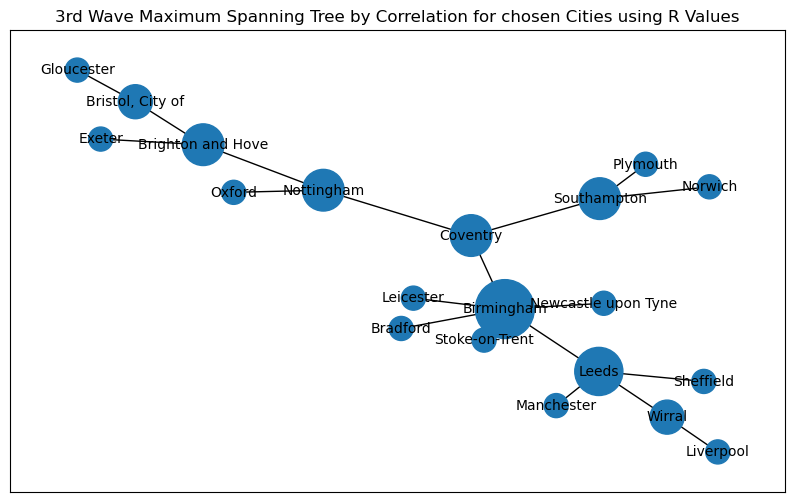

In [414]:
G = nx.from_pandas_edgelist(cities3r_new,'LTLA 1','LTLA 2', edge_attr='Maximum Correlation')
T = nx.maximum_spanning_tree(G, weight = 'Maximum Correlation')
#distances = [i['Distance between centroids'] for i in dict(G.edges).values()]
labels = [i for i in dict(T.nodes).keys()]
labels = {i:i for i in dict(T.nodes).keys()}


d = T.degree()
degree_values = [v for k, v in d]
deg_vals = [x * 300 for x in degree_values]

fig, ax = plt.subplots(figsize=(10,6))
pos = nx.spring_layout(T)
nx.draw_networkx_nodes(T, pos, ax = ax, node_size = deg_vals, label=True)
nx.draw_networkx_edges(T, pos, ax=ax)
nx.draw_networkx_labels(T, pos, labels, font_size = 10, ax=ax)

plt.title('3rd Wave Maximum Spanning Tree by Correlation for chosen Cities using R Values')
plt.show()

In [674]:
cities3r_filtered = cities3r_new.loc[cities3r_new['Maximum Correlation'] > 0.75]
cities3r_filtered2 = cities3r_new.loc[cities3r_new['Maximum Correlation'] > 0.85]
cities3r_filtered3 = cities3r_new.loc[cities3r_new['Maximum Correlation'] > 0.88]

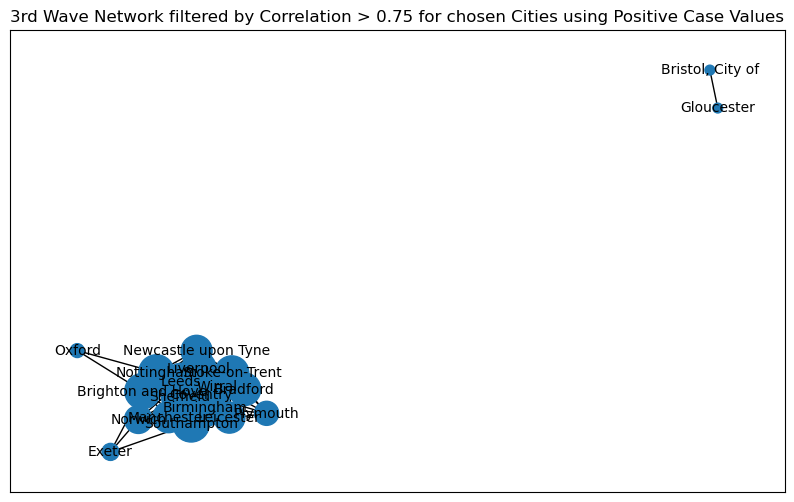

In [417]:
G = nx.from_pandas_edgelist(cities3r_filtered,'LTLA 1','LTLA 2', edge_attr='Maximum Correlation')
#T = nx.minimum_spanning_tree(G, weight = 'Maximum Correlation')
#distances = [i['Distance between centroids'] for i in dict(G.edges).values()]
labels = [i for i in dict(G.nodes).keys()]
labels = {i:i for i in dict(G.nodes).keys()}


d = G.degree()
degree_values = [v for k, v in d]
deg_vals = [x * 50 for x in degree_values]

fig, ax = plt.subplots(figsize=(10,6))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, ax = ax, node_size = deg_vals, label=True)
nx.draw_networkx_edges(G, pos, ax=ax)
nx.draw_networkx_labels(G, pos, labels, font_size = 10, ax=ax)

plt.title('3rd Wave Network filtered by Correlation > 0.75 for chosen Cities using Positive Case Values')
plt.show()

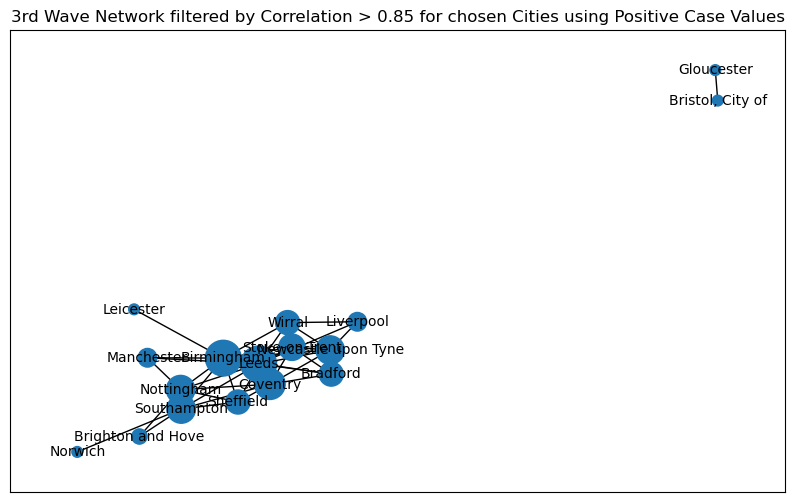

In [418]:
G = nx.from_pandas_edgelist(cities3r_filtered2,'LTLA 1','LTLA 2', edge_attr='Maximum Correlation')
#T = nx.minimum_spanning_tree(G, weight = 'Maximum Correlation')
#distances = [i['Distance between centroids'] for i in dict(G.edges).values()]
labels = [i for i in dict(G.nodes).keys()]
labels = {i:i for i in dict(G.nodes).keys()}


d = G.degree()
degree_values = [v for k, v in d]
deg_vals = [x * 60 for x in degree_values]

fig, ax = plt.subplots(figsize=(10,6))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, ax = ax, node_size = deg_vals, label=True)
nx.draw_networkx_edges(G, pos, ax=ax)
nx.draw_networkx_labels(G, pos, labels, font_size = 10, ax=ax)

plt.title('3rd Wave Network filtered by Correlation > 0.85 for chosen Cities using Positive Case Values')
plt.show()

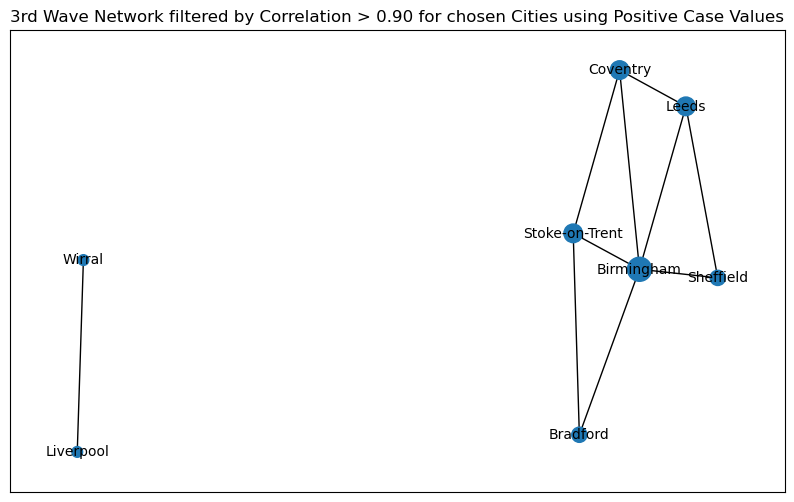

In [419]:
G = nx.from_pandas_edgelist(cities3r_filtered3,'LTLA 1','LTLA 2', edge_attr='Maximum Correlation')
#T = nx.minimum_spanning_tree(G, weight = 'Maximum Correlation')
#distances = [i['Distance between centroids'] for i in dict(G.edges).values()]
labels = [i for i in dict(G.nodes).keys()]
labels = {i:i for i in dict(G.nodes).keys()}


d = G.degree()
degree_values = [v for k, v in d]
deg_vals = [x * 60 for x in degree_values]

fig, ax = plt.subplots(figsize=(10,6))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, ax = ax, node_size = deg_vals, label=True)
nx.draw_networkx_edges(G, pos, ax=ax)
nx.draw_networkx_labels(G, pos, labels, font_size = 10, ax=ax)

plt.title('3rd Wave Network filtered by Correlation > 0.90 for chosen Cities using Positive Case Values')
plt.show()

In [675]:
cities3r_filtered_lag = cities3r_filtered.loc[cities3r_filtered['Lag in Days'] != 0]
cities3r_filtered2_lag = cities3r_filtered2.loc[cities3r_filtered2['Lag in Days'] != 0]
cities3r_filtered3_lag = cities3r_filtered3.loc[cities3r_filtered3['Lag in Days'] != 0]

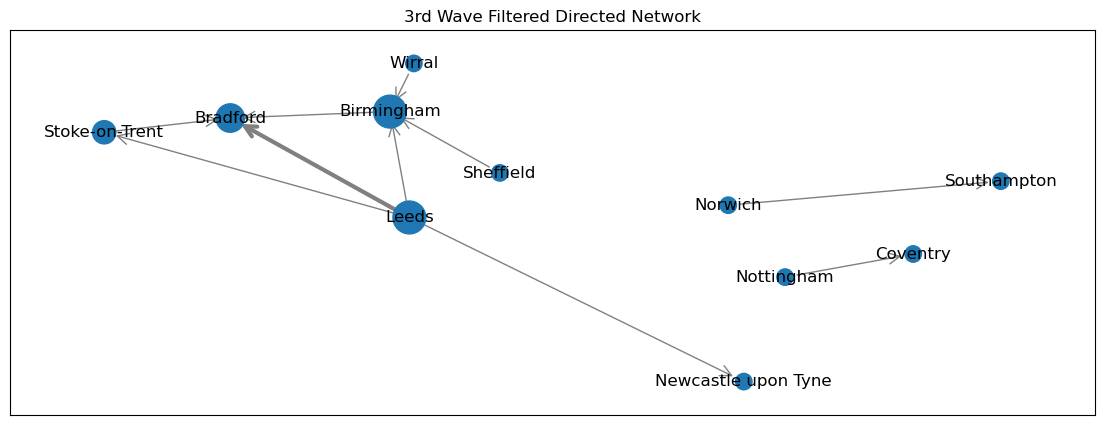

In [679]:
G = nx.from_pandas_edgelist(cities3r_filtered3_lag,source = 'LTLA 1',target = 'LTLA 2', edge_attr=True, create_using= nx.DiGraph())

lag = [i['Absolute Lag'] for i in dict(G.edges).values()]
labels = [i for i in dict(G.nodes).keys()]
labels = {i:i for i in dict(G.nodes).keys()}

#weight = nx.get_edge_attributes(G,'Maximum Correlation')

def normalize(values, bounds):
    return [bounds['desired']['lower'] + (x - bounds['actual']['lower']) * (bounds['desired']['upper'] - bounds['desired']['lower']) / (bounds['actual']['upper'] - bounds['actual']['lower']) for x in values]
lag_new = normalize(lag,{'actual':{'lower':1,'upper':3.0},'desired':{'lower':1,'upper':5}})


d = G.degree()
degree_values = [v for k, v in d]
deg_vals = [x * 140 for x in degree_values]

fig, ax = plt.subplots(figsize=(14,5))
pos = nx.spring_layout(G, k=0.5)
#pos = dict(zip(G.nodes,city_gdf_r['Centroid']))
nx.draw_networkx_nodes(G, pos, ax = ax, node_size = deg_vals, label=True)
nx.draw_networkx_edges(G, pos, arrowstyle="->",arrowsize = 20, edge_color = 'grey',width = lag_new, ax=ax)
nx.draw_networkx_labels(G, pos, labels, font_size = 12, ax=ax)
#nx.draw_networkx_edge_labels(G,pos,edge_labels = weight)


plt.title('3rd Wave Filtered Directed Network')
plt.show()

# Overall Analysis (R Values)

In [420]:
means1r = heatmap1r['Mean Correlation']
means2r = heatmap2r['Mean Correlation']
means3r = heatmap3r['Mean Correlation']

In [421]:
means1r_df = pd.DataFrame(means1r)

In [422]:
means1r_df = means1r_df.reset_index()

In [425]:
overall_means_r = means1r_df.rename(columns = {'LTLA 1':'LTLA', 'Mean Correlation':'1st Wave Mean Correlation'})

In [426]:
overall_means_r['2nd Wave Correlation Mean'] = list(means2r)
overall_means_r['3rd Wave Correlation Mean'] = list(means3r)

In [427]:
overall_means_r['Overall Correlation Mean'] = overall_means_r.mean(axis=1)

/var/folders/5m/nyccnvvs4197vfzljd054r300000gn/T/ipykernel_1653/1882662319.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  overall_means_r['Overall Correlation Mean'] = overall_means_r.mean(axis=1)


In [428]:
overall_means_r

LTLA  1st Wave Mean Correlation  2nd Wave Correlation Mean  \
0            Birmingham                   0.688291                   0.682256   
1              Bradford                   0.695125                   0.637785   
2     Brighton and Hove                   0.616292                   0.525067   
3      Bristol, City of                   0.640955                   0.688461   
4              Coventry                   0.663588                   0.700485   
5                Exeter                   0.670756                   0.586022   
6            Gloucester                   0.567238                   0.521573   
7                 Leeds                   0.614540                   0.699683   
8             Leicester                   0.504475                   0.673355   
9             Liverpool                   0.609778                   0.663055   
10           Manchester                   0.705463                   0.611523   
11  Newcastle upon Tyne                   0.611972                   0.577404   
12              Norwich                   0.518177                   0.627827   
13           Nottingham                   0.641557                   0.425246   
14               Oxford                   0.572294                   0.651307   
15             Plymouth                   0.618181                   0.630487   
16            Sheffield                   0.704036                   0.626504   
17          Southampton                   0.625090                   0.673091   
18       Stoke-on-Trent                   0.637151                   0.572287   
19               Wirral                   0.555587                   0.666427   

    3rd Wave Correlation Mean  Overall Correlation Mean  
0                    0.834570                  0.735039  
1                    0.764611                  0.699173  
2                    0.790776                  0.644045  
3                    0.628452                  0.652623  
4                    0.821859                  0.728644  
5                    0.716243                  0.657674  
6                    0.631543                  0.573451  
7                    0.831741                  0.715321  
8                    0.744502                  0.640777  
9                    0.780979                  0.684604  
10                   0.753897                  0.690294  
11                   0.780881                  0.656752  
12                   0.748314                  0.631439  
13                   0.799394                  0.622066  
14                   0.663112                  0.628904  
15                   0.719088                  0.655919  
16                   0.810832                  0.713791  
17                   0.806019                  0.701400  
18                   0.796364                  0.668601  
19                   0.797377                  0.673130

In [680]:
overall_means

LTLA  1st Wave Correlation Mean  2nd Wave Correlation Mean  \
0            Birmingham                   0.757823                   0.782291   
1              Bradford                   0.452993                   0.672010   
2     Brighton and Hove                   0.696653                   0.756725   
3      Bristol, City of                   0.706736                   0.718242   
4              Coventry                   0.713207                   0.774340   
5                Exeter                   0.674461                   0.623266   
6            Gloucester                   0.703595                   0.718166   
7                 Leeds                   0.723792                   0.677171   
8             Leicester                   0.512495                   0.720180   
9             Liverpool                   0.757048                   0.683266   
10           Manchester                   0.682720                   0.665319   
11  Newcastle upon Tyne                   0.742208                   0.654995   
12              Norwich                   0.587151                   0.727433   
13           Nottingham                   0.710359                   0.668468   
14               Oxford                   0.649285                   0.757154   
15             Plymouth                   0.657290                   0.710769   
16            Sheffield                   0.723540                   0.699198   
17          Southampton                   0.708288                   0.756452   
18       Stoke-on-Trent                   0.716008                   0.623685   
19               Wirral                   0.719497                   0.756493   

    3rd Wave Correlation Mean  Overall Correlation Mean  
0                    0.907517                  0.815877  
1                    0.874730                  0.666578  
2                    0.881327                  0.778235  
3                    0.888982                  0.771320  
4                    0.913533                  0.800360  
5                    0.778451                  0.692059  
6                    0.840933                  0.754232  
7                    0.914513                  0.771825  
8                    0.895898                  0.709524  
9                    0.878627                  0.772980  
10                   0.865054                  0.737698  
11                   0.878316                  0.758506  
12                   0.884400                  0.732994  
13                   0.883002                  0.753943  
14                   0.855841                  0.754093  
15                   0.831398                  0.733152  
16                   0.914795                  0.779178  
17                   0.902058                  0.788933  
18                   0.908639                  0.749444  
19                   0.887018                  0.787669

In [682]:
overall1 = overall_means.drop(columns=['1st Wave Correlation Mean','2nd Wave Correlation Mean', '3rd Wave Correlation Mean' ])
overall2 = overall_means_r.drop(columns=['1st Wave Mean Correlation','2nd Wave Correlation Mean', '3rd Wave Correlation Mean' ])

In [683]:
overall = overall1.merge(overall2, how='left', left_on='LTLA', right_on='LTLA')

In [685]:
overall['Combined Mean Correlation'] = overall.mean(axis=1)

/var/folders/5m/nyccnvvs4197vfzljd054r300000gn/T/ipykernel_1653/3426954141.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  overall['Combined Mean Correlation'] = overall.mean(axis=1)


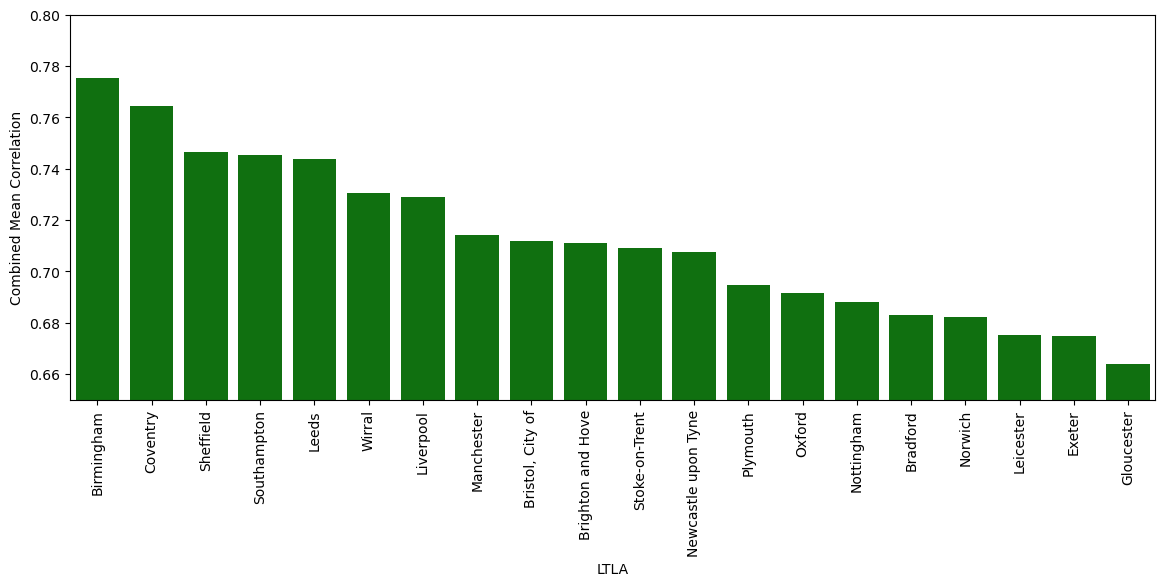

In [689]:
plt.figure(figsize=(14,5))
sns.barplot(x='LTLA', y="Combined Mean Correlation", color = 'green', data=overall, order=overall.sort_values('Combined Mean Correlation', ascending=False).LTLA)
plt.ylim(0.65, 0.80)
plt.xticks(rotation ='vertical')
plt.show() 

In [693]:
overall_mean_pops = overall.merge(pops, how='left', left_on='LTLA', right_on='Name')

In [694]:
overall_mean_pops

LTLA  Overall Correlation Mean_x  \
0            Birmingham                    0.815877   
1              Bradford                    0.666578   
2     Brighton and Hove                    0.778235   
3      Bristol, City of                    0.771320   
4              Coventry                    0.800360   
5                Exeter                    0.692059   
6            Gloucester                    0.754232   
7                 Leeds                    0.771825   
8             Leicester                    0.709524   
9             Liverpool                    0.772980   
10           Manchester                    0.737698   
11  Newcastle upon Tyne                    0.758506   
12              Norwich                    0.732994   
13           Nottingham                    0.753943   
14               Oxford                    0.754093   
15             Plymouth                    0.733152   
16            Sheffield                    0.779178   
17          Southampton                    0.788933   
18       Stoke-on-Trent                    0.749444   
19               Wirral                    0.787669   

    Overall Correlation Mean_y  Combined Mean Correlation       Code  \
0                     0.735039                   0.775458  E08000025   
1                     0.699173                   0.682876  E08000032   
2                     0.644045                   0.711140  E06000043   
3                     0.652623                   0.711971  E06000023   
4                     0.728644                   0.764502  E08000026   
5                     0.657674                   0.674866  E07000041   
6                     0.573451                   0.663842  E07000081   
7                     0.715321                   0.743573  E08000035   
8                     0.640777                   0.675151  E06000016   
9                     0.684604                   0.728792  E08000012   
10                    0.690294                   0.713996  E08000003   
11                    0.656752                   0.707629  E08000021   
12                    0.631439                   0.682217  E07000148   
13                    0.622066                   0.688004  E06000018   
14                    0.628904                   0.691499  E07000178   
15                    0.655919                   0.694535  E06000026   
16                    0.713791                   0.746484  E08000019   
17                    0.701400                   0.745166  E06000045   
18                    0.668601                   0.709022  E06000021   
19                    0.673130                   0.730400  E08000015   

                   Name                 Geography1   All ages  
0            Birmingham      Metropolitan District  1141816.0  
1              Bradford      Metropolitan District   539776.0  
2     Brighton and Hove          Unitary Authority   290885.0  
3      Bristol, City of          Unitary Authority   463377.0  
4              Coventry      Metropolitan District   371521.0  
5                Exeter  Non-metropolitan District   131405.0  
6            Gloucester  Non-metropolitan District   129128.0  
7                 Leeds      Metropolitan District   793139.0  
8             Leicester          Unitary Authority   354224.0  
9             Liverpool      Metropolitan District   498042.0  
10           Manchester      Metropolitan District   552858.0  
11  Newcastle upon Tyne      Metropolitan District   302820.0  
12              Norwich  Non-metropolitan District   140573.0  
13           Nottingham          Unitary Authority   332900.0  
14               Oxford  Non-metropolitan District   152457.0  
15             Plymouth          Unitary Authority   262100.0  
16            Sheffield      Metropolitan District   584853.0  
17          Southampton          Unitary Authority   252520.0  
18       Stoke-on-Trent          Unitary Authority   256375.0  
19               Wirral      Metropolitan District   324011.0

In [431]:
city_map_df_r = map_df.merge(overall_means_r, how='left', left_on = 'LAD19NM', right_on = 'LTLA')

In [432]:
city_map_df_r = city_map_df_r[city_map_df_r['LTLA'].notna()]

In [433]:
corrs_r = city_map_df_r['Overall Correlation Mean']
def normalize(values, bounds):
    return [bounds['desired']['lower'] + (x - bounds['actual']['lower']) * (bounds['desired']['upper'] - bounds['desired']['lower']) / (bounds['actual']['upper'] - bounds['actual']['lower']) for x in values]
corrs_new_r = normalize(corrs_r,{'actual':{'lower':0.57,'upper':0.74},'desired':{'lower':2,'upper':15}})


In [435]:

corrs_square_r = square(corrs_new_r)

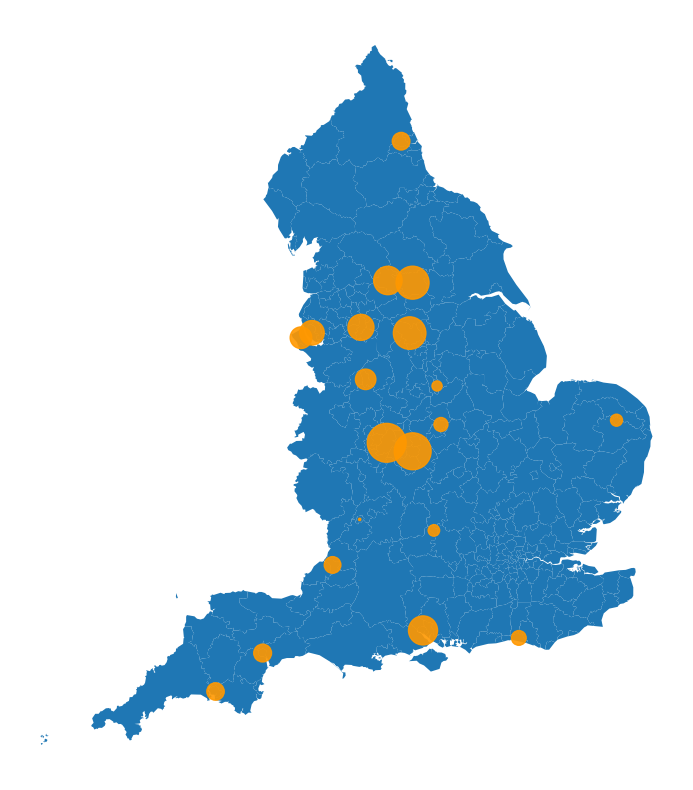

In [436]:

fig, ax = plt.subplots(figsize=(16,10))
map_df['geometry'].plot(ax=ax)
city_map_df_r['Centroid'].plot(ax=ax, color='#FF9800', marker='.', zorder=2, alpha=0.9, markersize=corrs_square_r)
ax.set_axis_off()
plt.show()

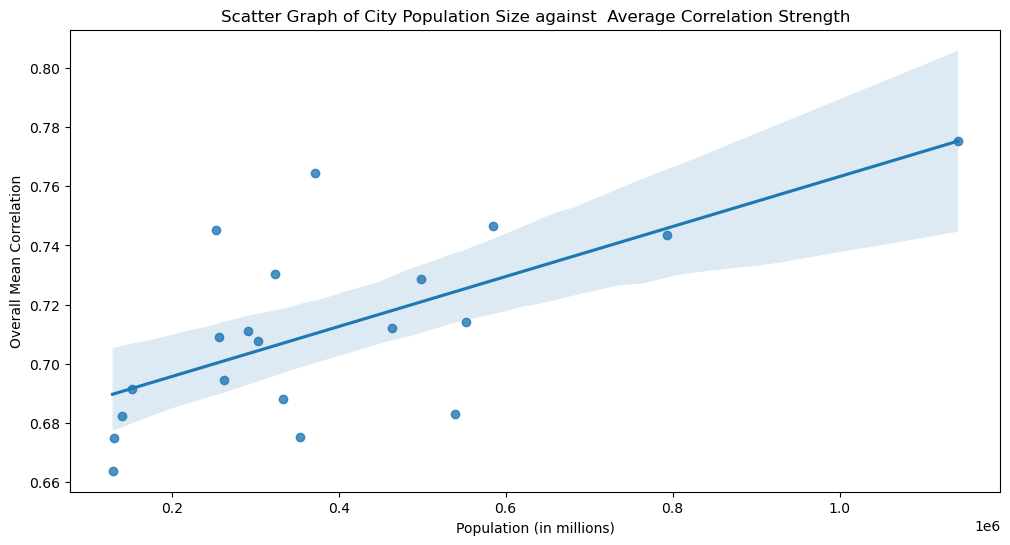

In [699]:
plt.figure(figsize=(12,6))

sns.regplot(data = overall_mean_pops, x = "All ages", y = "Combined Mean Correlation")
plt.title("Scatter Graph of City Population Size against  Average Correlation Strength")
plt.xlabel("Population (in millions)")
plt.ylabel('Overall Mean Correlation')
plt.show()

In [698]:
data1 = overall_mean_pops['Combined Mean Correlation']
data2 = overall_mean_pops['All ages']

corr, _ = pearsonr(data1, data2)
print('Correlation between city population and correlation strength: %.3f' % corr)

Correlation between city population and correlation strength: 0.665


In [691]:
city_map_df.nsmallest(5,'All ages')

LAD19CD      LAD19NM LAD19NMW   BNG_E   BNG_N     LONG      LAT  \
8   E07000081   Gloucester      NaN  384071  216449 -2.23263  51.8464   
7   E07000041       Exeter      NaN  293236   92003 -3.51372  50.7178   
9   E07000148      Norwich      NaN  622355  309773  1.28498  52.6401   
10  E07000178       Oxford      NaN  452277  206368 -1.24405  51.7536   
6   E06000045  Southampton      NaN  442253  113608 -1.40025  50.9204   

                                GlobalID  \
8   dd41b845-2742-4dac-ada3-7cc778a018b0   
7   bb057aee-9abf-4865-9d58-e663c43ab6ed   
9   2f94ddac-a6c9-4909-a769-c93c0557f022   
10  72d50f33-dceb-40b0-a026-817eb998f18f   
6   53d9438c-7628-4a96-80ba-ec0d50531b4d   

                                             geometry  \
8   POLYGON ((386573.800 218569.105, 387888.203 21...   
7   POLYGON ((296254.696 87985.104, 294160.797 893...   
9   POLYGON ((622795.304 311441.500, 624900.004 31...   
10  POLYGON ((448191.698 209373.597, 449497.402 21...   
6   POLYGON ((436828.801 114465.220, 438763.503 11...   

                         Centroid         LTLA  1st Wave Correlation Mean  \
8   POINT (383492.770 216692.235)   Gloucester                   0.703595   
7    POINT (293342.463 92496.411)       Exeter                   0.674461   
9   POINT (622182.668 308879.662)      Norwich                   0.587151   
10  POINT (452469.744 206448.090)       Oxford                   0.649285   
6   POINT (442373.831 113537.895)  Southampton                   0.708288   

    2nd Wave Correlation Mean  3rd Wave Correlation Mean  \
8                    0.718166                   0.840933   
7                    0.623266                   0.778451   
9                    0.727433                   0.884400   
10                   0.757154                   0.855841   
6                    0.756452                   0.902058   

    Overall Correlation Mean       Code         Name  \
8                   0.754232  E07000081   Gloucester   
7                   0.692059  E07000041       Exeter   
9                   0.732994  E07000148      Norwich   
10                  0.754093  E07000178       Oxford   
6                   0.788933  E06000045  Southampton   

                   Geography1  All ages  
8   Non-metropolitan District  129128.0  
7   Non-metropolitan District  131405.0  
9   Non-metropolitan District  140573.0  
10  Non-metropolitan District  152457.0  
6           Unitary Authority  252520.0

In [702]:
cities1

LTLA 1            LTLA 2  Maximum Correlation  Lag in Days  \
45678         Birmingham        Manchester             0.811053         -6.0   
33505          Liverpool        Birmingham             0.859562          0.0   
40696         Birmingham             Leeds             0.732307         -6.0   
46306          Sheffield        Birmingham             0.836543          0.0   
40825         Birmingham  Bristol, City of             0.776451         -6.0   
...                  ...               ...                  ...          ...   
9967          Gloucester            Wirral             0.660644         -3.0   
2667          Gloucester          Bradford             0.348565        -18.0   
21061         Gloucester          Plymouth             0.732957         -4.0   
33976  Brighton and Hove        Gloucester             0.664956          2.0   
34999             Oxford        Gloucester             0.599802          1.0   

       Urban/Rural  Distance > 150km?  Distance between centroids Wave  \
45678  Urban-Urban              False                  109.916445  1st   
33505  Urban-Urban              False                  123.579075  1st   
40696  Urban-Urban               True                  150.726568  1st   
46306  Urban-Rural              False                  104.161511  1st   
40825  Urban-Urban              False                  124.150535  1st   
...            ...                ...                         ...  ...   
9967   Urban-Rural               True                  177.425975  1st   
2667   Urban-Rural               True                  223.585080  1st   
21061  Urban-Urban               True                  208.596059  1st   
33976  Urban-Urban               True                  184.419592  1st   
34999  Urban-Rural              False                   69.733532  1st   

       Absolute Lag  
45678           6.0  
33505           0.0  
40696           6.0  
46306           0.0  
40825           6.0  
...             ...  
9967            3.0  
2667           18.0  
21061           4.0  
33976           2.0  
34999           1.0  

[190 rows x 9 columns]

In [701]:
cities1r_new

LTLA 1            LTLA 2  Maximum Correlation  Lag in Days  \
45992         Birmingham        Manchester             0.894698         -7.0   
33642         Birmingham         Liverpool             0.770494         -7.0   
40880         Birmingham             Leeds             0.539886         -3.0   
46620          Sheffield        Birmingham             0.804659          0.0   
41010         Birmingham  Bristol, City of             0.663494         -7.0   
...                  ...               ...                  ...          ...   
10000         Gloucester            Wirral             0.286112         -2.0   
2675            Bradford        Gloucester             0.497904          1.0   
21137           Plymouth        Gloucester             0.591738          0.0   
34115  Brighton and Hove        Gloucester             0.328612          0.0   
35144             Oxford        Gloucester             0.359164          0.0   

       Absolute Lag  
45992           7.0  
33642           7.0  
40880           3.0  
46620           0.0  
41010           7.0  
...             ...  
10000           2.0  
2675            1.0  
21137           0.0  
34115           0.0  
35144           0.0  

[190 rows x 5 columns]

In [745]:
cities1_ovr = cities1.drop(columns=['Urban/Rural', 'Distance > 150km?', 'Distance between centroids', 'Wave', 'Lag in Days'])
cities2_ovr = cities2.drop(columns=['Urban/Rural', 'Distance > 150km?', 'Distance between centroids', 'Wave', 'Lag in Days'])
cities3_ovr = cities3.drop(columns=['Urban/Rural', 'Distance > 150km?', 'Distance between centroids', 'Wave', 'Lag in Days'])

In [746]:
cities1_ovr_r = cities_1rdf.drop(columns=['Lag in Days'])
cities2_ovr_r = cities_2rdf.drop(columns=['Lag in Days'])
cities3_ovr_r = cities_3rdf.drop(columns=['Lag in Days'])

In [754]:
cities1_ovr = cities1_ovr.reset_index()
cities2_ovr = cities2_ovr.reset_index()
cities3_ovr = cities3_ovr.reset_index()
cities1_ovr_r = cities1_ovr_r.reset_index()
cities2_ovr_r = cities2_ovr_r.reset_index()
cities3_ovr_r = cities3_ovr_r.reset_index()

In [755]:
cities1_ovr

index             LTLA 1      LTLA 2  Maximum Correlation
0    45678         Manchester  Birmingham             0.811053
1    33505          Liverpool  Birmingham             0.859562
2    40696              Leeds  Birmingham             0.732307
3    46306          Sheffield  Birmingham             0.836543
4    40825   Bristol, City of  Birmingham             0.776451
..     ...                ...         ...                  ...
185   9967             Wirral  Gloucester             0.660644
186   2667           Bradford  Gloucester             0.348565
187  21061           Plymouth  Gloucester             0.732957
188  33976  Brighton and Hove  Gloucester             0.664956
189  34999             Oxford  Gloucester             0.599802

[190 rows x 4 columns]

In [779]:
overall_corrs = pd.merge(cities1_ovr, cities2_ovr, left_index=True, right_index=True)

In [780]:
overall_corrs = pd.merge(overall_corrs, cities3_ovr, left_index=True, right_index=True)

In [781]:
overall_corrs = overall_corrs.drop(columns=['LTLA 1_y', 'LTLA 2_y', 'LTLA 1', 'LTLA 2', 'index_y', 'index_x', 'index'])
overall_corrs = overall_corrs.rename(columns={'Maximum Correlation_x':'1st', 'Maximum Correlation_y':'2nd', 'Maximum Correlation':'3rd' })

In [782]:
overall_corrs = pd.merge(overall_corrs, cities1_ovr_r, left_index=True, right_index=True)

In [783]:
overall_corrs

LTLA 1_x    LTLA 2_x       1st       2nd       3rd  index  \
0           Manchester  Birmingham  0.811053  0.583018  0.925475  45992   
1            Liverpool  Birmingham  0.859562  0.757496  0.936041  33642   
2                Leeds  Birmingham  0.732307  0.537249  0.983564  40880   
3            Sheffield  Birmingham  0.836543  0.617595  0.978291  46620   
4     Bristol, City of  Birmingham  0.776451  0.800677  0.872751  41010   
..                 ...         ...       ...       ...       ...    ...   
185             Wirral  Gloucester  0.660644  0.769987  0.787018  10000   
186           Bradford  Gloucester  0.348565  0.585785  0.788517   2675   
187           Plymouth  Gloucester  0.732957  0.777846  0.908549  21137   
188  Brighton and Hove  Gloucester  0.664956  0.887813  0.880154  34115   
189             Oxford  Gloucester  0.599802  0.895989  0.889441  35144   

                LTLA 1      LTLA 2  Maximum Correlation  
0           Manchester  Birmingham             0.894698  
1            Liverpool  Birmingham             0.770494  
2                Leeds  Birmingham             0.539886  
3            Sheffield  Birmingham             0.804659  
4     Bristol, City of  Birmingham             0.663494  
..                 ...         ...                  ...  
185             Wirral  Gloucester             0.286112  
186           Bradford  Gloucester             0.497904  
187           Plymouth  Gloucester             0.591738  
188  Brighton and Hove  Gloucester             0.328612  
189             Oxford  Gloucester             0.359164  

[190 rows x 9 columns]

In [784]:
overall_corrs = overall_corrs.drop(columns=['LTLA 1', 'LTLA 2','index'])
overall_corrs = overall_corrs.rename(columns={'Maximum Correlation':'1st R' })

In [785]:
overall_corrs = pd.merge(overall_corrs, cities2_ovr_r, left_index=True, right_index=True)

In [786]:
overall_corrs = overall_corrs.drop(columns=['LTLA 1', 'LTLA 2','index'])
overall_corrs = overall_corrs.rename(columns={'Maximum Correlation':'2nd R' })

In [787]:
overall_corrs = pd.merge(overall_corrs, cities3_ovr_r, left_index=True, right_index=True)

In [788]:
overall_corrs = overall_corrs.drop(columns=['LTLA 1', 'LTLA 2','index'])
overall_corrs = overall_corrs.rename(columns={'Maximum Correlation':'3rd R' })

In [789]:
overall_corrs

LTLA 1_x    LTLA 2_x       1st       2nd       3rd     1st R  \
0           Manchester  Birmingham  0.811053  0.583018  0.925475  0.894698   
1            Liverpool  Birmingham  0.859562  0.757496  0.936041  0.770494   
2                Leeds  Birmingham  0.732307  0.537249  0.983564  0.539886   
3            Sheffield  Birmingham  0.836543  0.617595  0.978291  0.804659   
4     Bristol, City of  Birmingham  0.776451  0.800677  0.872751  0.663494   
..                 ...         ...       ...       ...       ...       ...   
185             Wirral  Gloucester  0.660644  0.769987  0.787018  0.286112   
186           Bradford  Gloucester  0.348565  0.585785  0.788517  0.497904   
187           Plymouth  Gloucester  0.732957  0.777846  0.908549  0.591738   
188  Brighton and Hove  Gloucester  0.664956  0.887813  0.880154  0.328612   
189             Oxford  Gloucester  0.599802  0.895989  0.889441  0.359164   

        2nd R     3rd R  
0    0.663824  0.863014  
1    0.792428  0.845160  
2    0.688172  0.946387  
3    0.511274  0.908041  
4    0.614818  0.603687  
..        ...       ...  
185  0.555334  0.658865  
186  0.427405  0.570894  
187  0.575609  0.622578  
188  0.361107  0.719387  
189  0.644677  0.492429  

[190 rows x 8 columns]

In [790]:
overall_corrs['Mean Correlation'] = overall_corrs.mean(axis=1)

/var/folders/5m/nyccnvvs4197vfzljd054r300000gn/T/ipykernel_1653/917574488.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  overall_corrs['Mean Correlation'] = overall_corrs.mean(axis=1)


In [791]:
overall_corrs

LTLA 1_x    LTLA 2_x       1st       2nd       3rd     1st R  \
0           Manchester  Birmingham  0.811053  0.583018  0.925475  0.894698   
1            Liverpool  Birmingham  0.859562  0.757496  0.936041  0.770494   
2                Leeds  Birmingham  0.732307  0.537249  0.983564  0.539886   
3            Sheffield  Birmingham  0.836543  0.617595  0.978291  0.804659   
4     Bristol, City of  Birmingham  0.776451  0.800677  0.872751  0.663494   
..                 ...         ...       ...       ...       ...       ...   
185             Wirral  Gloucester  0.660644  0.769987  0.787018  0.286112   
186           Bradford  Gloucester  0.348565  0.585785  0.788517  0.497904   
187           Plymouth  Gloucester  0.732957  0.777846  0.908549  0.591738   
188  Brighton and Hove  Gloucester  0.664956  0.887813  0.880154  0.328612   
189             Oxford  Gloucester  0.599802  0.895989  0.889441  0.359164   

        2nd R     3rd R  Mean Correlation  
0    0.663824  0.863014          0.790180  
1    0.792428  0.845160          0.826863  
2    0.688172  0.946387          0.737927  
3    0.511274  0.908041          0.776067  
4    0.614818  0.603687          0.721980  
..        ...       ...               ...  
185  0.555334  0.658865          0.619660  
186  0.427405  0.570894          0.536512  
187  0.575609  0.622578          0.701546  
188  0.361107  0.719387          0.640338  
189  0.644677  0.492429          0.646917  

[190 rows x 9 columns]

In [805]:
overall_corrs_filt = overall_corrs.loc[overall_corrs['Mean Correlation'] > 0.80]

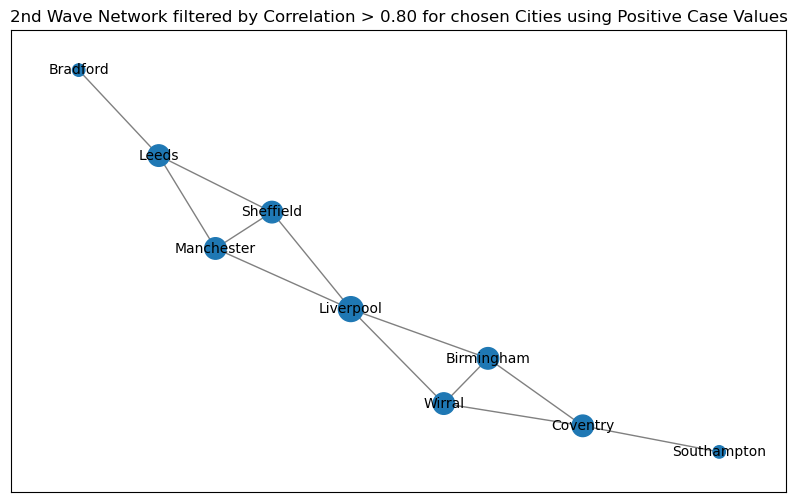

In [806]:
G = nx.from_pandas_edgelist(overall_corrs_filt,'LTLA 1_x','LTLA 2_x', edge_attr='Mean Correlation')
#T = nx.minimum_spanning_tree(G, weight = 'Maximum Correlation')
#distances = [i['Distance between centroids'] for i in dict(G.edges).values()]
labels = [i for i in dict(G.nodes).keys()]
labels = {i:i for i in dict(G.nodes).keys()}


d = G.degree()
degree_values = [v for k, v in d]
deg_vals = [x * 80 for x in degree_values]

fig, ax = plt.subplots(figsize=(10,6))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, ax = ax, node_size = deg_vals, label=True)
nx.draw_networkx_edges(G, pos, edge_color='grey',ax=ax)
nx.draw_networkx_labels(G, pos, labels, font_size = 10, ax=ax)

plt.title('2nd Wave Network filtered by Correlation > 0.80 for chosen Cities using Positive Case Values')
plt.show()

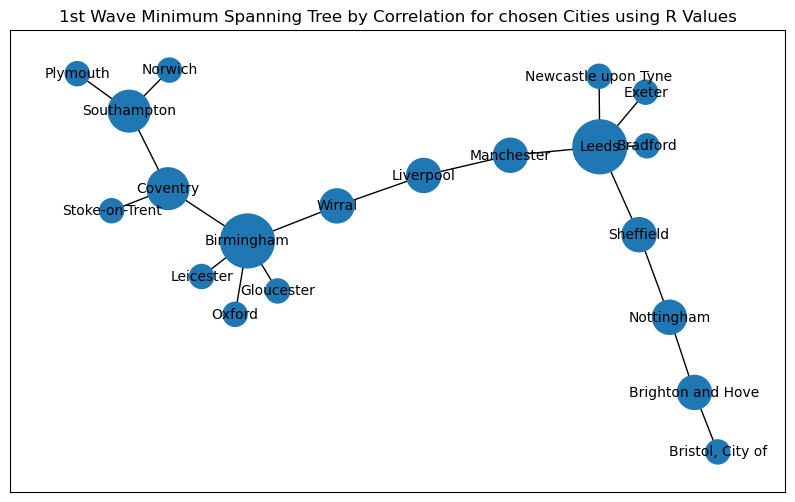

In [796]:
G = nx.from_pandas_edgelist(overall_corrs,'LTLA 1_x','LTLA 2_x', edge_attr='Mean Correlation')
T = nx.maximum_spanning_tree(G, weight = 'Mean Correlation')
#distances = [i['Distance between centroids'] for i in dict(G.edges).values()]
labels = [i for i in dict(T.nodes).keys()]
labels = {i:i for i in dict(T.nodes).keys()}


d = T.degree()
degree_values = [v for k, v in d]
deg_vals = [x * 300 for x in degree_values]

fig, ax = plt.subplots(figsize=(10,6))
pos = nx.spring_layout(T)
nx.draw_networkx_nodes(T, pos, ax = ax, node_size = deg_vals, label=True)
nx.draw_networkx_edges(T, pos, ax=ax)
nx.draw_networkx_labels(T, pos, labels, font_size = 10, ax=ax)

plt.title('1st Wave Minimum Spanning Tree by Correlation for chosen Cities using R Values')
plt.show()

In [793]:
overall_corrs.nsmallest(5,'Mean Correlation')

LTLA 1_x    LTLA 2_x       1st       2nd       3rd     1st R     2nd R  \
186   Bradford  Gloucester  0.348565  0.585785  0.788517  0.497904  0.427405   
129  Leicester      Exeter  0.517975  0.535138  0.699083  0.449122  0.521006   
27    Plymouth  Manchester  0.600086  0.478350  0.679494  0.596569  0.466399   
134   Bradford      Exeter  0.353811  0.491040  0.695418  0.814149  0.451372   
101  Leicester  Nottingham  0.529558  0.485544  0.913860  0.562958  0.275943   

        3rd R  Mean Correlation  
186  0.570894          0.536512  
129  0.663483          0.564301  
27   0.566113          0.564502  
134  0.656051          0.576974  
101  0.738002          0.584311

In [794]:
overall_mean_pops.nlargest(20,'All ages')

LTLA  Overall Correlation Mean_x  \
0            Birmingham                    0.815877   
7                 Leeds                    0.771825   
16            Sheffield                    0.779178   
10           Manchester                    0.737698   
1              Bradford                    0.666578   
9             Liverpool                    0.772980   
3      Bristol, City of                    0.771320   
4              Coventry                    0.800360   
8             Leicester                    0.709524   
13           Nottingham                    0.753943   
19               Wirral                    0.787669   
11  Newcastle upon Tyne                    0.758506   
2     Brighton and Hove                    0.778235   
15             Plymouth                    0.733152   
18       Stoke-on-Trent                    0.749444   
17          Southampton                    0.788933   
14               Oxford                    0.754093   
12              Norwich                    0.732994   
5                Exeter                    0.692059   
6            Gloucester                    0.754232   

    Overall Correlation Mean_y  Combined Mean Correlation       Code  \
0                     0.735039                   0.775458  E08000025   
7                     0.715321                   0.743573  E08000035   
16                    0.713791                   0.746484  E08000019   
10                    0.690294                   0.713996  E08000003   
1                     0.699173                   0.682876  E08000032   
9                     0.684604                   0.728792  E08000012   
3                     0.652623                   0.711971  E06000023   
4                     0.728644                   0.764502  E08000026   
8                     0.640777                   0.675151  E06000016   
13                    0.622066                   0.688004  E06000018   
19                    0.673130                   0.730400  E08000015   
11                    0.656752                   0.707629  E08000021   
2                     0.644045                   0.711140  E06000043   
15                    0.655919                   0.694535  E06000026   
18                    0.668601                   0.709022  E06000021   
17                    0.701400                   0.745166  E06000045   
14                    0.628904                   0.691499  E07000178   
12                    0.631439                   0.682217  E07000148   
5                     0.657674                   0.674866  E07000041   
6                     0.573451                   0.663842  E07000081   

                   Name                 Geography1   All ages  
0            Birmingham      Metropolitan District  1141816.0  
7                 Leeds      Metropolitan District   793139.0  
16            Sheffield      Metropolitan District   584853.0  
10           Manchester      Metropolitan District   552858.0  
1              Bradford      Metropolitan District   539776.0  
9             Liverpool      Metropolitan District   498042.0  
3      Bristol, City of          Unitary Authority   463377.0  
4              Coventry      Metropolitan District   371521.0  
8             Leicester          Unitary Authority   354224.0  
13           Nottingham          Unitary Authority   332900.0  
19               Wirral      Metropolitan District   324011.0  
11  Newcastle upon Tyne      Metropolitan District   302820.0  
2     Brighton and Hove          Unitary Authority   290885.0  
15             Plymouth          Unitary Authority   262100.0  
18       Stoke-on-Trent          Unitary Authority   256375.0  
17          Southampton          Unitary Authority   252520.0  
14               Oxford  Non-metropolitan District   152457.0  
12              Norwich  Non-metropolitan District   140573.0  
5                Exeter  Non-metropolitan District   131405.0  
6            Gloucester  Non-metropolitan District   129128.0